# Logistic Regression

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

# To make matplotlib figures appear inline in the notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'viridis'

In [2]:
def plot_twoclass_data(X,y,xlabel,ylabel,legend):
    fig = plt.figure()
    X0 = X[y==0.0]
    X1 = X[y==1.0]
    plt.scatter(X0[:,0],X0[:,1], s=80, label = legend[0],marker='_',c='navy')
    plt.scatter(X1[:,0],X1[:,1], s = 80, label=legend[1],marker='P',c='orange')
    plt.xlabel(xlabel,fontsize=18)
    plt.ylabel(ylabel,fontsize=18)
    plt.legend(loc="upper right",fontsize=14)

def plot_decision_boundary_logistic(X,y,model,  xlabel, ylabel, legend):
    plot_twoclass_data(X,y.squeeze(),xlabel,ylabel,legend)

    # create a mesh to plot in
    h = 0.01
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))

    # make predictions on this mesh
    Z = model.predict_proba((np.vstack([xx1.flatten(), xx2.flatten()]).T))[:,1]

    # Put the result into a color contour plot
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1,xx2,Z,cmap='gray',levels=[0.5])

def plot_decision_boundary_model_poly(X,y,model,poly, reg, xlabel, ylabel, legend, l1_ratio=None):
    plot_twoclass_data(X,y.squeeze(),xlabel,ylabel,legend)

    # create a mesh to plot in
    h = 0.01
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))

    # do basis function expansion before prediction

    Z = model.predict_proba((poly.transform(np.vstack([xx1.flatten(), xx2.flatten()]).T)))[:,1]

     # Put the result into a color contour plot
    Z = Z.reshape(xx1.shape)

    plt.contour(xx1,xx2,Z,cmap=plt.cm.gray,levels=[0.5])
    if l1_ratio:
      plt.title("Decision boundary for lambda = " + str(1/reg) + "   L1 ratio of: " + str(l1_ratio), fontsize=16)
    else:
      plt.title("Decision boundary for lambda = " + str(1/reg), fontsize=16)

# Load Nearly Linearly Separable Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
##PATH TO THE DATA
# path = './data/'
path = '/content/drive/MyDrive/GitHub_Repo/Logistic_Regression/data/' #EDIT FOLDER PATH AS NEEDED

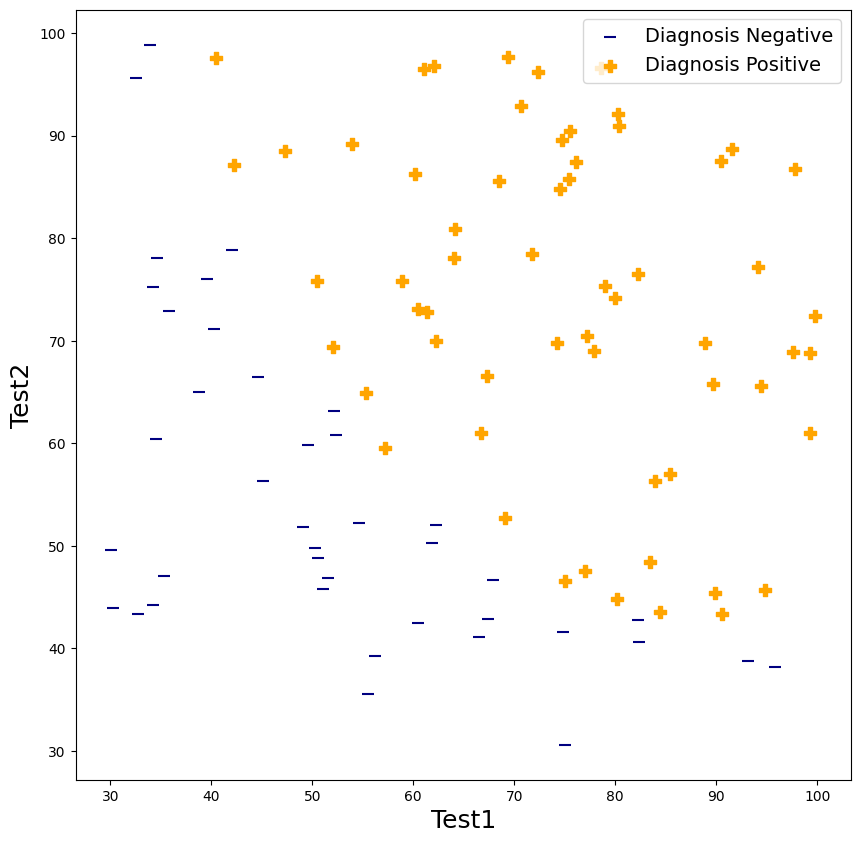

In [5]:
data = pd.read_csv(path + '/labtests.csv')
X1 = data.iloc[:,:2].values
y1 = data.iloc[:,2].values

plot_twoclass_data(X1,y1,data.columns[0], data.columns[1],['Diagnosis Negative', 'Diagnosis Positive'])

# Load Non Linearly Separable Data

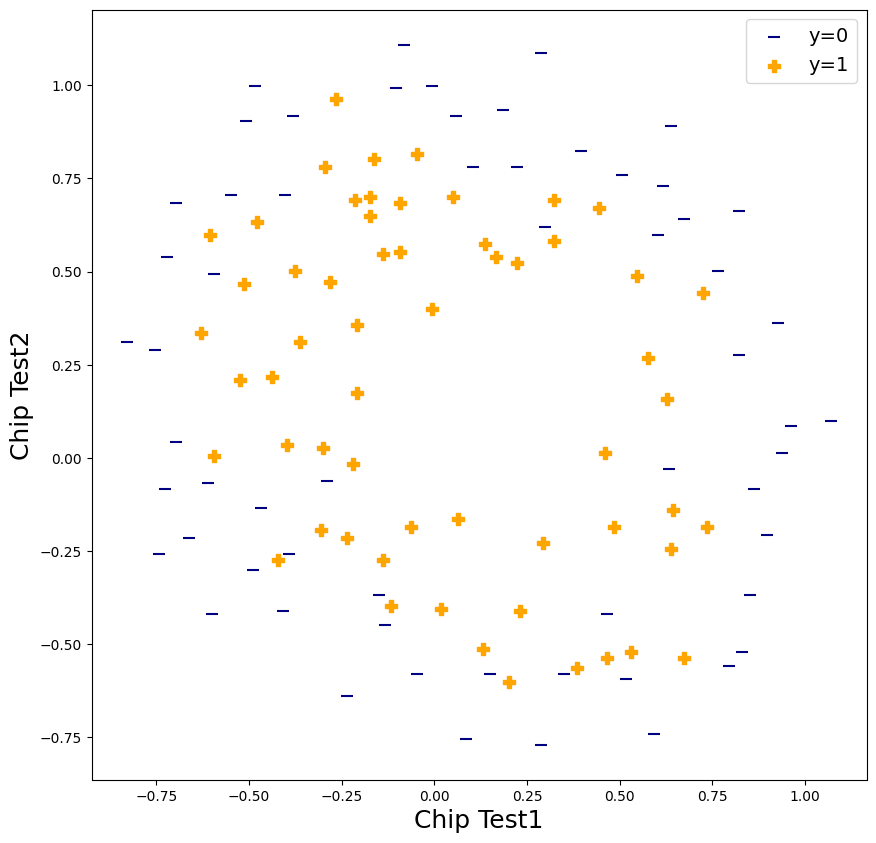

In [6]:
data = pd.read_csv(path + '/chipdata.csv')
X = data.iloc[:,:2].values
y = data['y'].values

plot_twoclass_data(X, y,'Chip Test1', 'Chip Test2',['y=0','y=1'])

# SkLearns Logisitc Regression

In [7]:
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

### Unregularized

In [8]:
# small C values indicate stronger regularization. C = 1/lambda
C = 1.0
clf = LogisticRegression(random_state=0, C=C).fit(X1, y1)

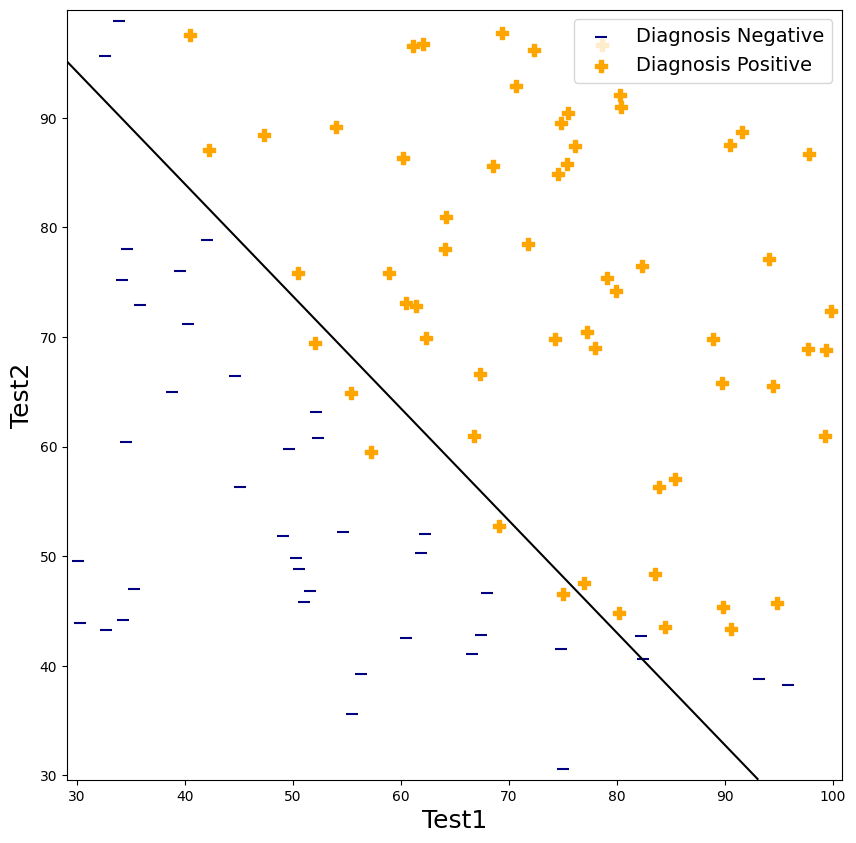

In [9]:
plot_decision_boundary_logistic(X1, y1, clf, 'Test1', 'Test2', ['Diagnosis Negative', 'Diagnosis Positive'])

In [10]:
poly = PolynomialFeatures(degree = 3,include_bias=False)
Xpoly = poly.fit_transform(X)
features = poly.get_feature_names_out()
C = 1.0
clf = LogisticRegression(random_state=0, C=C).fit(Xpoly, y)

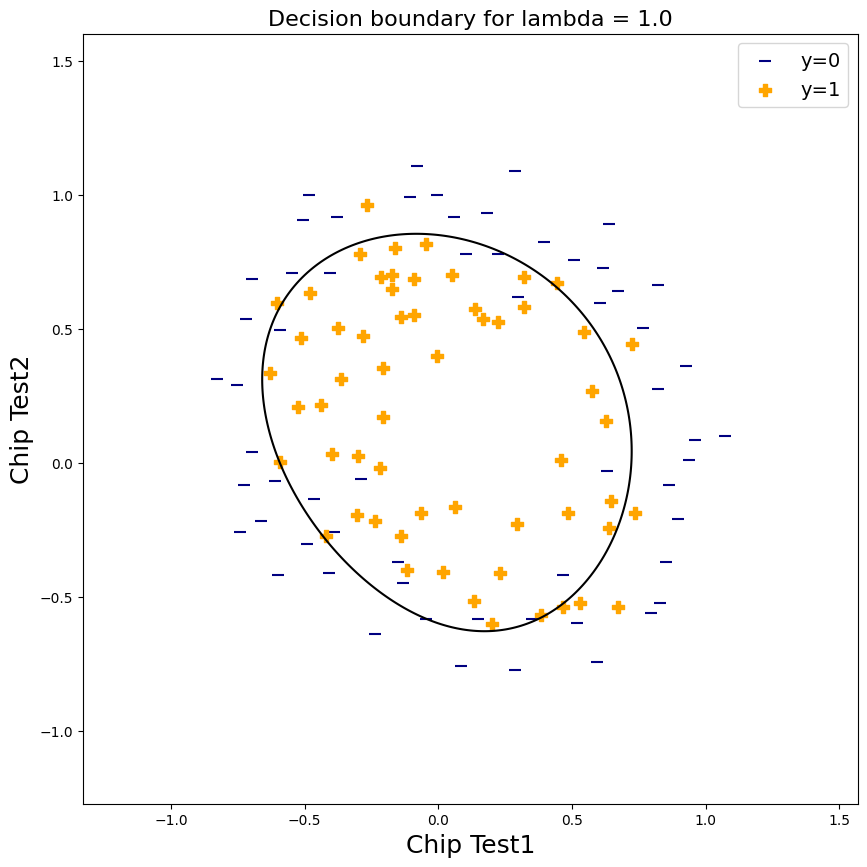

In [11]:
plot_decision_boundary_model_poly(X, y, clf, poly, C, 'Chip Test1', 'Chip Test2', ['y=0', 'y=1'])

### Regularized

#### L2 Regularized

Parameters of model at C =  0.01 or lambda1 =  100.0
x0: -0.01867260834579552
x1: 0.0032732537756884564
x0^2: -0.05586848071775034
x0 x1: -0.013302428583338743
x1^2: -0.040473810588057726
x0^3: -0.019426158987881473
x0^2 x1: -0.008045198017826202
x0 x1^2: -0.008975181127878309
x1^3: -0.025158460554119914
Model's loss:  0.6874431478078085
Parameters of model at C =  0.1 or lambda1 =  10.0
x0: -0.05380970535428886
x1: 0.09571389839371944
x0^2: -0.49001798205999153
x0 x1: -0.1106095194735073
x1^2: -0.3513887290118653
x0^3: -0.11622751867184011
x0^2 x1: -0.06609444735697681
x0 x1^2: -0.06486056500468247
x1^3: -0.19537845843830998
Model's loss:  0.6511259533824163
Parameters of model at C =  1.0 or lambda1 =  1.0
x0: 0.47569309617625866
x1: 1.0487993734032621
x0^2: -2.7464644990076827
x0 x1: -0.8629282163110087
x1^2: -2.1183300921548778
x0^3: -0.27059160645918645
x0^2 x1: -0.399018729324692
x0 x1^2: -0.3340750222057043
x1^3: -0.8993152577941957
Model's loss:  0.5110754981405827
Parameters o

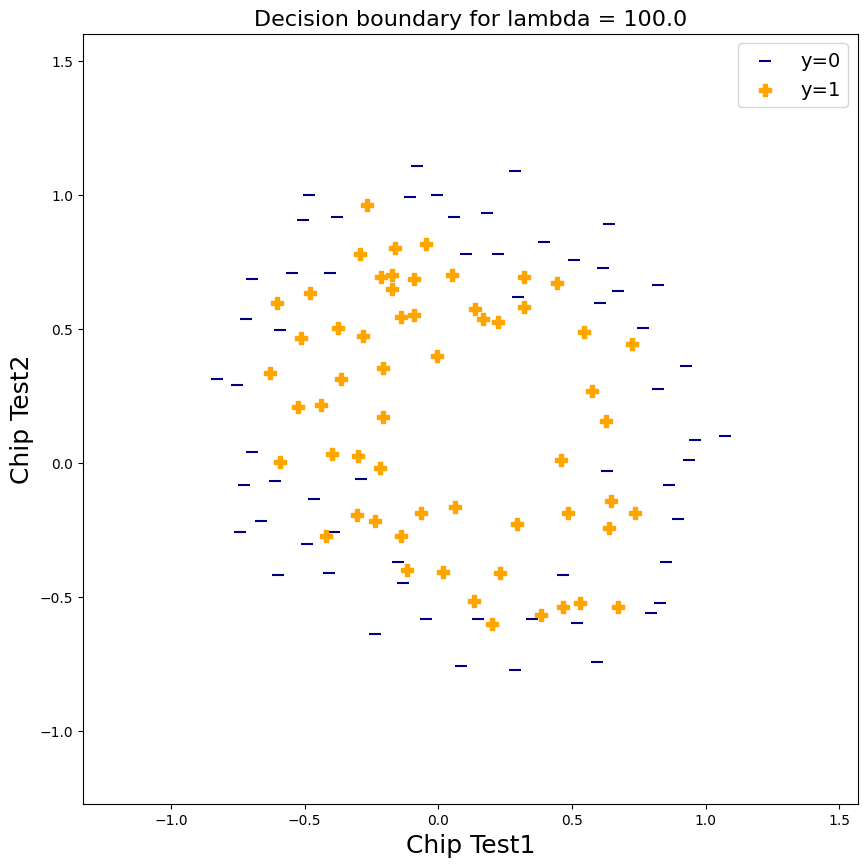

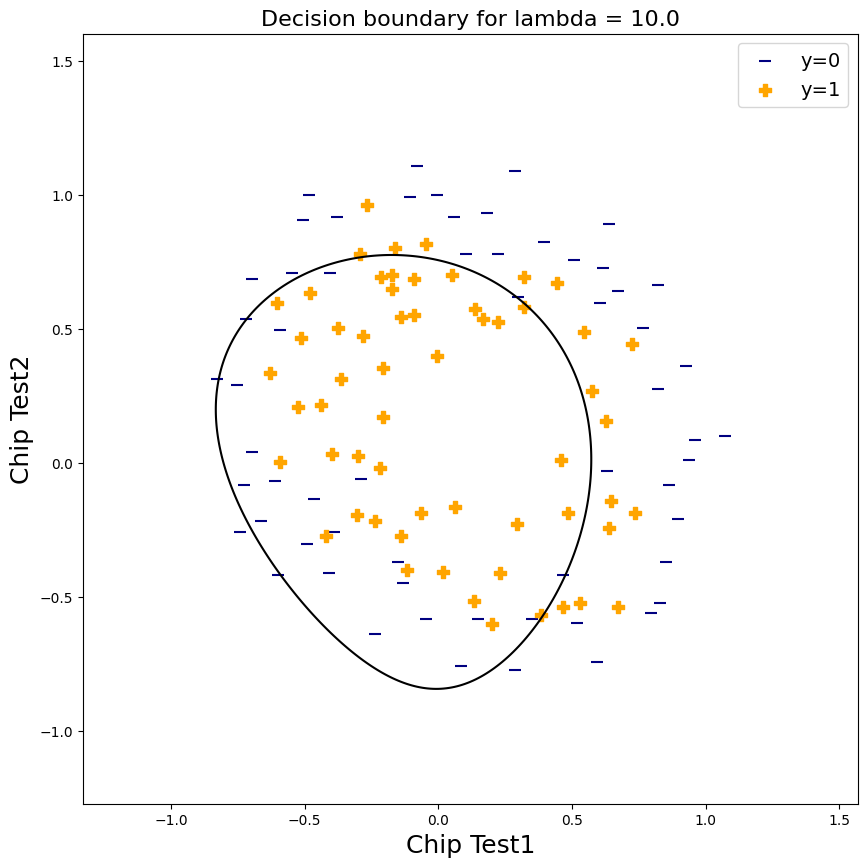

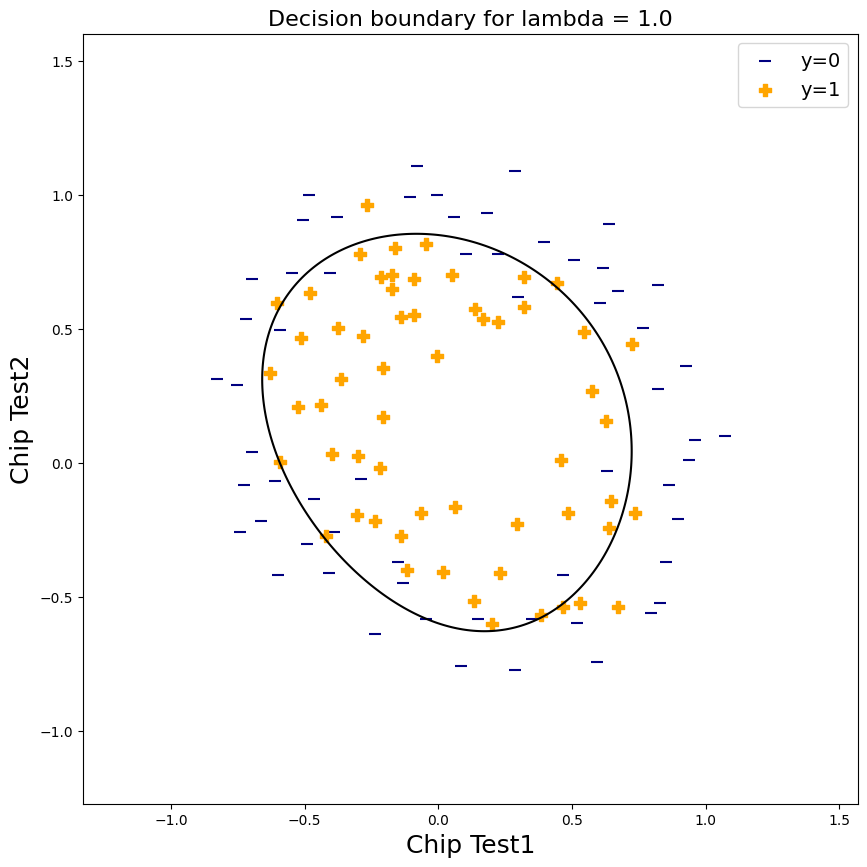

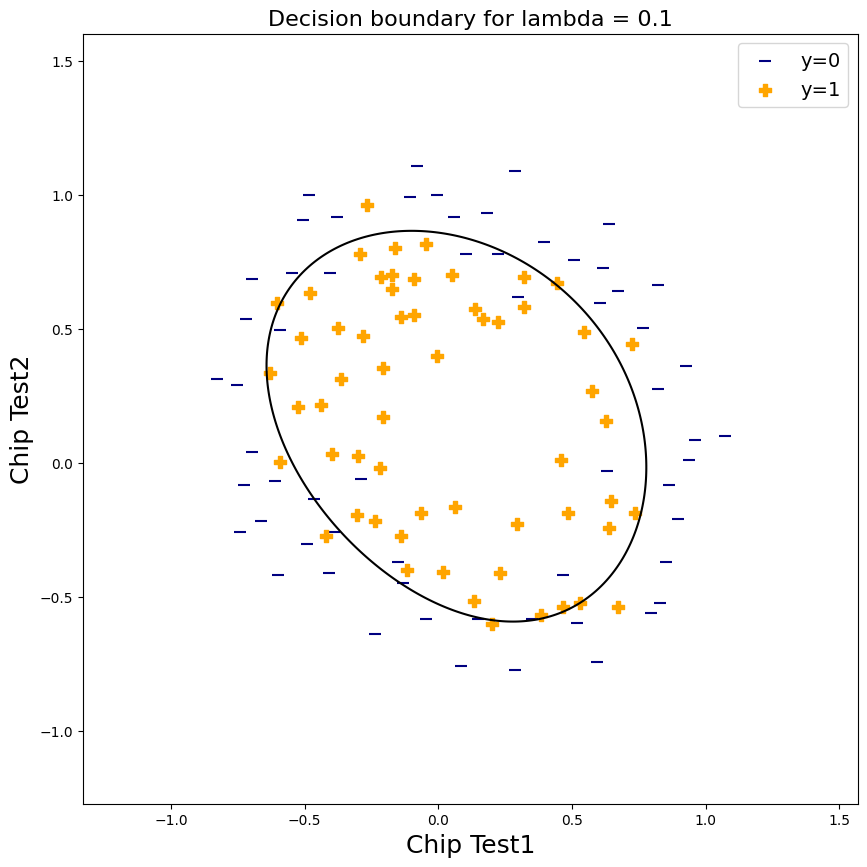

In [12]:
C_list = [0.01, 0.1, 1.0, 10]
poly = PolynomialFeatures(degree = 3,include_bias=False)
Xpoly = poly.fit_transform(X)
features = poly.get_feature_names_out()
for C in C_list:
  clf = LogisticRegression(random_state=0,C=C).fit(Xpoly, y)

  print("Parameters of model at C = ", C, "or lambda1 = ", 1/C)
  for feature_name, coef in zip(features, clf.coef_[0]):
    print(f"{feature_name}: {coef}")

  y_proba = clf.predict_proba(Xpoly)
  data_loss = log_loss(y, y_proba)
  print("Model's loss: ", data_loss)

  plot_decision_boundary_model_poly(X, y, clf, poly, C, 'Chip Test1', 'Chip Test2',['y=0', 'y=1'])

#### L1 Regularized

* 'liblinear' (binary classification)
* 'saga' (binary + multiclass, large datasets, faster)

Parameters of model at C =  0.01 or lambda1 =  100.0
x0: 0.0
x1: 0.0
x0^2: 0.0
x0 x1: 0.0
x1^2: 0.0
x0^3: 0.0
x0^2 x1: 0.0
x0 x1^2: 0.0
x1^3: 0.0
Model's loss:  0.6931471805599454
Parameters of model at C =  0.1 or lambda1 =  10.0
x0: 0.0
x1: 0.0
x0^2: 0.0
x0 x1: 0.0
x1^2: 0.0
x0^3: 0.0
x0^2 x1: 0.0
x0 x1^2: 0.0
x1^3: 0.0
Model's loss:  0.6931471805599454
Parameters of model at C =  1.0 or lambda1 =  1.0
x0: 0.7635768818832326
x1: 1.2643534227510473
x0^2: -5.028201636019353
x0 x1: -1.7111525193875772
x1^2: -4.384128894177366
x0^3: 0.0
x0^2 x1: 0.0
x0 x1^2: 0.0
x1^3: 0.0
Model's loss:  0.43951536664228275
Parameters of model at C =  10 or lambda1 =  0.1
x0: 2.7109739988284702
x1: 4.106401554432436
x0^2: -10.576553270168665
x0 x1: -6.2551597664760505
x1^2: -9.614612702869925
x0^3: 0.0
x0^2 x1: 0.0
x0 x1^2: 0.0
x1^3: -1.5284446672271796
Model's loss:  0.3483027900040814


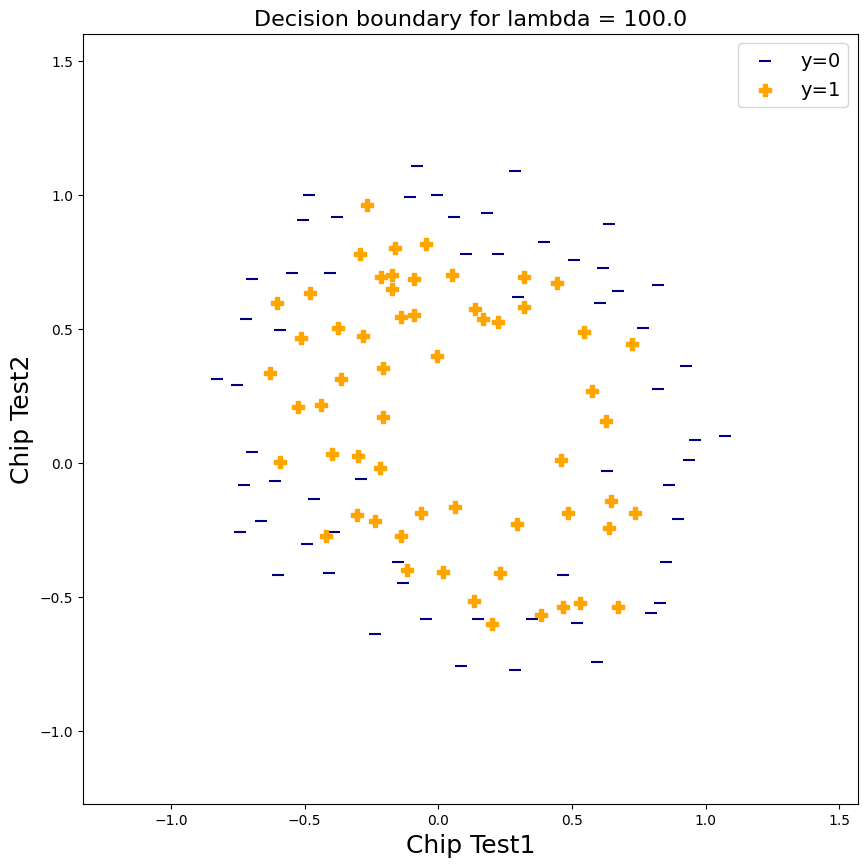

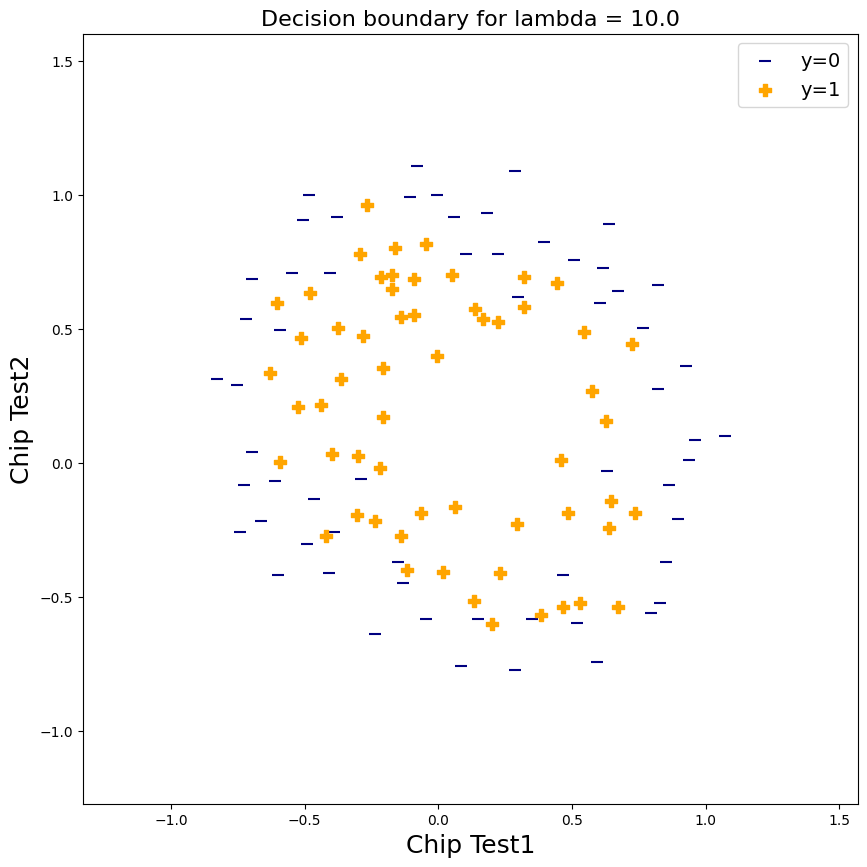

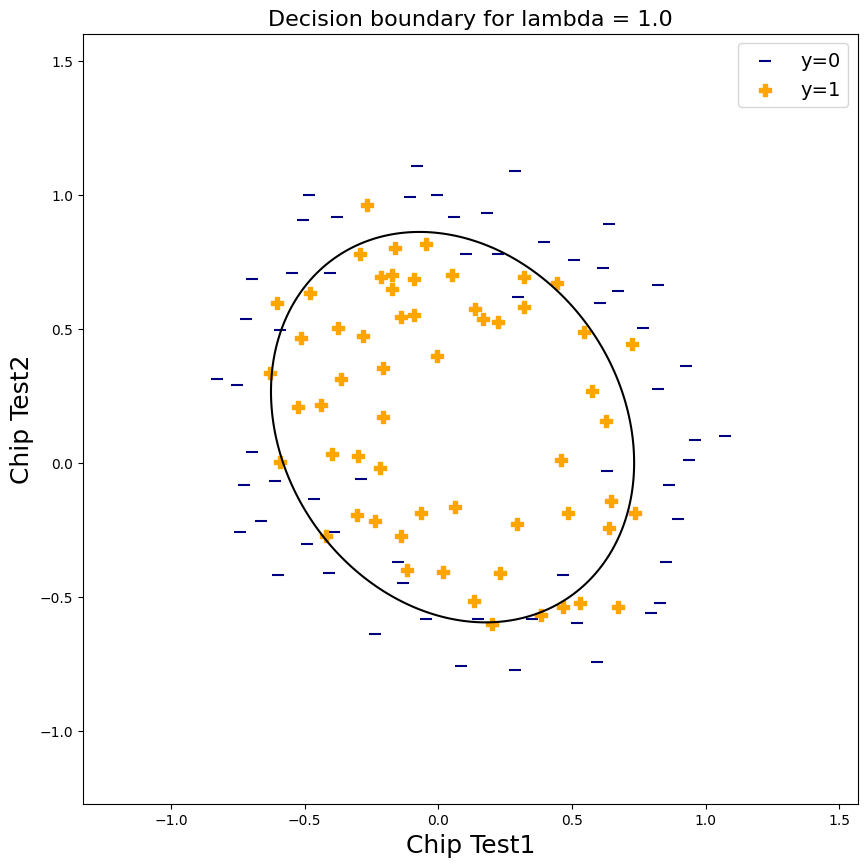

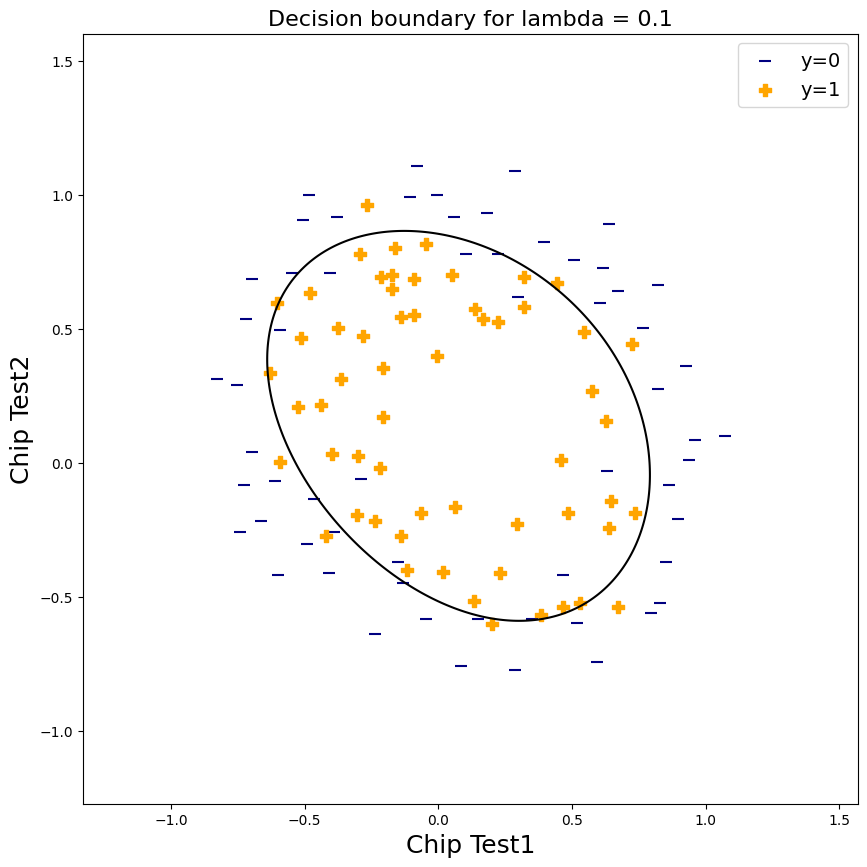

In [13]:
C_list = [0.01, 0.1, 1.0, 10]
poly = PolynomialFeatures(degree = 3,include_bias=False)
Xpoly = poly.fit_transform(X)
features = poly.get_feature_names_out()
for C in C_list:
  clf = LogisticRegression(random_state=0, C=C, penalty='l1', solver='liblinear').fit(Xpoly, y)
  print("Parameters of model at C = ", C, "or lambda1 = ", 1/C)
  for feature_name, coef in zip(features, clf.coef_[0]):
    print(f"{feature_name}: {coef}")

  y_proba = clf.predict_proba(Xpoly)
  data_loss = log_loss(y, y_proba)
  print("Model's loss: ", data_loss)

  plot_decision_boundary_model_poly(X, y, clf, poly, C, 'Chip Test1', 'Chip Test2', ['y=0', 'y=1'])

#### L1 + L2 Regularized

* penalty='elasticnet'
* solver='saga'
* l1_ratio=α (a value between 0 and 1)

Parameters of model at C =  0.01 L1 ratio 0.1 or lambda1 =  100.0
x0: 0.0
x1: 0.0
x0^2: 0.0
x0 x1: 0.0
x1^2: 0.0
x0^3: 0.0
x0^2 x1: 0.0
x0 x1^2: 0.0
x1^3: 0.0
Model's loss:  0.6930161381465663
Parameters of model at C =  0.1 L1 ratio 0.1 or lambda1 =  10.0
x0: -0.023974568835402103
x1: 0.008405101477378834
x0^2: -0.4495144793980255
x0 x1: -0.0320308925366995
x1^2: -0.28813111224143756
x0^3: -0.05558246819471681
x0^2 x1: 0.0
x0 x1^2: 0.0
x1^3: -0.10697957870793967
Model's loss:  0.6594295842933708
Parameters of model at C =  1.0 L1 ratio 0.1 or lambda1 =  1.0
x0: 0.4422572330731334
x1: 1.048563499275789
x0^2: -2.8542644148686183
x0 x1: -0.8815830559631883
x1^2: -2.194603220140946
x0^3: -0.18364775437854033
x0^2 x1: -0.3314394589777668
x0 x1^2: -0.259719825465905
x1^3: -0.871695913160401
Model's loss:  0.5080914099050056
Parameters of model at C =  10 L1 ratio 0.1 or lambda1 =  0.1
x0: 1.9496454619770318
x1: 3.265778927980834
x0^2: -7.281612068817082
x0 x1: -3.5814777614833884
x1^2: -6.2

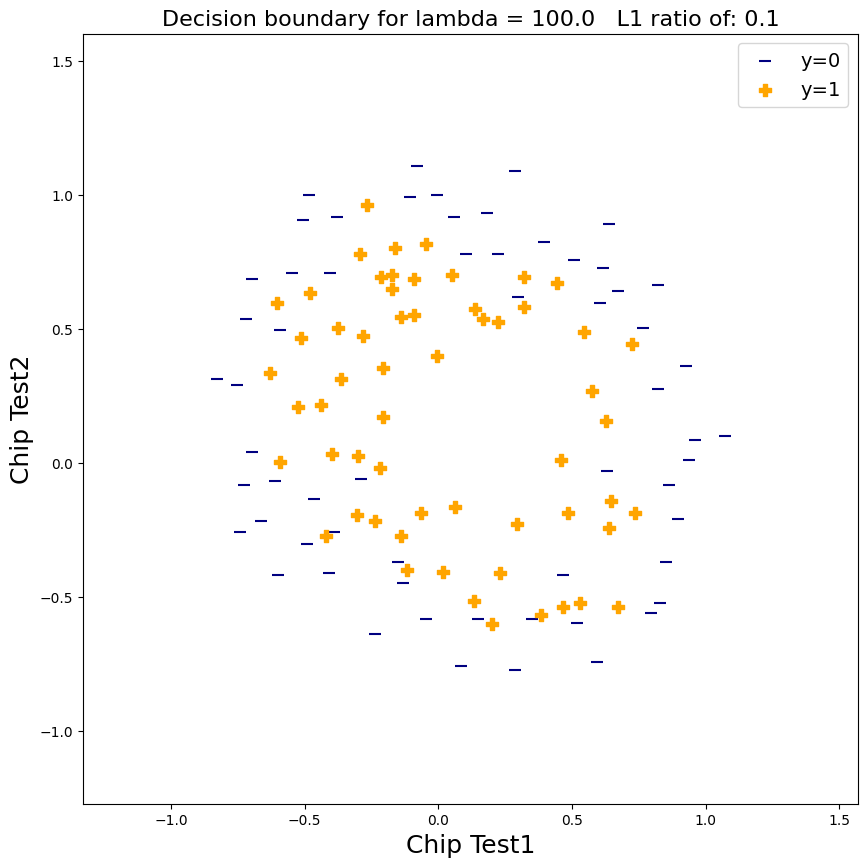

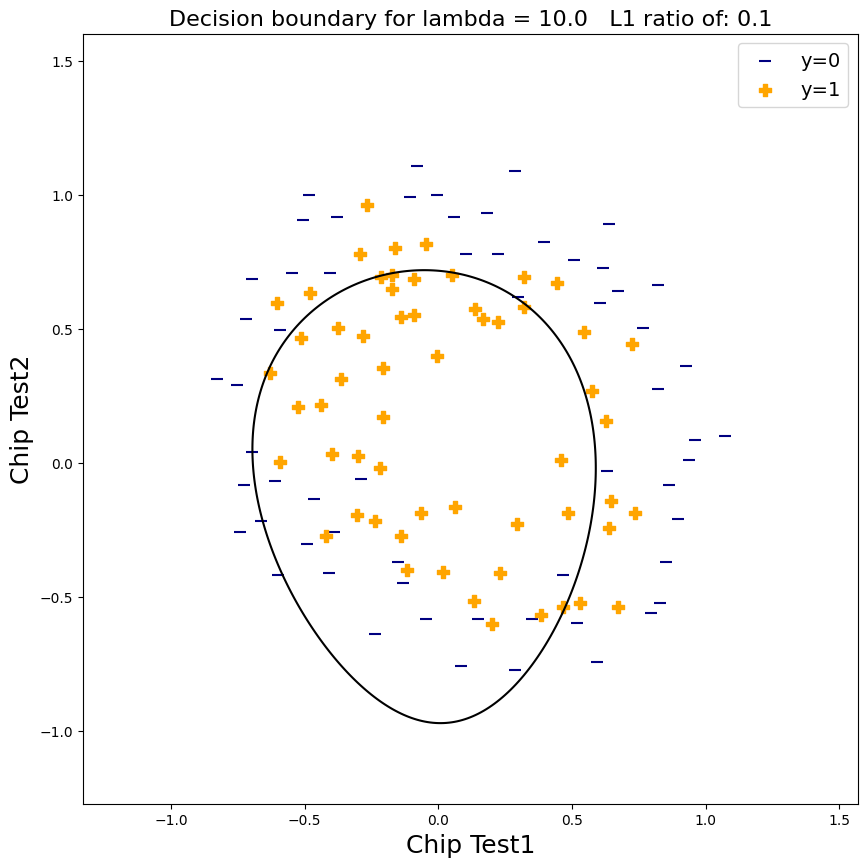

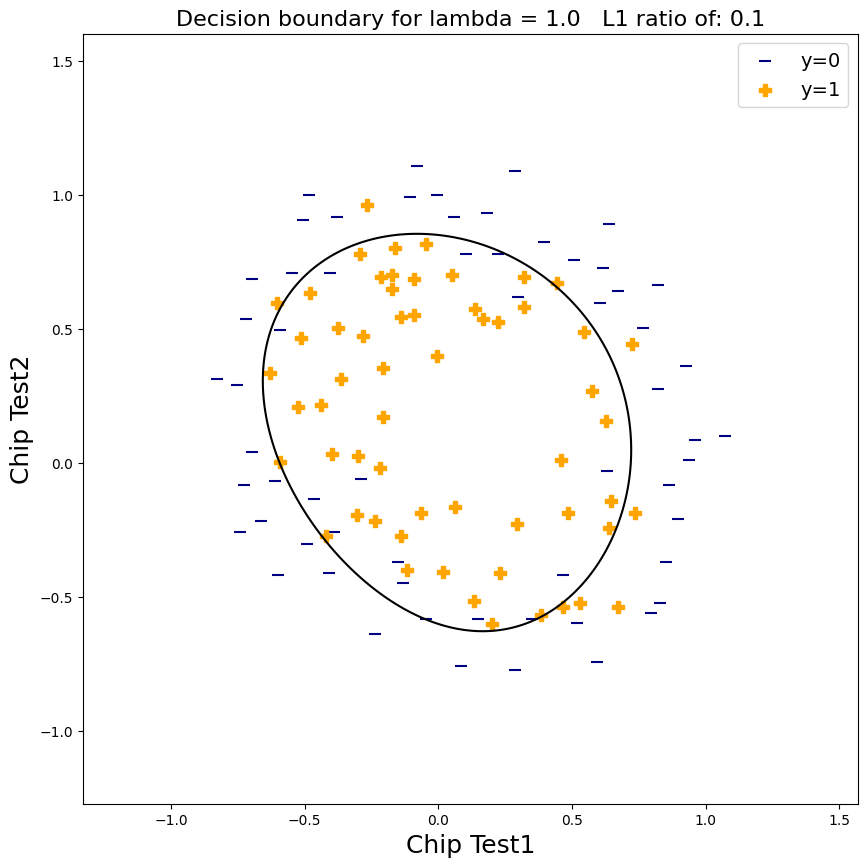

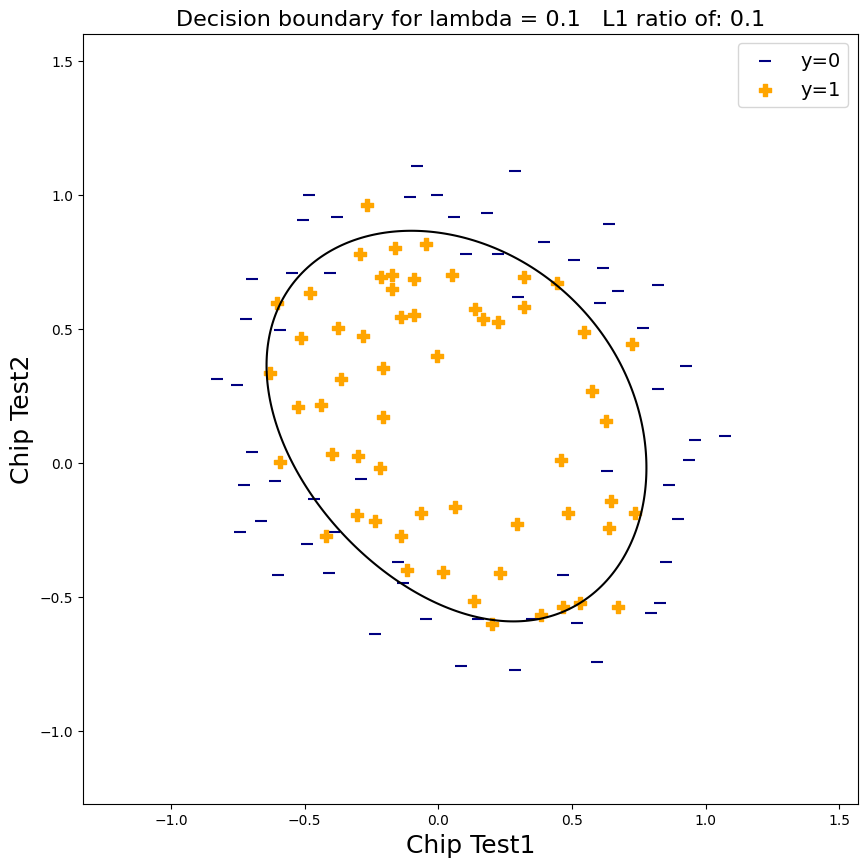

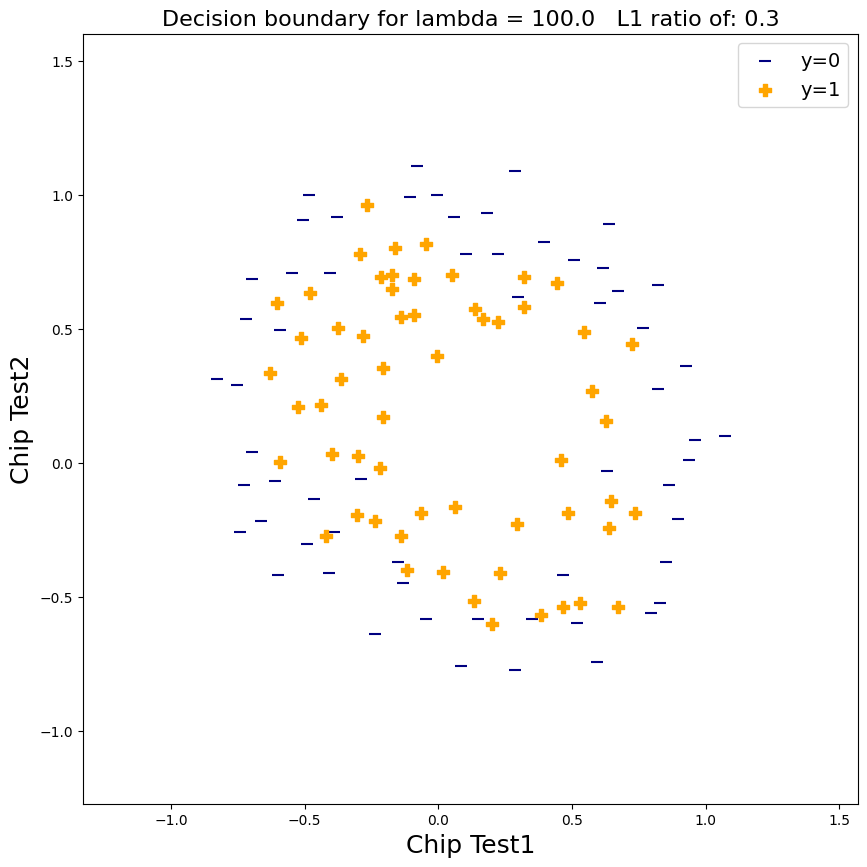

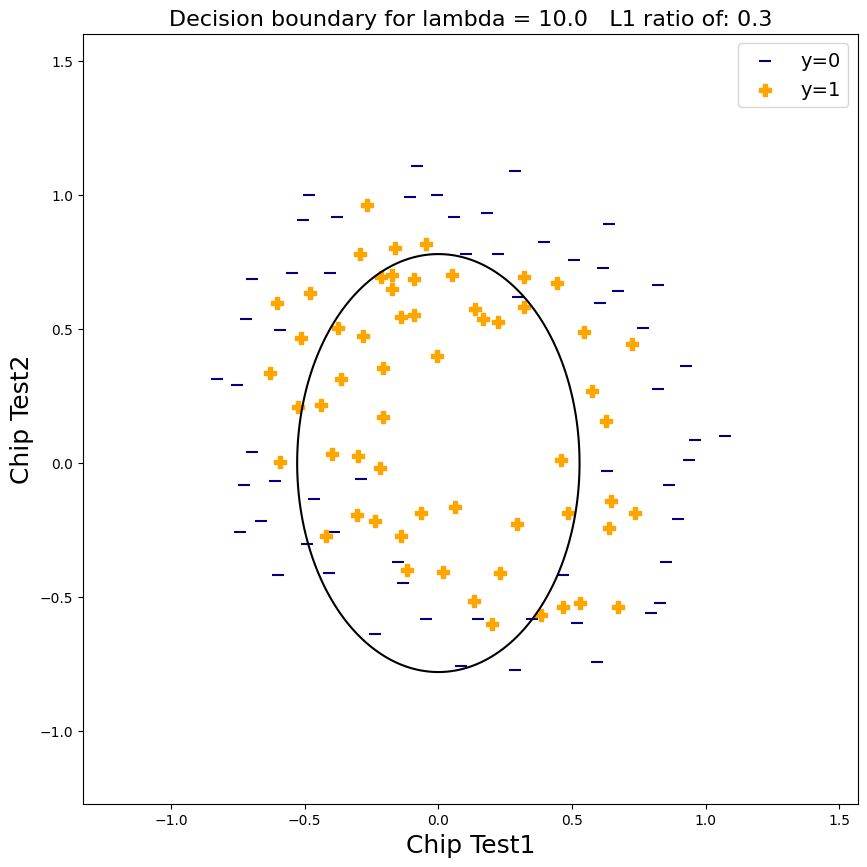

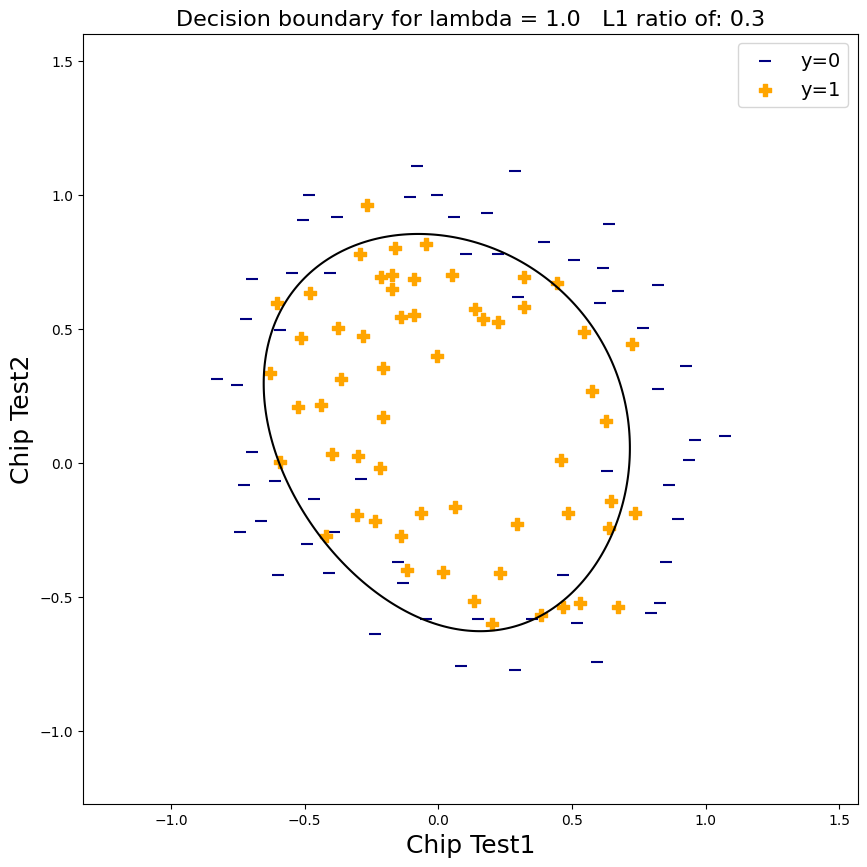

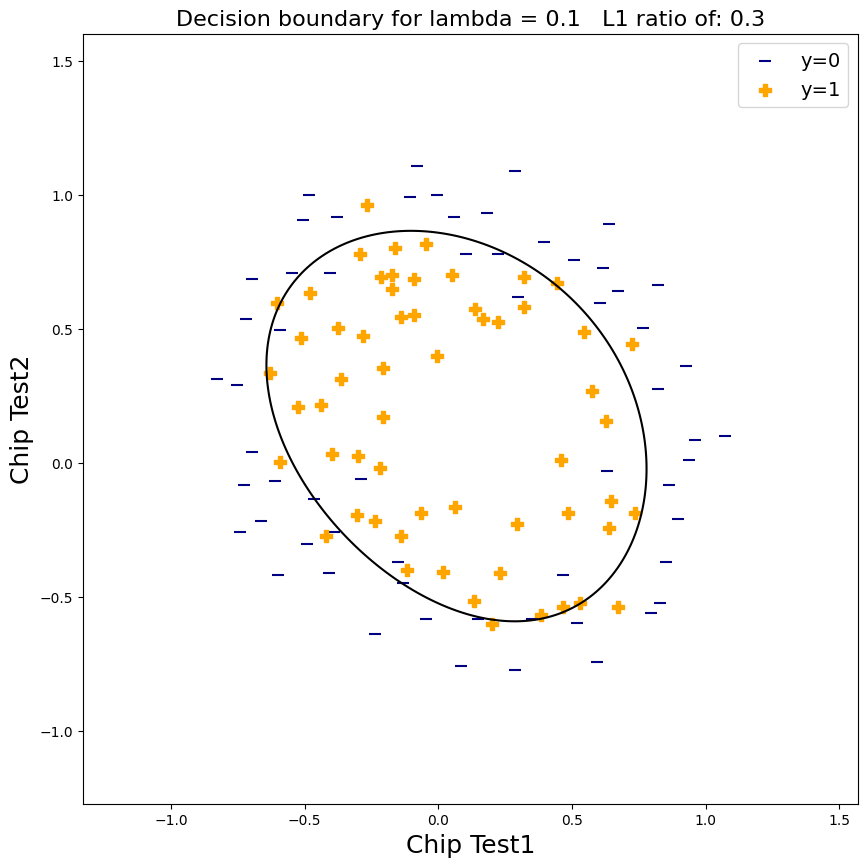

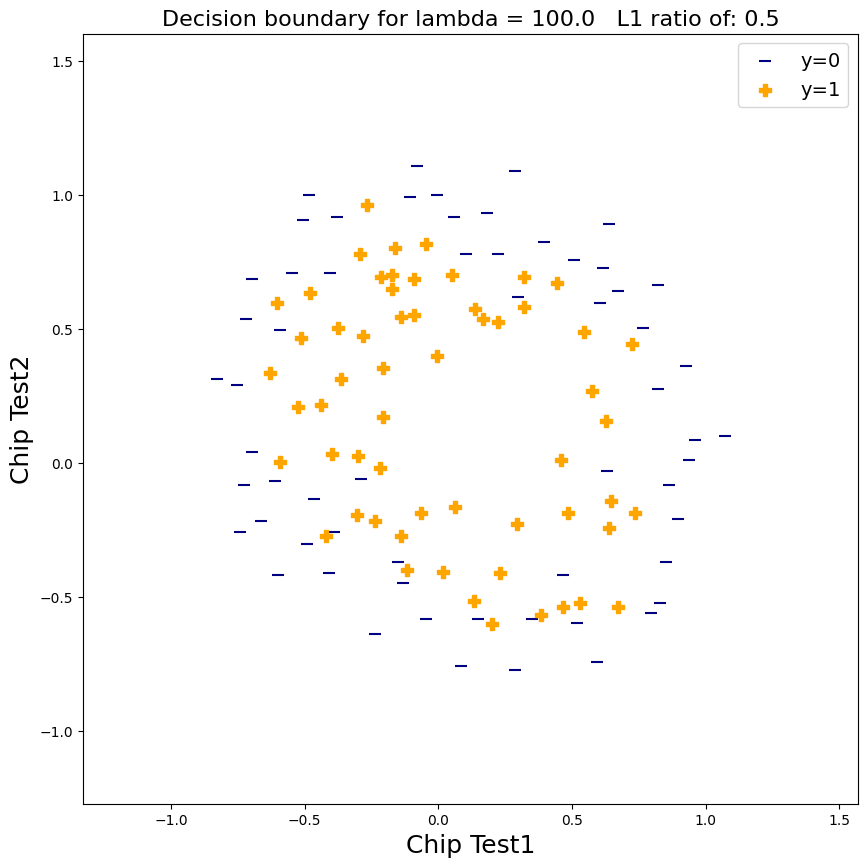

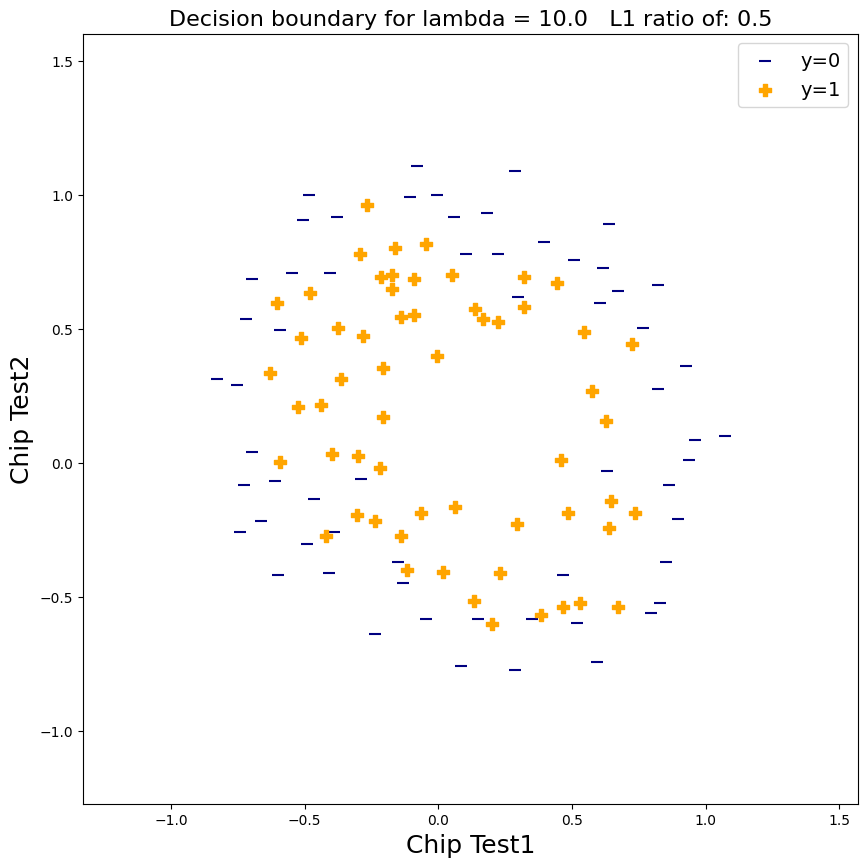

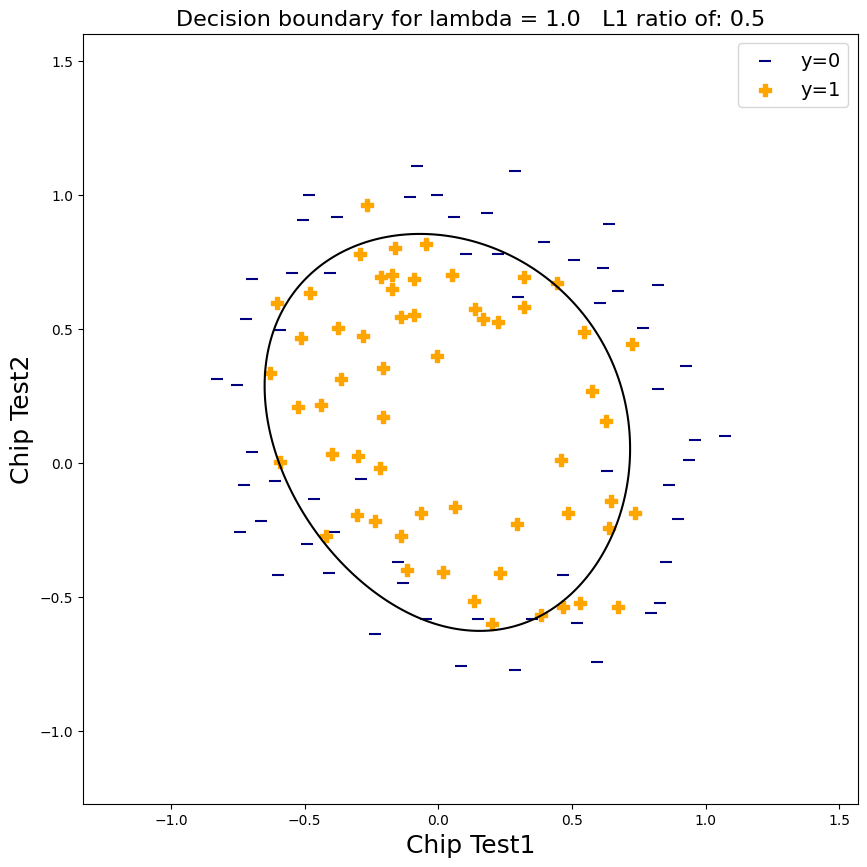

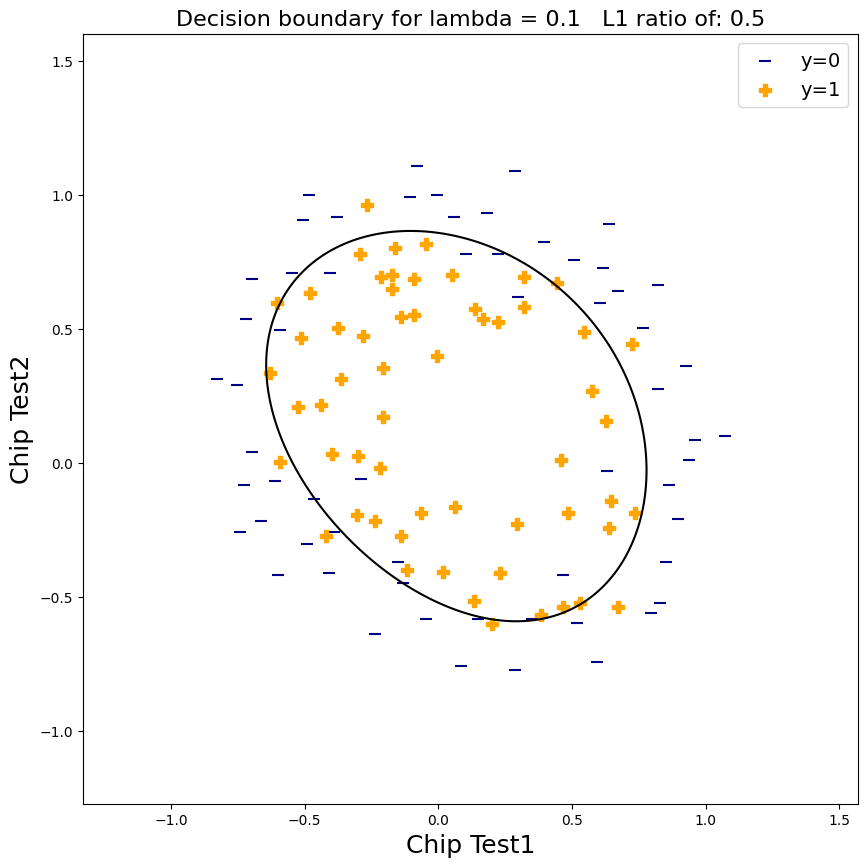

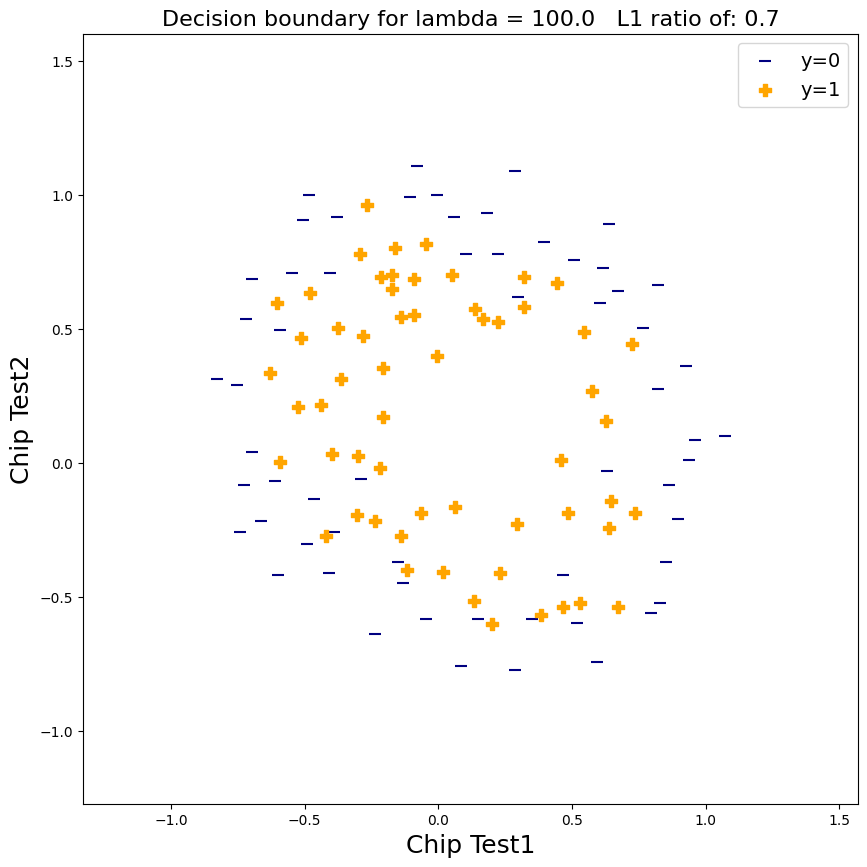

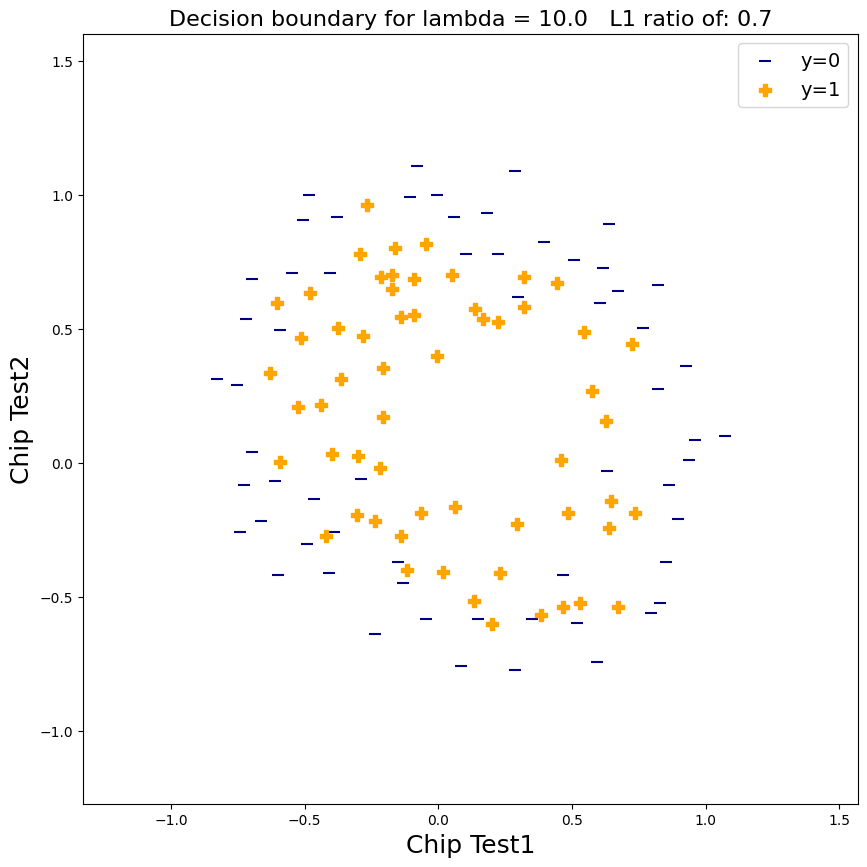

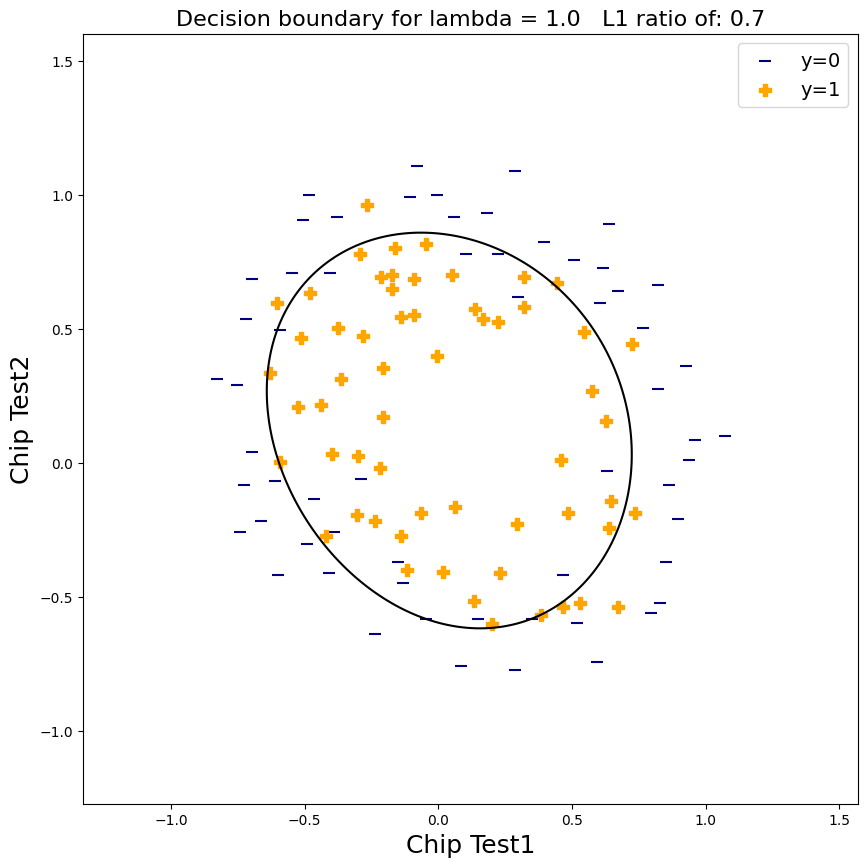

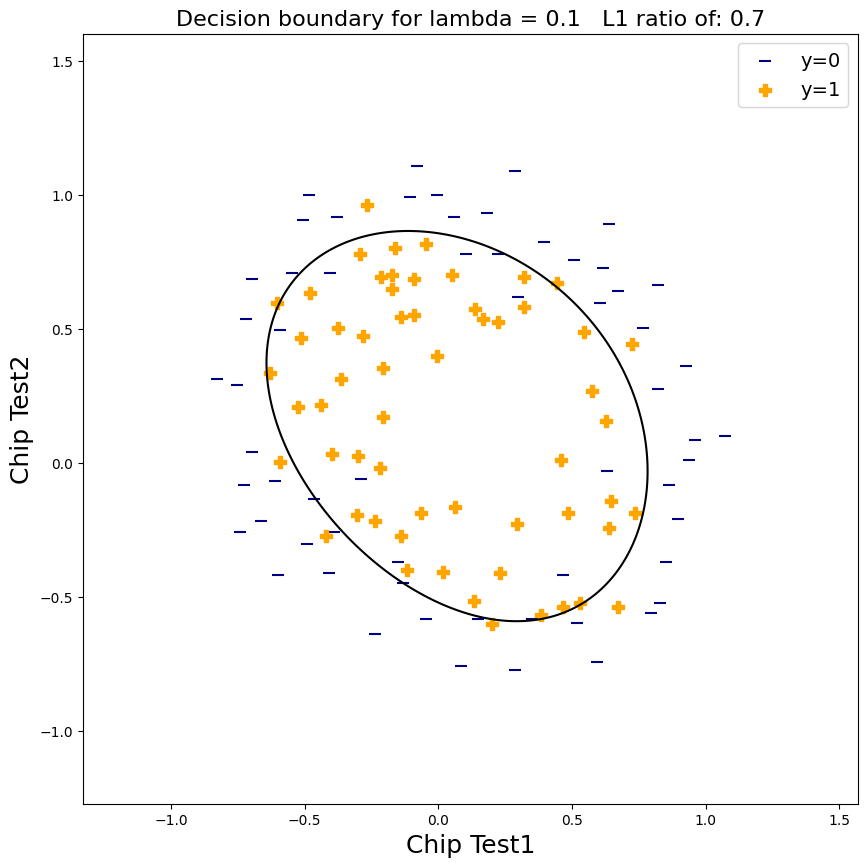

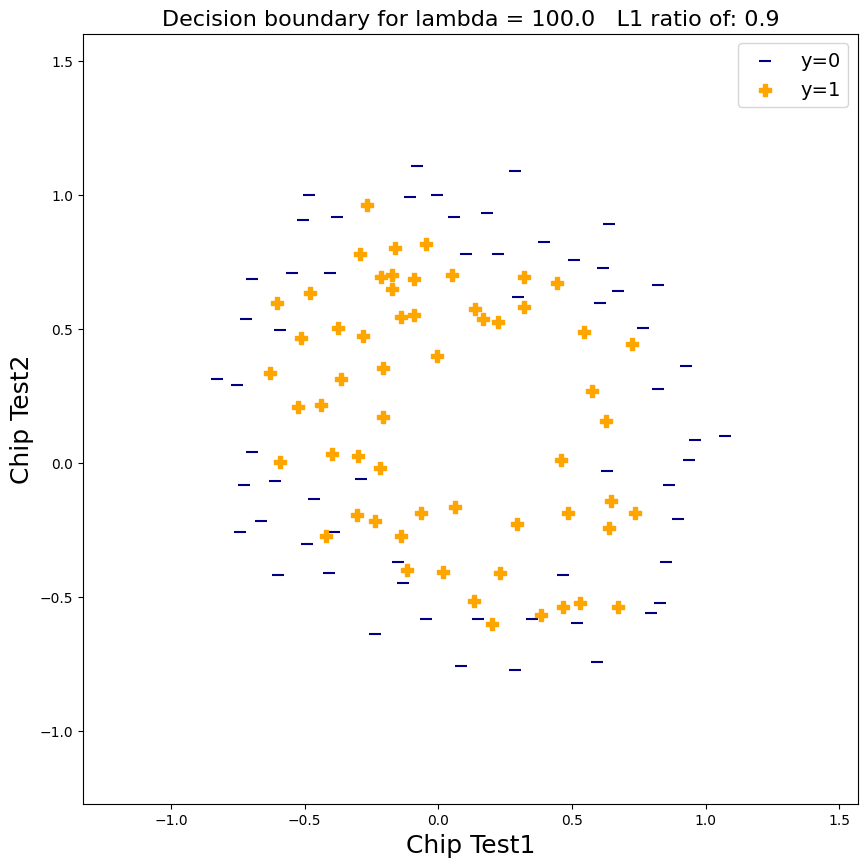

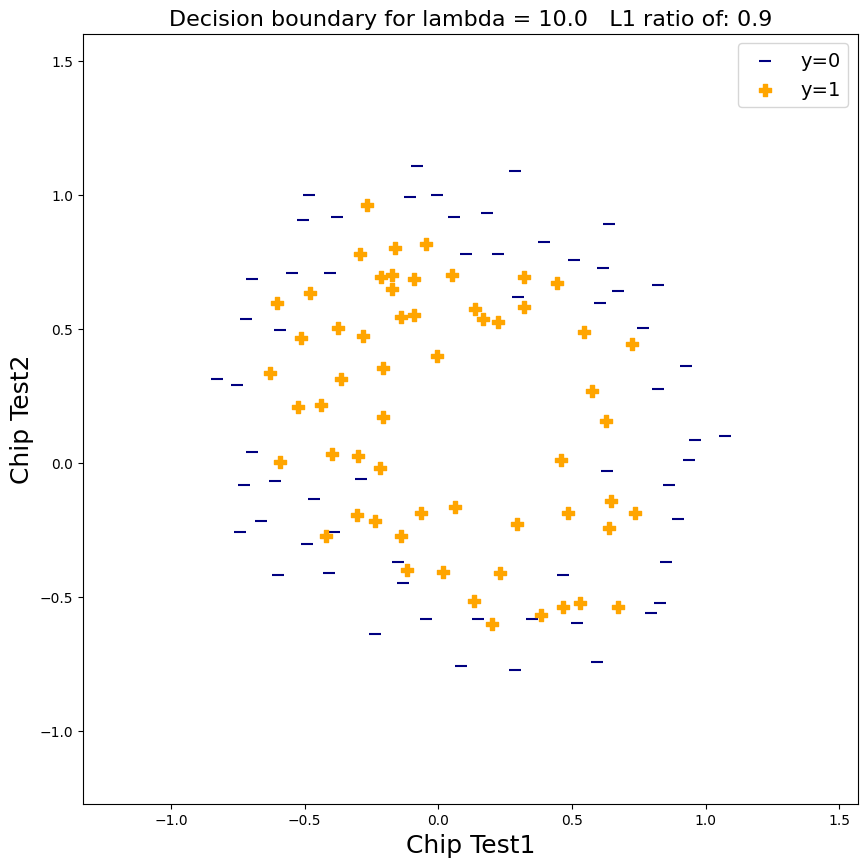

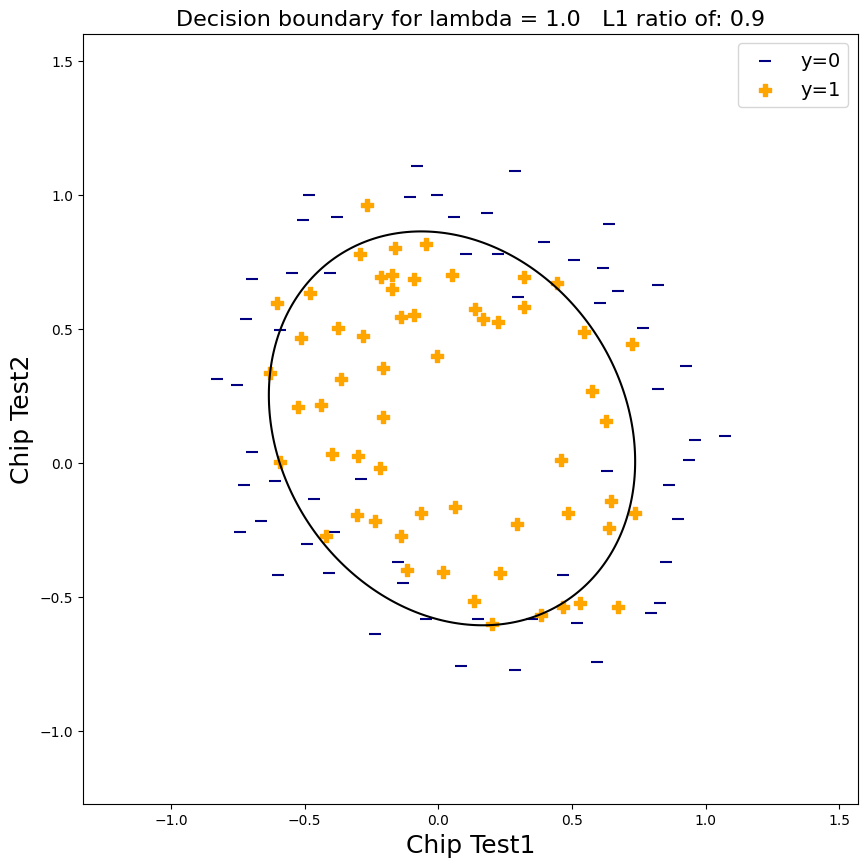

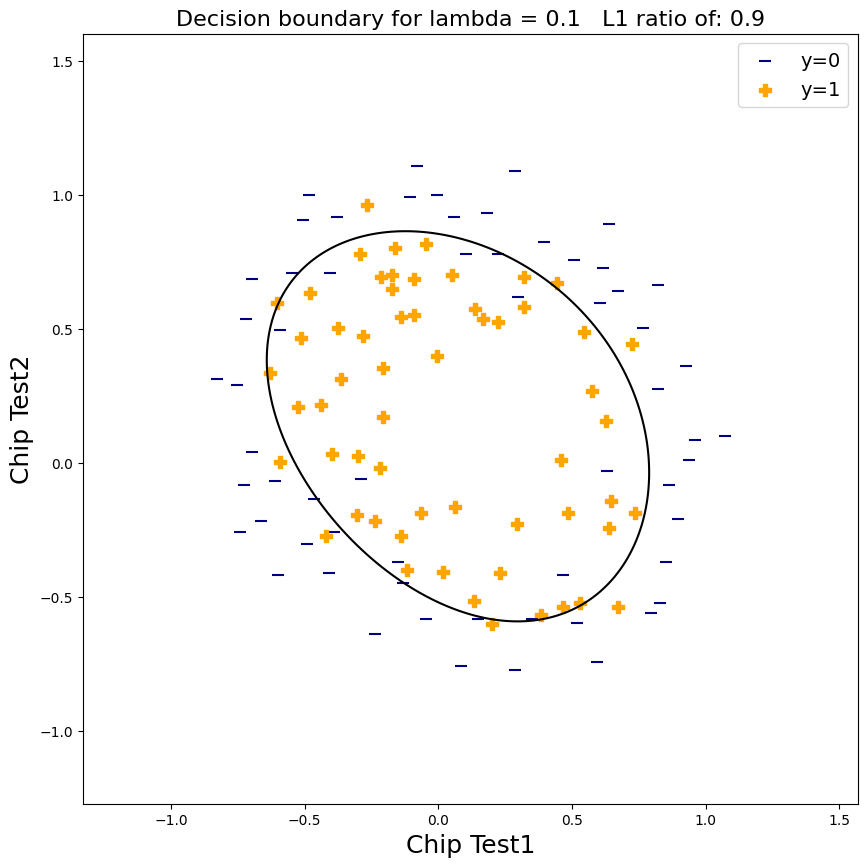

In [14]:
C_list = [0.01, 0.1, 1.0, 10]
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]
poly = PolynomialFeatures(degree = 3,include_bias=False)
Xpoly = poly.fit_transform(X)
features = poly.get_feature_names_out()

for l1_ratio in l1_ratios:
  for C in C_list:
    clf = LogisticRegression(random_state=0, C=C, penalty='elasticnet', solver='saga', l1_ratio=l1_ratio, max_iter=5000).fit(Xpoly, y)

    print("Parameters of model at C = ", C,"L1 ratio", l1_ratio,  "or lambda1 = ", 1/C)
    for feature_name, coef in zip(features, clf.coef_[0]):
      print(f"{feature_name}: {coef}")

    y_proba = clf.predict_proba(Xpoly)
    data_loss = log_loss(y, y_proba)
    print("Model's loss: ", data_loss)

    plot_decision_boundary_model_poly(X, y, clf, poly, C, 'Chip Test1', 'Chip Test2', ['y=0', 'y=1'], l1_ratio=l1_ratio)

# Pytorch Logisitc Regression

In [15]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

import sklearn
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'viridis'

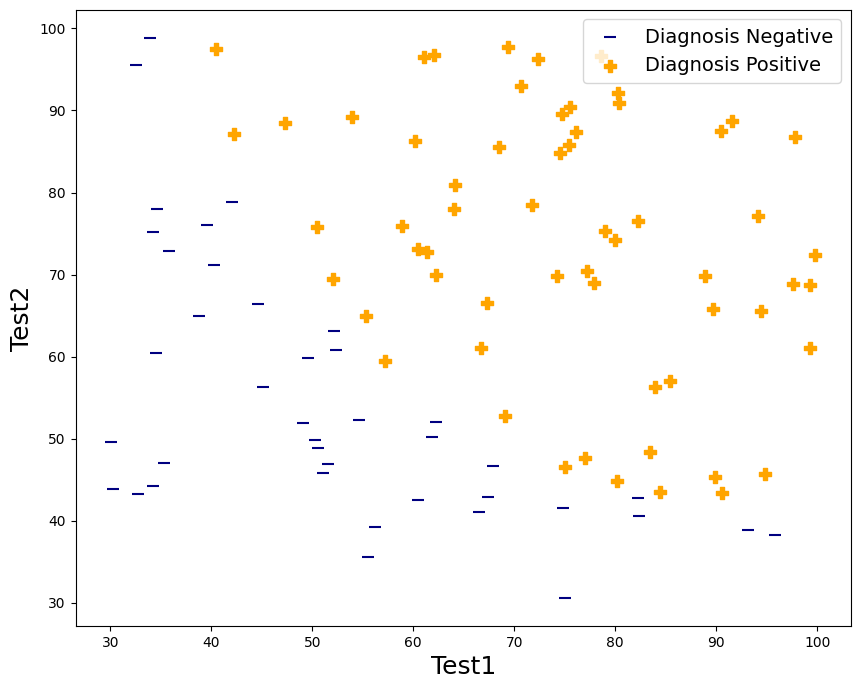

In [16]:
data = pd.read_csv(path + '/labtests.csv')
X = data.iloc[:,:2].values
y = data.iloc[:,2].values

plot_twoclass_data(X,y,data.columns[0], data.columns[1],['Diagnosis Negative', 'Diagnosis Positive'])


In [17]:
def plot_twoclass_data(X,y,xlabel,ylabel,legend):
    fig = plt.figure()
    X0 = X[y==0.0]
    X1 = X[y==1.0]
    plt.scatter(X0[:,0],X0[:,1], s=80, label = legend[0],marker='_',c='navy')
    plt.scatter(X1[:,0],X1[:,1], s = 80, label=legend[1],marker='P',c='orange')
    plt.xlabel(xlabel,fontsize=18)
    plt.ylabel(ylabel,fontsize=18)
    plt.legend(loc="upper right",fontsize=14)

def plot_decision_boundary_logistic(X,y,model,  xlabel, ylabel, legend):
    plot_twoclass_data(X,y.squeeze(),xlabel,ylabel,legend)
    X = X.detach().numpy() if isinstance(X, torch.Tensor) else X
    y = y.detach().numpy() if isinstance(y, torch.Tensor) else y
    # create a mesh to plot in
    h = 0.01
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))

    # make predictions on this mesh

    Z = model.forward(torch.Tensor(np.vstack([xx1.flatten(), xx2.flatten()]).T)).detach().numpy()

    # Put the result into a color contour plot
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1,xx2,Z,cmap='viridis',levels=[0.5])


In [18]:
class LogisticRegression(nn.Module):
  """The logistic regression model."""
  def __init__(self, num_inputs, lr):
    super().__init__()
    self._lr = lr
    self.net = nn.Linear(num_inputs, 1)
    self.net.bias.data.fill_(0)

  def forward(self, x):
    return self.net(x)

  def loss(self, yhat, y):
    #There are many losses you can use, for BCE we can use multiple redutions like 'sum' and 'none'
    criterion = torch.nn.BCEWithLogitsLoss(reduction='mean')
    return criterion(yhat,y)

  def predict(self, X):
    return torch.sigmoid(self.net(X))

  def configure_optimizers(self):
    #Optimizers are the functions that work with the loss to get a gradient and implement lr to update weights.
    # compute gradients and update weights.
    return torch.optim.LBFGS(self.parameters(),self._lr)

Optimizers are the functions that work with the loss to get a gradient and implement lr to update weights. The image below shows multiple known optimizers and was taken from this [Github Repository](https://marquis08.github.io/dl_basics/DL-optimizers/)


Pytorch allows to mdoify the losses:

For binary classification
* torch.nn.BCEWithLogitsLoss ← best for logits
* torch.nn.BCELoss ← requires sigmoid manually

For multi-class classification
* torch.nn.CrossEntropyLoss ← logits + class indices

For regression
* torch.nn.MSELoss
* torch.nn.L1Loss
* torch.nn.SmoothL1Loss

For ranking
* torch.nn.MarginRankingLoss

For custom loss

* You can write your own class by subclassing nn.Module:

    e.g.,
```
class MyLoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, outputs, targets):
        loss = torch.mean((outputs - targets)**2 + torch.abs(outputs))
        return loss
```




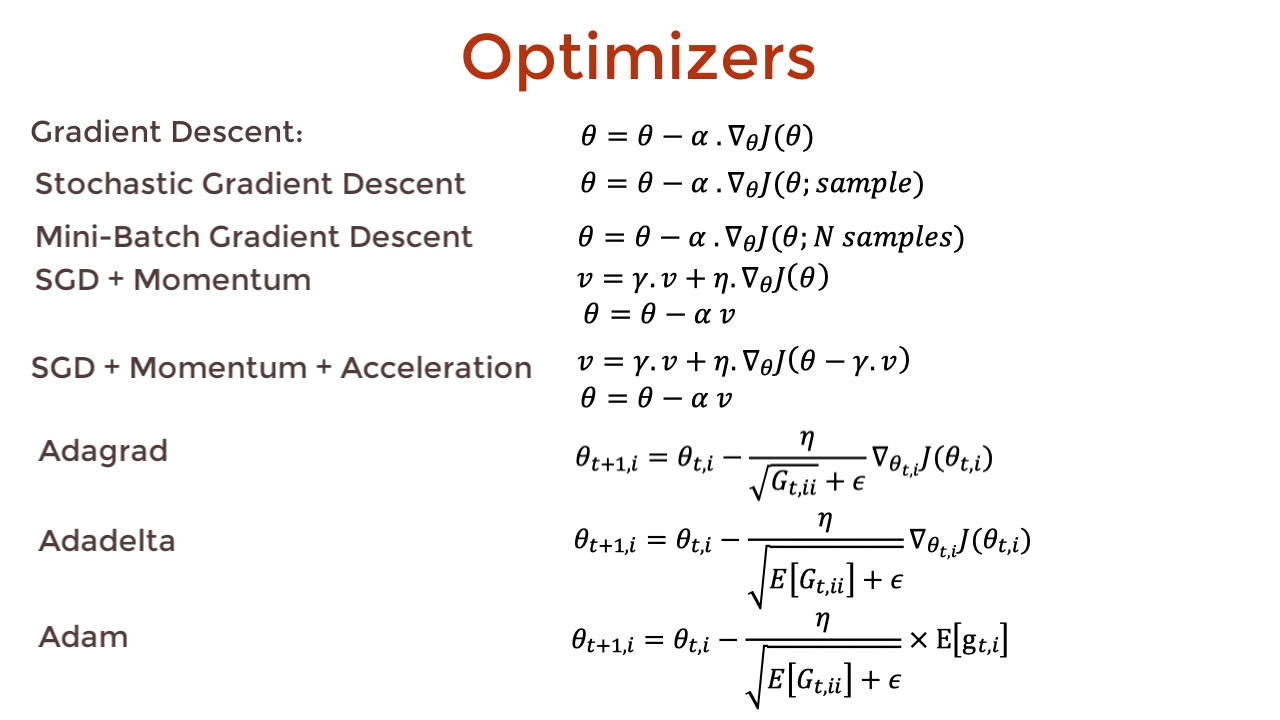

In [19]:
display(Image(filename="optimizer-equations.png"))

## Unregularized

In [20]:
#Convert X, y to Torch Tensors
X = torch.Tensor(X1)
y = torch.Tensor(y1).reshape((-1, 1))
print(X.shape, y.shape)

#hyperparameters
lr = 0.001
num_epochs = 100

#Initialize and Train
model = LogisticRegression(2, 0.01)

def train_model(model, X, y, num_epochs):
  train_loss = torch.zeros((num_epochs))
  optimizer = model.configure_optimizers()
  for epoch in range(num_epochs):

    def calculate_loss():
      optimizer.zero_grad()
      output = model.forward(X)
      loss = model.loss(output, y)
      loss.backward()
      return loss

    optimizer.step(calculate_loss)
    loss = calculate_loss()
    train_loss[epoch] = loss.item()

  return model, train_loss

torch.Size([100, 2]) torch.Size([100, 1])


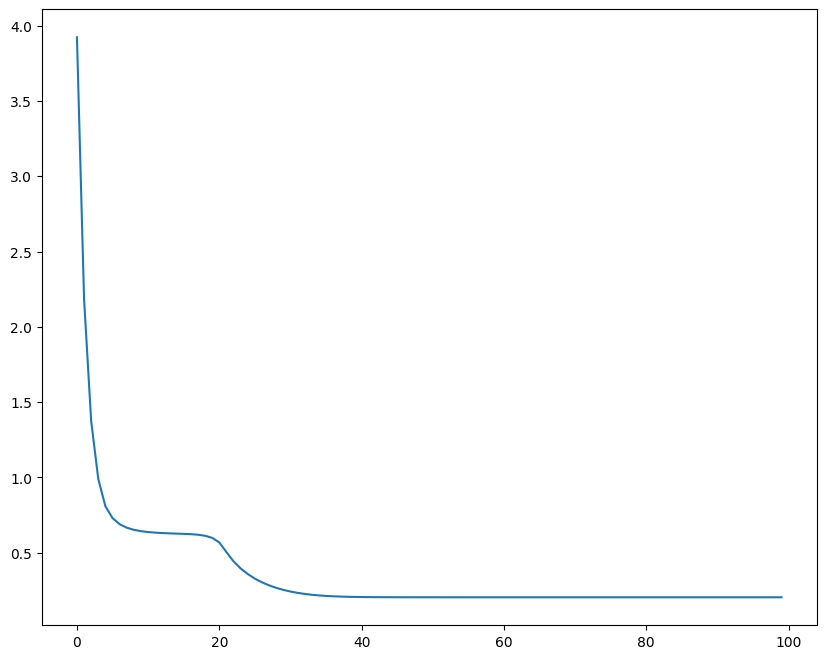

In [21]:
model, train_loss = train_model(model, X, y, num_epochs)
plt.plot(torch.arange(num_epochs), train_loss)

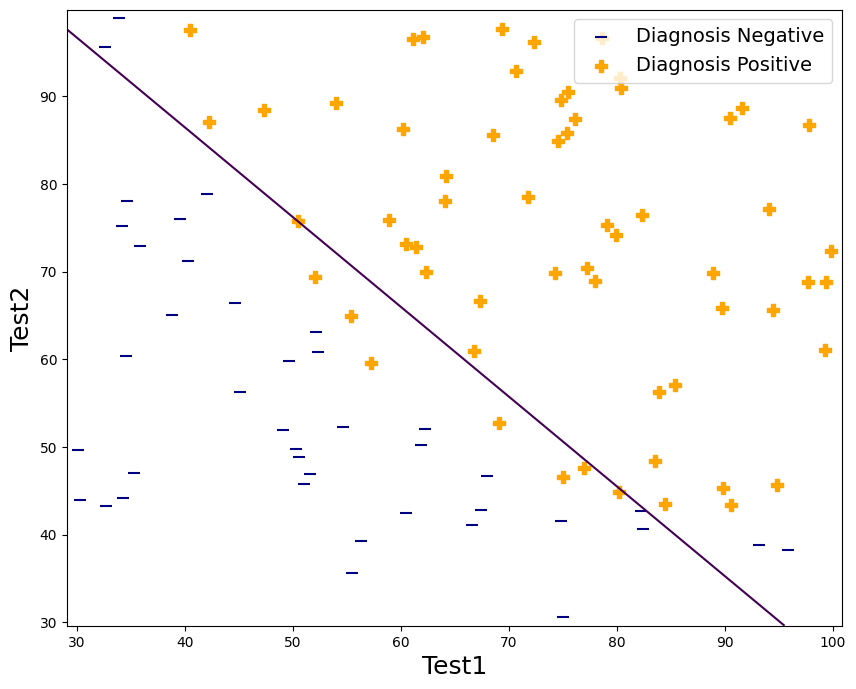

In [22]:
plot_decision_boundary_logistic(X, y, model,  'Test1', 'Test2',['Diagnosis Negative', 'Diagnosis Positive'])

## Regularized

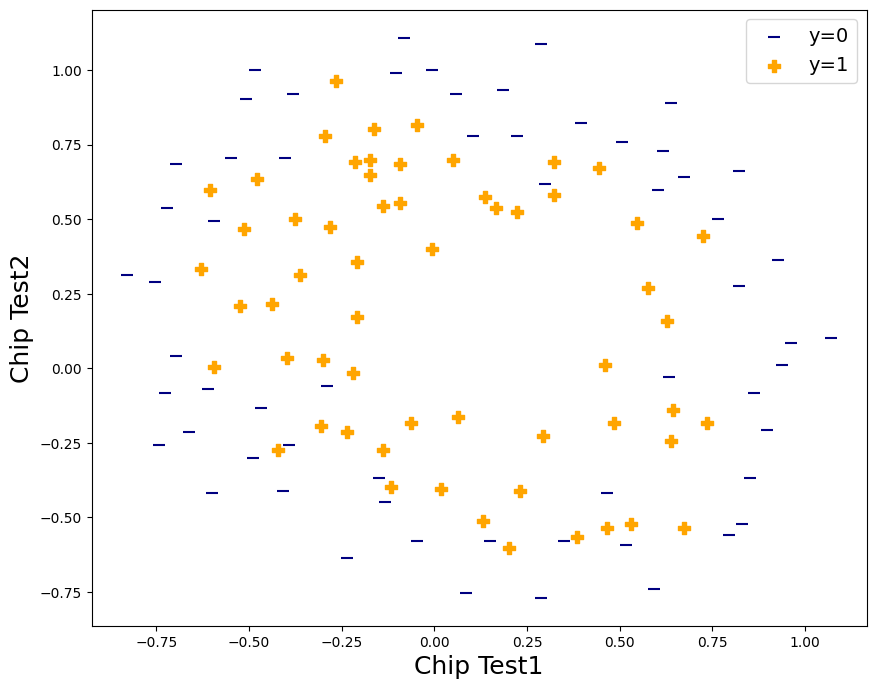

In [23]:
data = pd.read_csv(path + '/chipdata.csv')
X = torch.Tensor(data.iloc[:,:2].values)
y = torch.Tensor(data['y'].values).type('torch.FloatTensor')

plot_twoclass_data(X,y,'Chip Test1', 'Chip Test2',['y=0','y=1'])

In [24]:
#Convert X, y to Torch Tensors
X = torch.Tensor(X)
y = torch.Tensor(y).reshape((-1, 1))
print(X.shape, y.shape)

#hyperparameters
lr = 0.001
num_epochs = 100

#Initialize and Train
model = LogisticRegression(2, 0.01)

def train_model(model, X, y, num_epochs):
  train_loss = torch.zeros((num_epochs))
  optimizer = model.configure_optimizers()
  for epoch in range(num_epochs):

    def calculate_loss():
      optimizer.zero_grad()
      output = model.forward(X)
      loss = model.loss(output, y)
      loss.backward()
      return loss

    optimizer.step(calculate_loss)
    loss = calculate_loss()
    train_loss[epoch] = loss.item()

  return model, train_loss

torch.Size([118, 2]) torch.Size([118, 1])


### L2 Regularized with Bias Function Expansion

In [25]:
class L2LogisticRegression(nn.Module):
    """
    Logistic Regression with explicit L2 regularization.
    """

    def __init__(self, num_features, lr, reg=0.0):
        super().__init__()
        self.net = nn.Linear(num_features, 1)   # single logit output
        self._lr = lr
        self._reg = reg

    def forward(self, X):
        """
        Forward pass: returns raw logits (before sigmoid).
        """
        return self.net(X)

    def predict_proba(self, X):
        """
        Return probability for class=1.
        """
        return torch.sigmoid(self.forward(X))

    def predict(self, X, threshold=0.5):
        """
        Return binary predictions {0,1}.
        """
        probs = self.predict_proba(X)
        return (probs >= threshold).long()

    def loss(self, yhat, y):
        """
        Compute BCE loss with L2 penalty.
        yhat: raw logits from forward()
        y: targets (0/1), shape (N,1) or (N,)
        """
        # Binary cross-entropy with logits
        criterion = nn.BCEWithLogitsLoss()
        base_loss = criterion(yhat, y.view(-1,1).float())

        # L2 penalty (exclude bias term)
        l2_penalty = sum(torch.norm(p, 2).pow(2) for name, p in self.named_parameters() if 'bias' not in name)

        return base_loss + (self._reg / (2 * len(y))) * l2_penalty #change depending on the loss and reg formulas used

    def configure_optimizers(self):
        return torch.optim.LBFGS(self.parameters(),self._lr)

In [26]:
poly = PolynomialFeatures(degree = 3, include_bias=False)
Xpoly = torch.Tensor(poly.fit_transform(X))
features = poly.get_feature_names_out()
y = y.reshape((-1, 1))

In [27]:
print("X expanded features: ", features)

X expanded features:  ['x0' 'x1' 'x0^2' 'x0 x1' 'x1^2' 'x0^3' 'x0^2 x1' 'x0 x1^2' 'x1^3']


Text(0, 0.5, 'Loss')

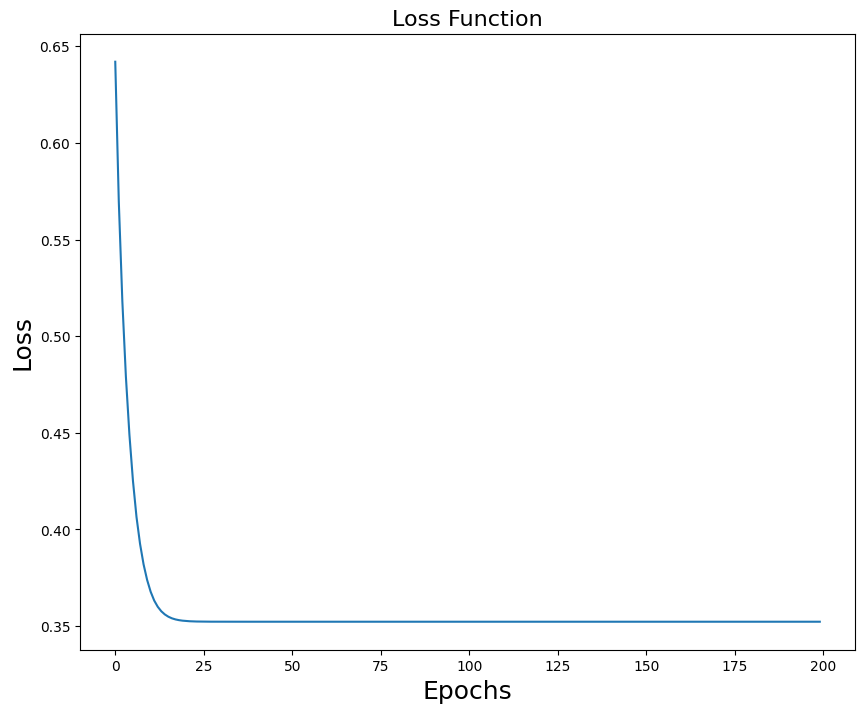

In [28]:
lr = 0.01
reg = 0.005
num_epochs = 200

model = L2LogisticRegression(Xpoly.shape[1], lr, reg)
model, train_loss = train_model(model, Xpoly, y, num_epochs)

plt.plot(torch.arange(num_epochs), train_loss)
plt.title("Loss Function",fontsize=16)
plt.xlabel("Epochs",fontsize=18)
plt.ylabel("Loss",fontsize=18)

In [29]:
##DIFFERENT WAYS OF PRINTING FEATURES.

## AS TENSOR1
# for name, p in model.named_parameters():
#     print(name, p.data)

## AS TENSOR2
# print(model.net.weight, model.net.bias)

## AS Numpy
# weights = model.net.weight.detach().numpy().flatten()
# bias = model.net.bias.detach().item()

## With Names
for name, coef in zip(features, model.net.weight.detach().numpy().flatten()):
    print(f"{name}: {coef:.4f}")
print(f"intercept: {model.net.bias.item():.4f}")

## As Pandas DF
# import pandas as pd
# coefs = pd.DataFrame({
#     'feature': features,
#     'coefficient': model.net.weight.detach().numpy().flatten()
# }).sort_values('coefficient', key=abs, ascending=False)
# print(coefs)

x0: 2.8706
x1: 4.8240
x0^2: -11.3344
x0 x1: -7.1451
x1^2: -10.3936
x0^3: -0.1766
x0^2 x1: -0.4838
x0 x1^2: 1.0545
x1^3: -2.0934
intercept: 4.7920


In [30]:
def plot_decision_boundary_model_poly(X,y,model,poly, xlabel, ylabel, legend, l1_ratio=None):
    plot_twoclass_data(X,y.squeeze(),xlabel,ylabel,legend)
    # create a mesh to plot in
    h = 0.01
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    # do basis function expansion before prediction
    Z = model.predict(torch.Tensor(poly.transform(np.vstack([xx1.flatten(), xx2.flatten()]).T))).detach().numpy()
    # Put the result into a color contour plot
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1,xx2,Z,cmap=plt.cm.gray,levels=[0.5])
    if l1_ratio:
      plt.title("Decision boundary for lambda = " + str(model._reg) + " and L1_ratio = " + str(l1_ratio), fontsize=16)
    else:
      plt.title("Decision boundary for lambda = " + str(model._reg),fontsize=16)


/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


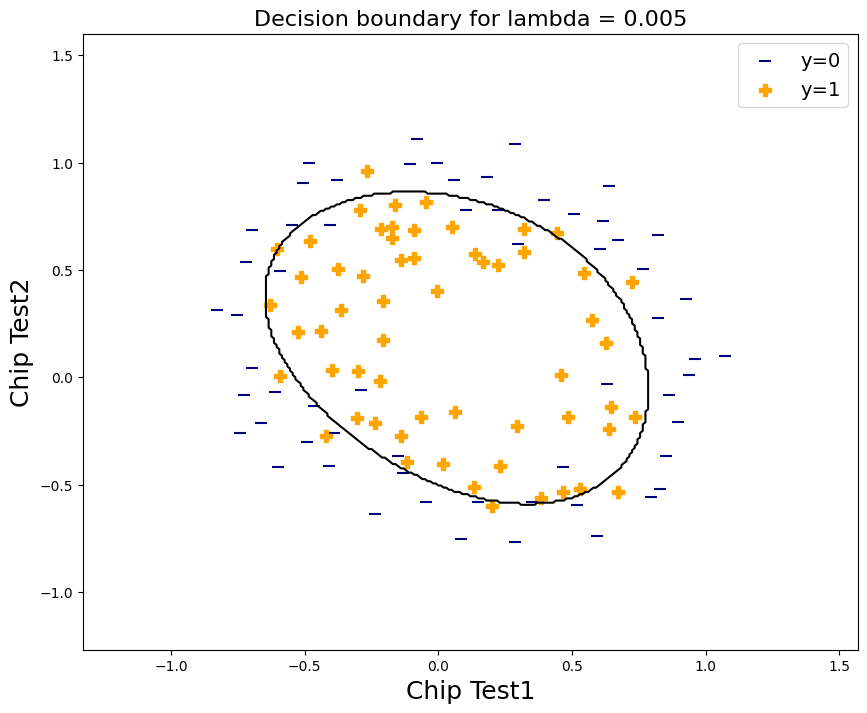

In [31]:
plot_decision_boundary_model_poly(X, y, model, poly, 'Chip Test1', 'Chip Test2', ['y=0','y=1'])

#### Experimenting with the regularization lambda (wd)

In [32]:
num_lambdas = 13
lambdas = torch.logspace(-10, 2, num_lambdas)
print(lambdas)

tensor([1.0000e-10, 1.0000e-09, 1.0000e-08, 1.0000e-07, 1.0000e-06, 1.0000e-05,
        1.0000e-04, 1.0000e-03, 1.0000e-02, 1.0000e-01, 1.0000e+00, 1.0000e+01,
        1.0000e+02])


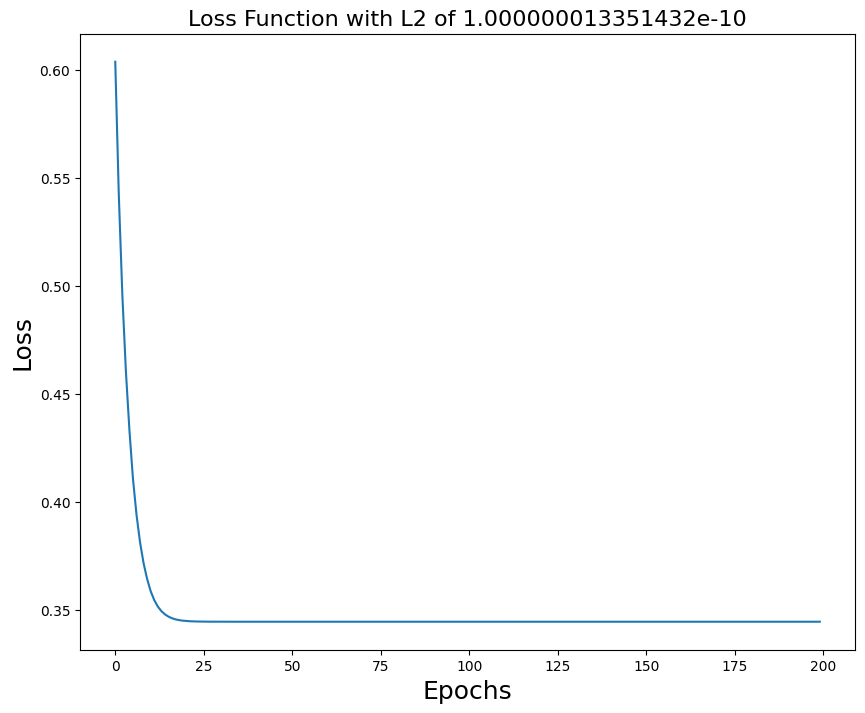

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


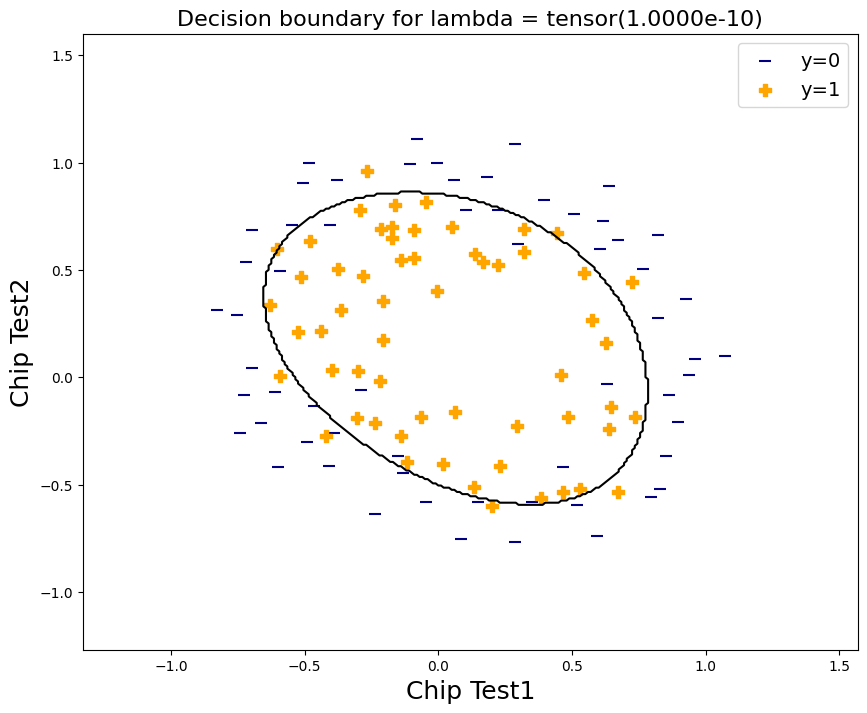

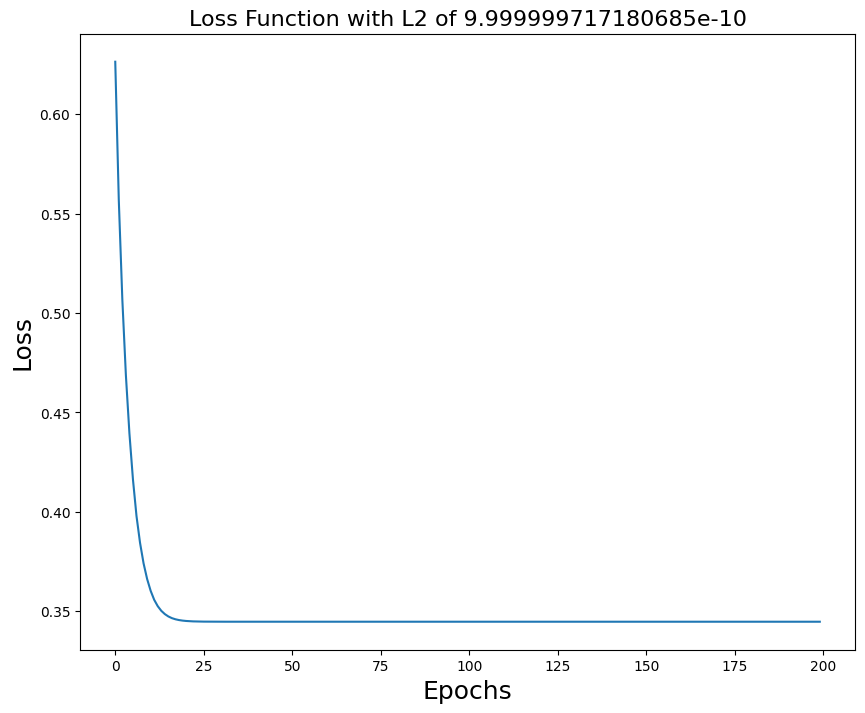

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


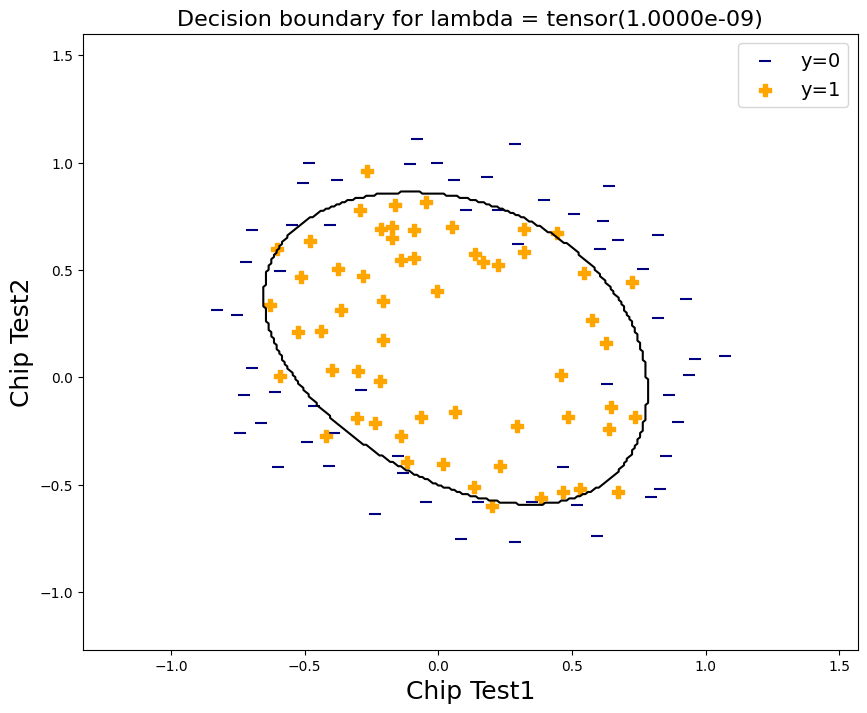

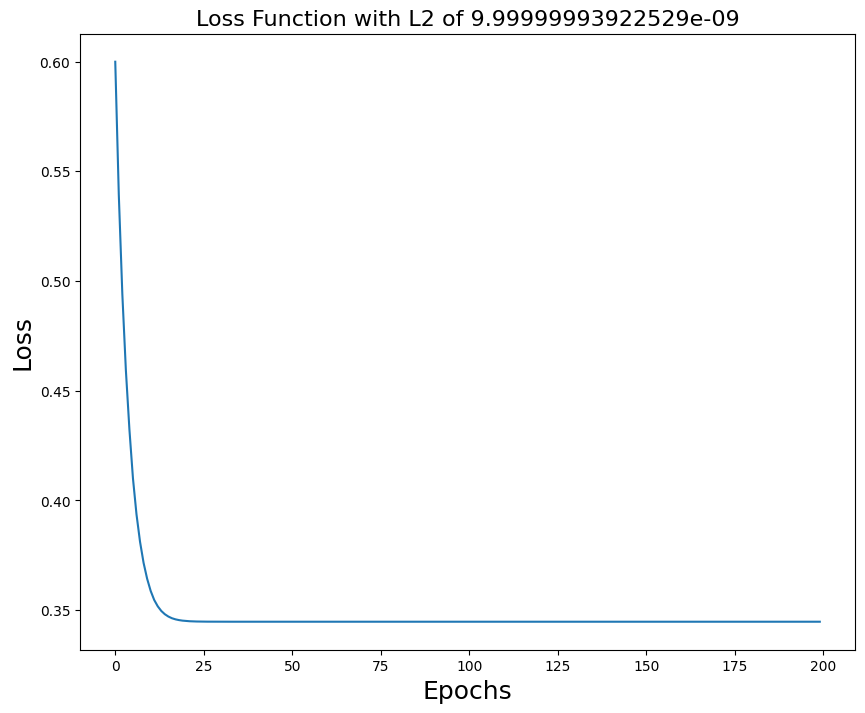

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


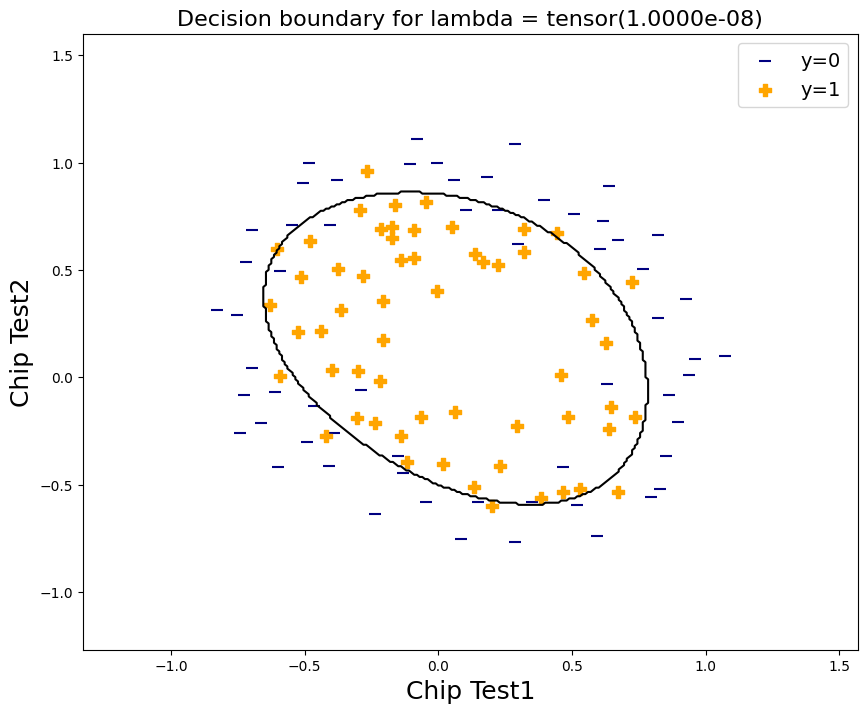

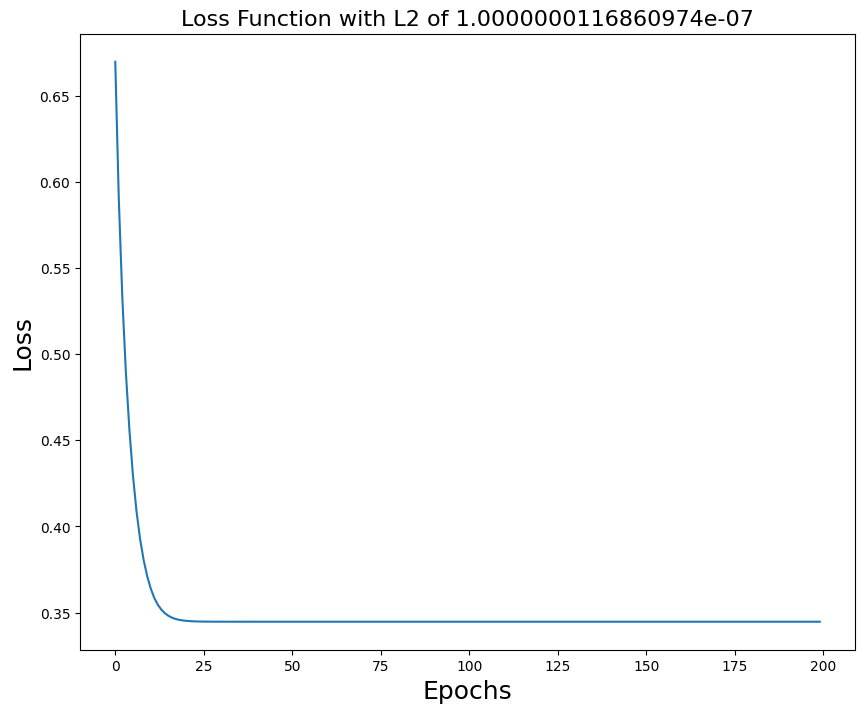

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


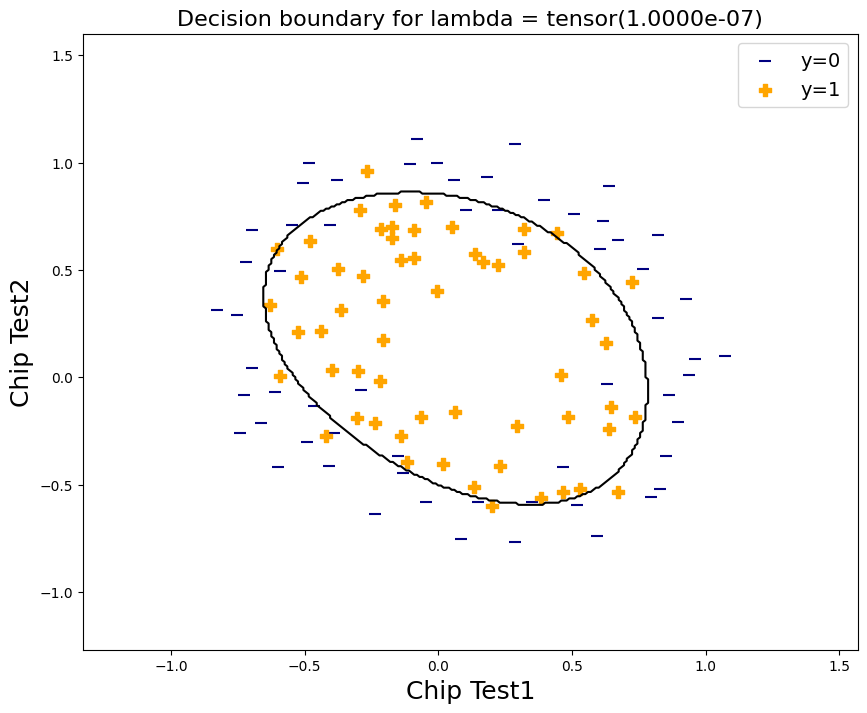

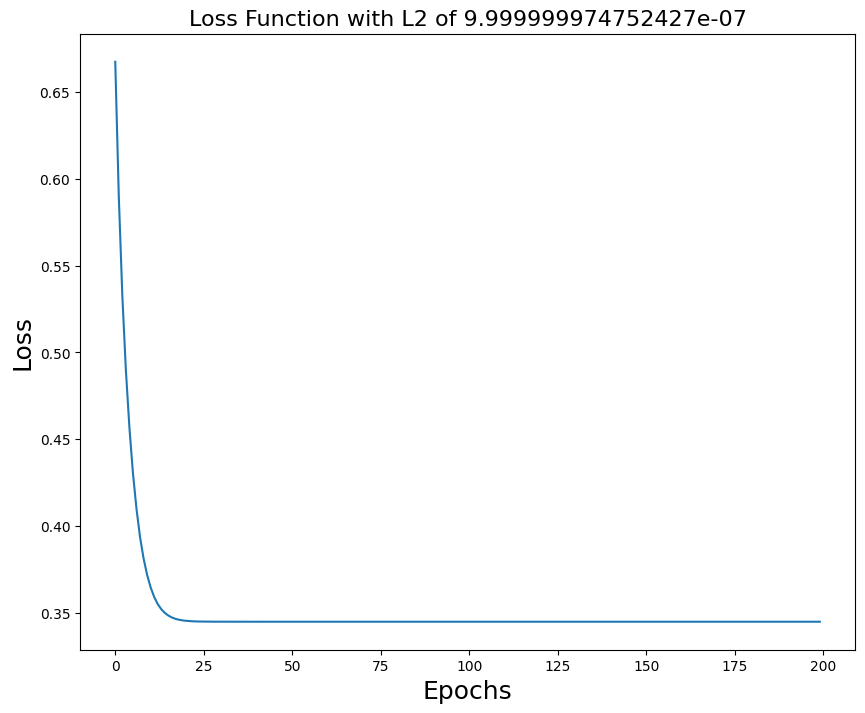

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


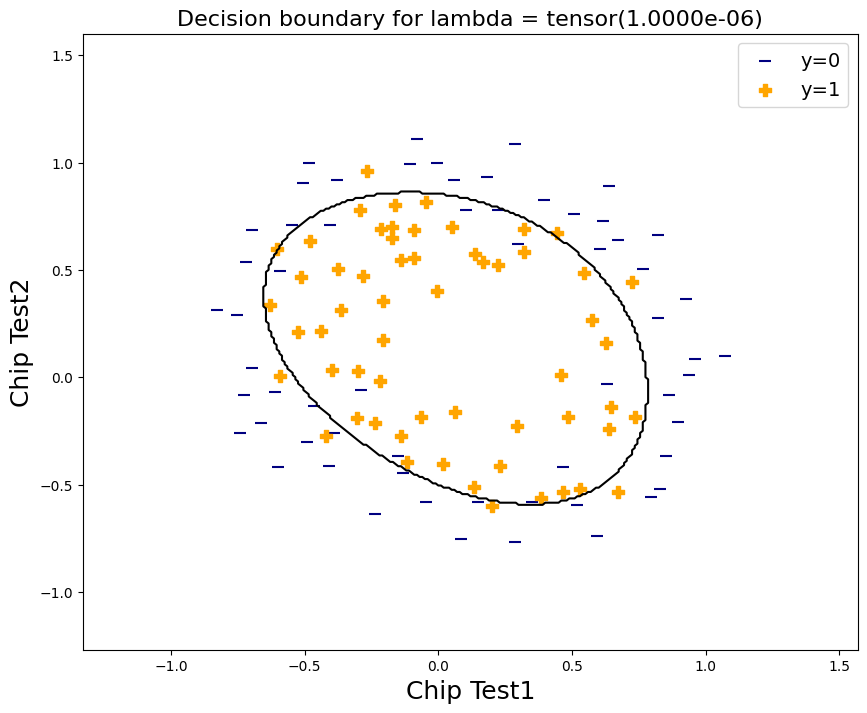

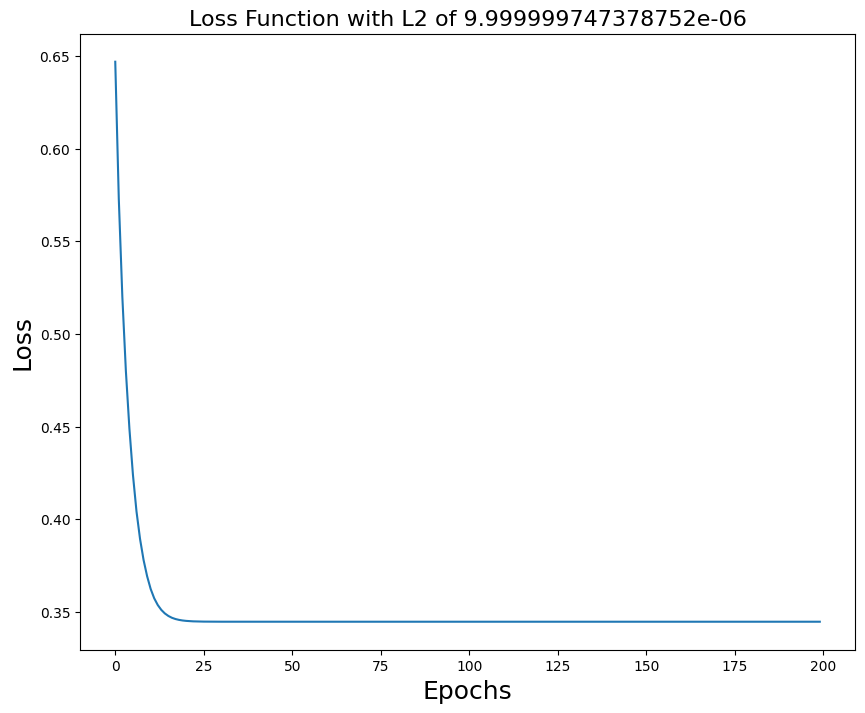

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


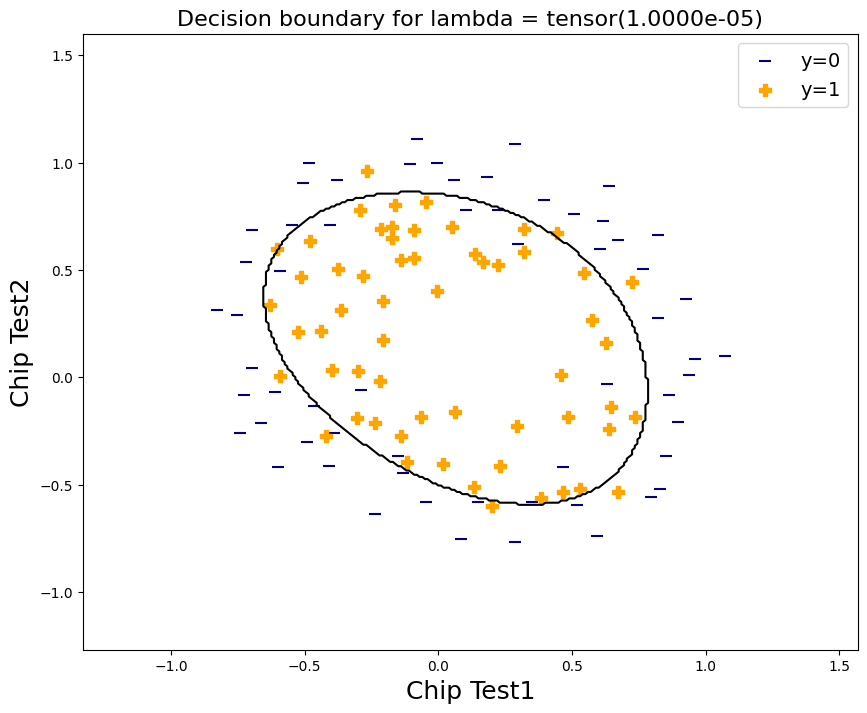

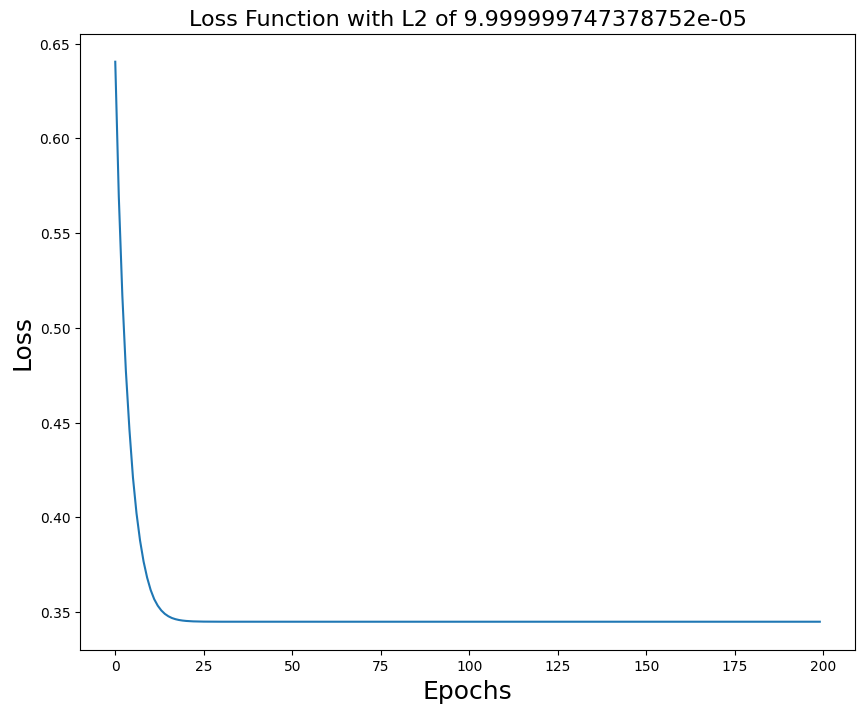

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


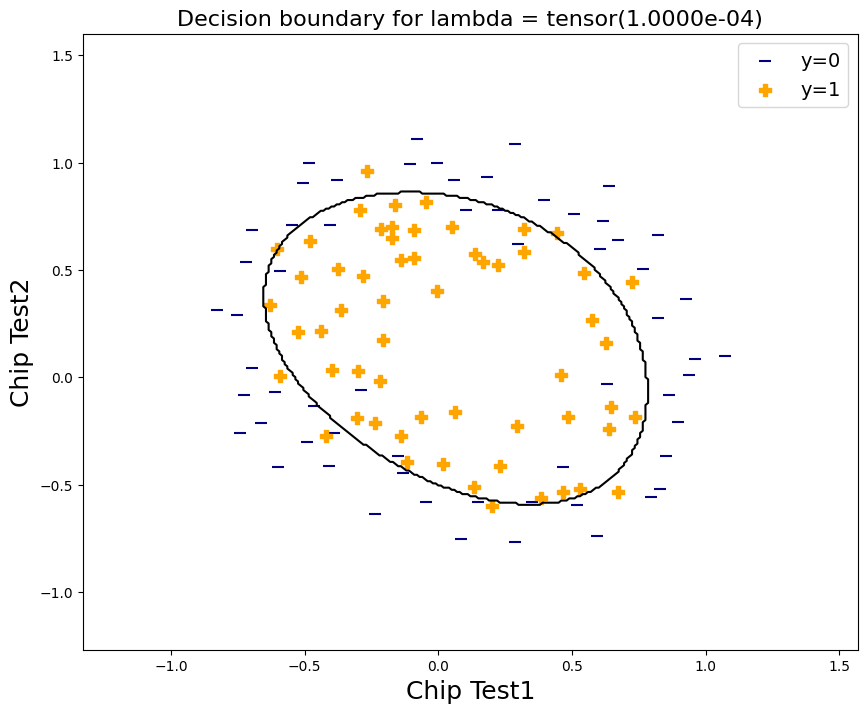

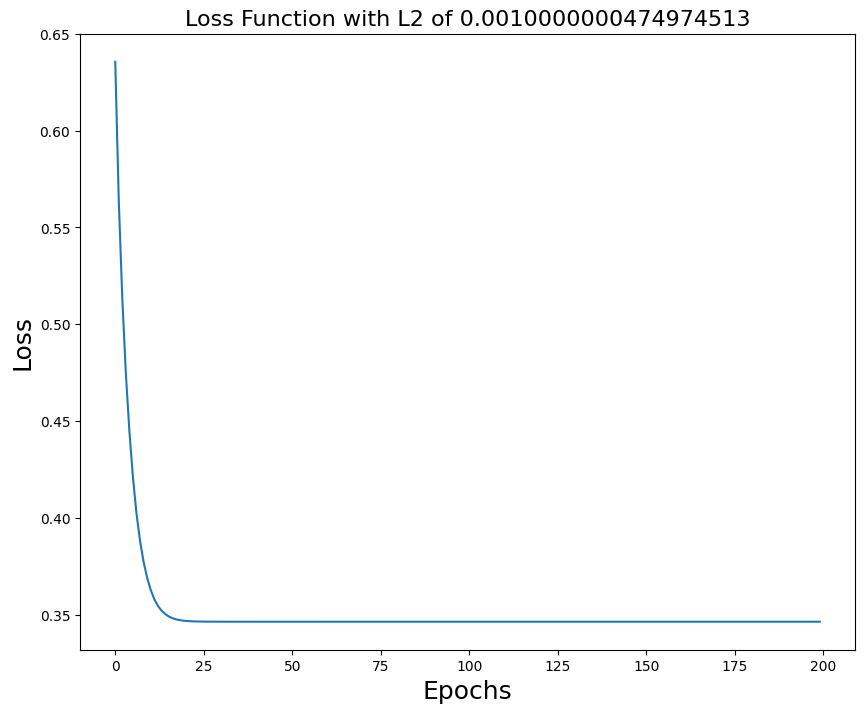

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


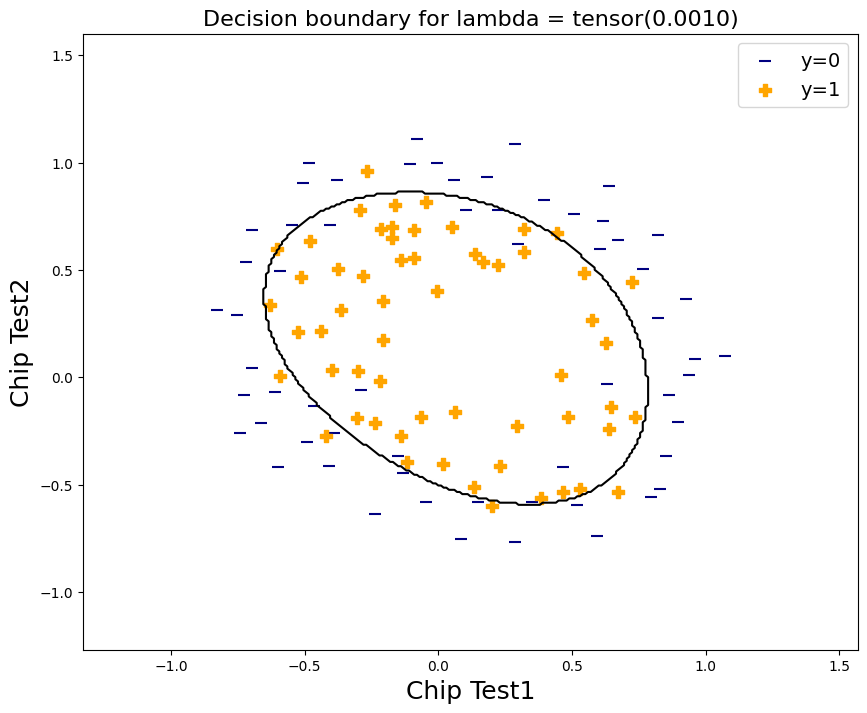

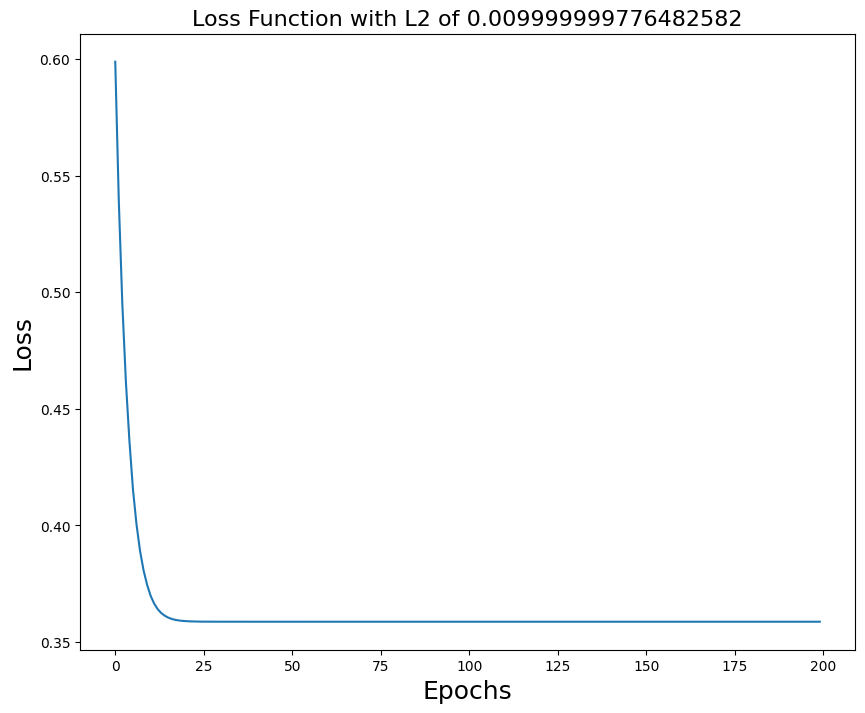

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


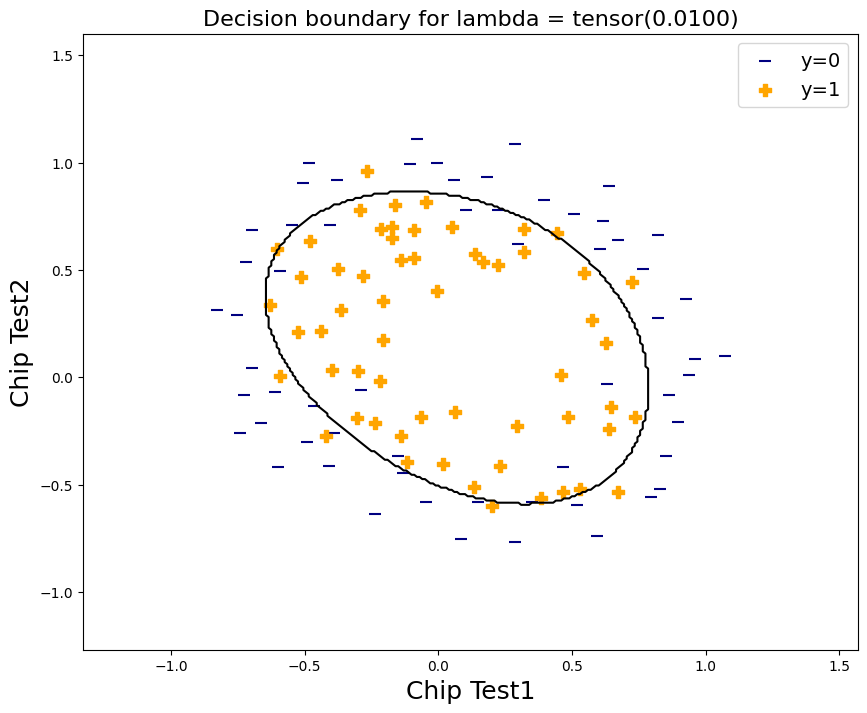

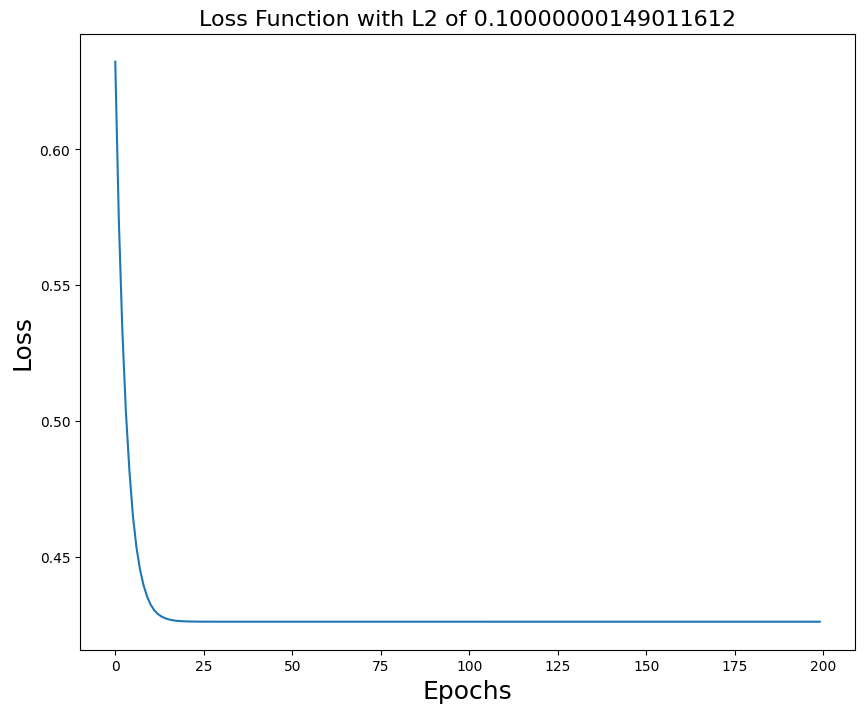

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


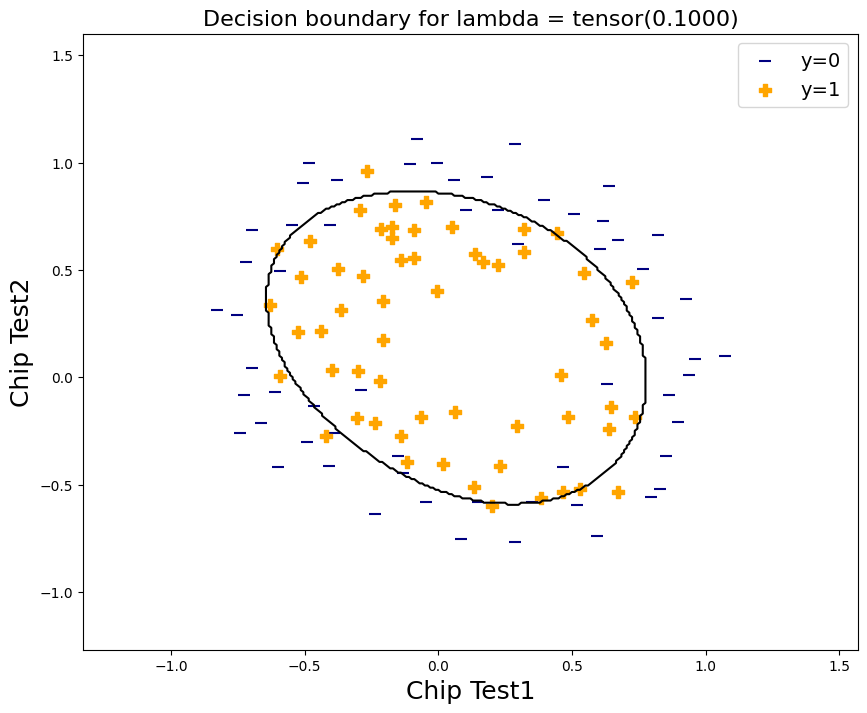

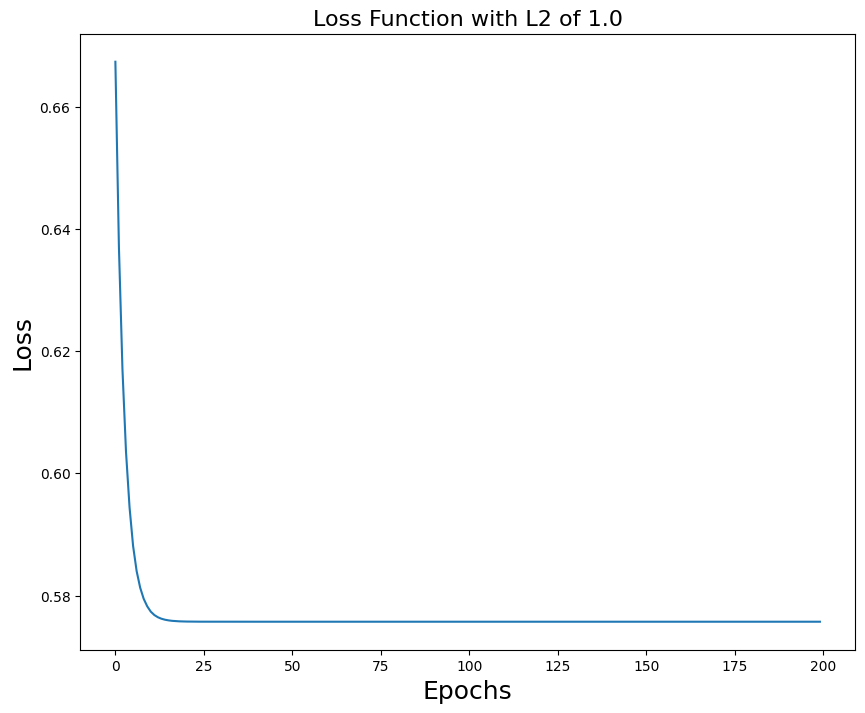

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


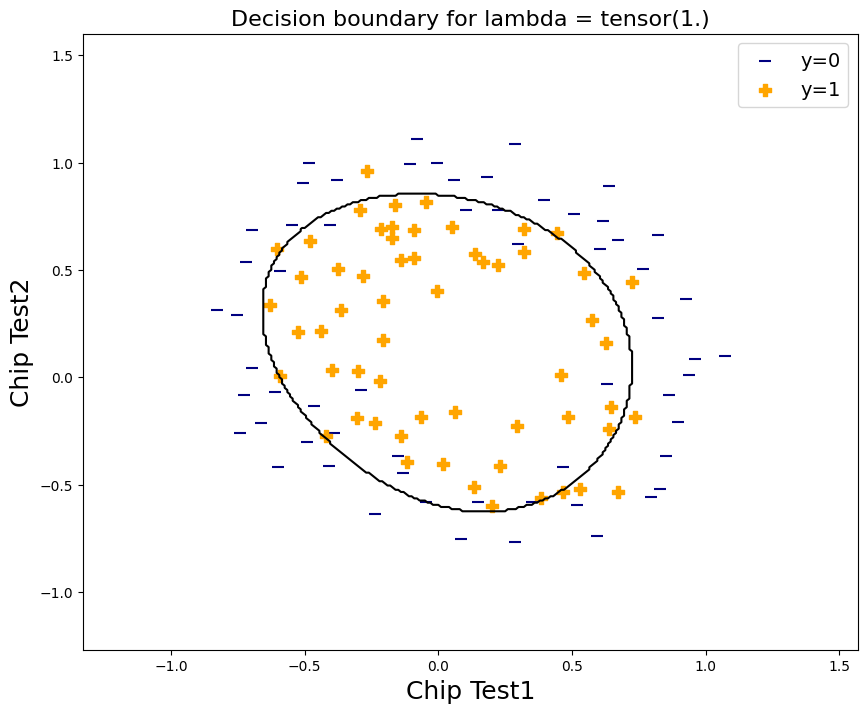

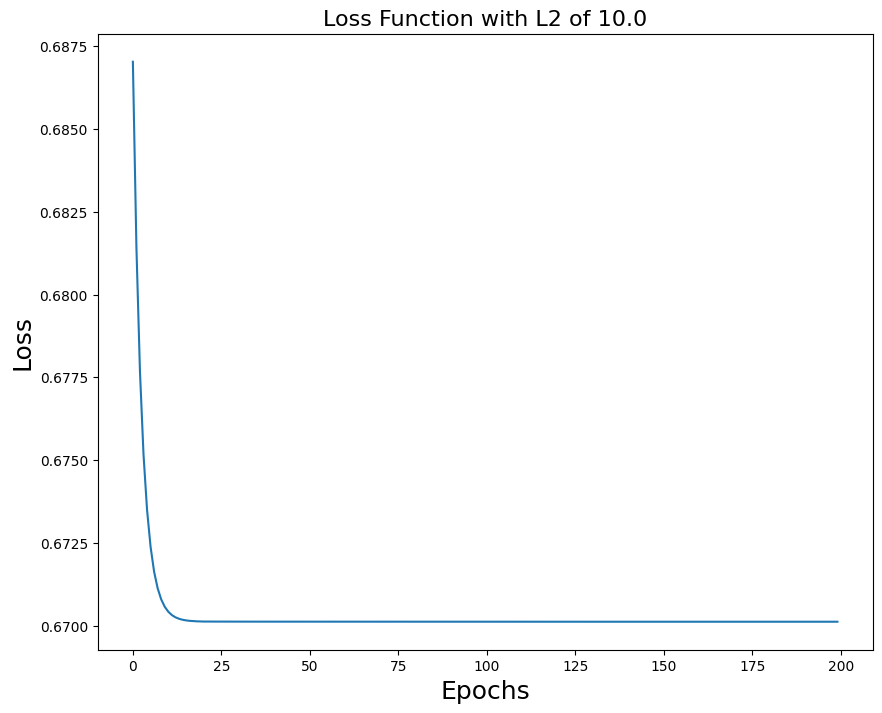

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


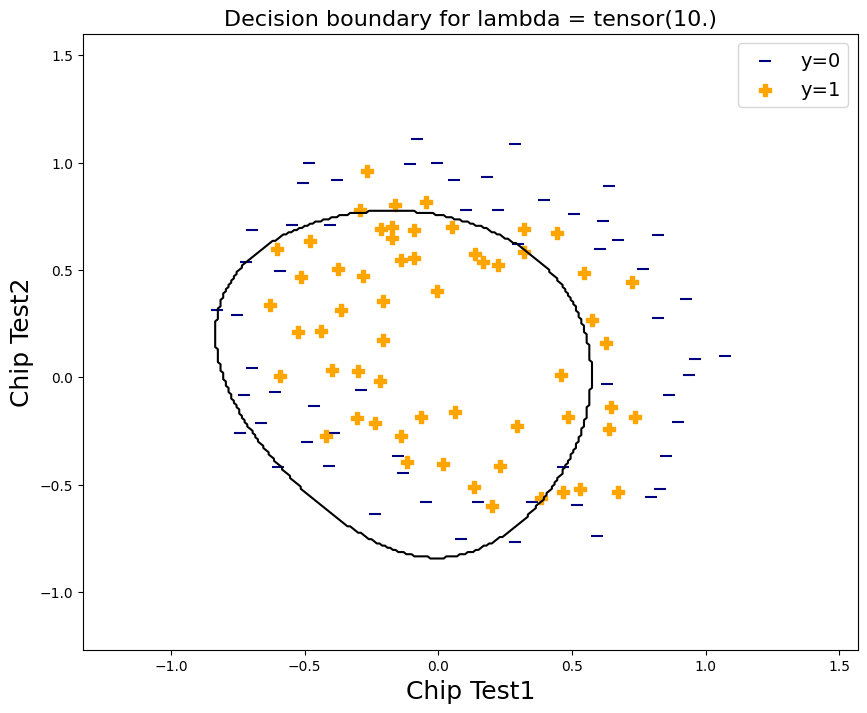

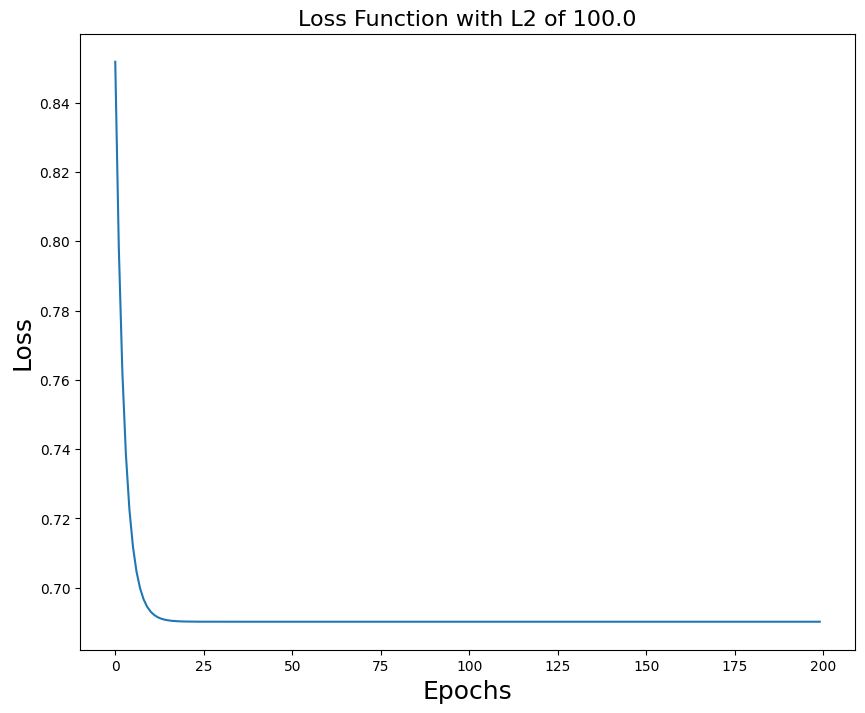

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


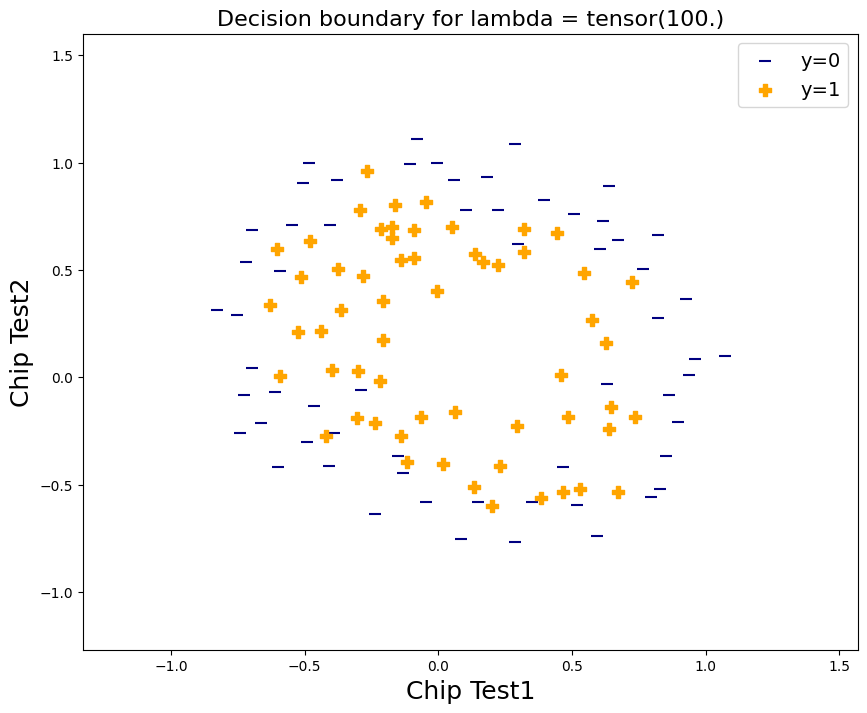

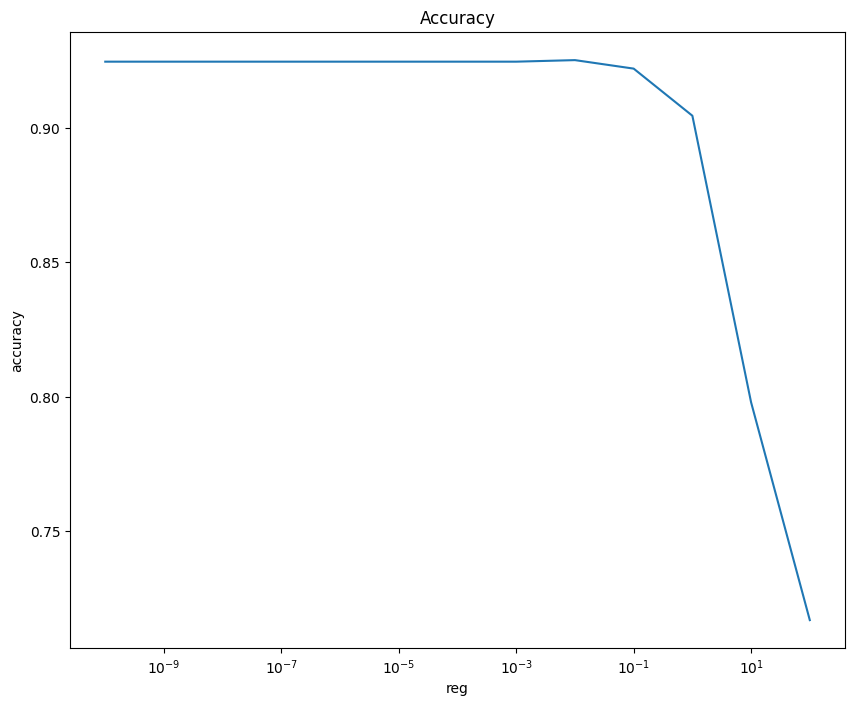

In [33]:
lr = 0.01
num_epochs = 200
num_lambdas = 10
scores = []

for reg in lambdas:
  model = L2LogisticRegression(Xpoly.shape[1], lr, reg)
  model,train_loss = train_model(model, Xpoly, y, num_epochs)
  ypred = model.predict_proba(Xpoly).detach().numpy()
  acc = sklearn.metrics.roc_auc_score(y, ypred)
  scores.append(acc)

  plt.plot(torch.arange(num_epochs),train_loss)
  plt.title("Loss Function",fontsize=16)
  plt.title(f"Loss Function with L2 of {reg}",fontsize=16)
  plt.xlabel("Epochs",fontsize=18)
  plt.ylabel("Loss",fontsize=18)
  plt.show()
  plot_decision_boundary_model_poly(X, y, model,poly, 'Chip Test1', 'Chip Test2', ['y=0','y=1'])
  plt.show()


plt.semilogx(lambdas, scores)
plt.title('Accuracy')
plt.xlabel('reg')
plt.ylabel('accuracy')
plt.show()


#### Best Model

Best L2 is:  tensor(0.0100)


/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


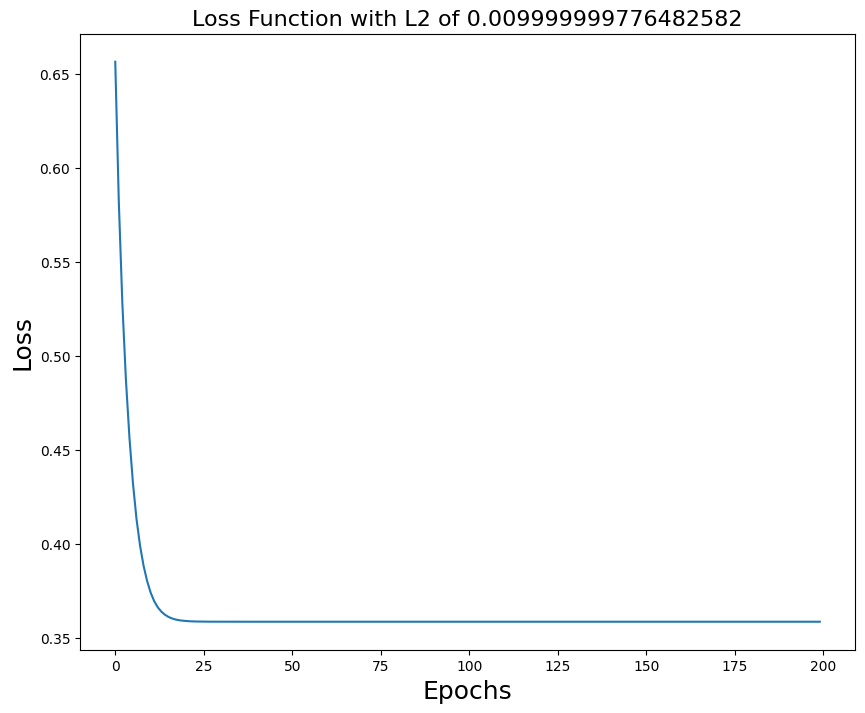

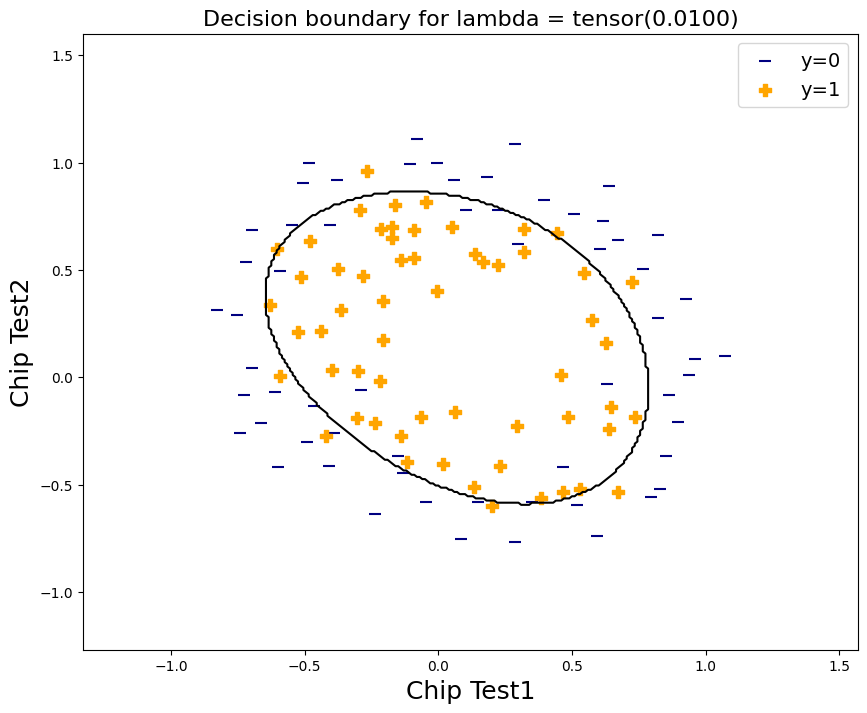

In [34]:
best_l2 = lambdas[scores.index(max(scores))]
print("Best L2 is: ", best_l2)
model = L2LogisticRegression(Xpoly.shape[1], lr, best_l2)
model,train_loss = train_model(model, Xpoly, y, num_epochs)
plt.plot(torch.arange(num_epochs), train_loss)
plt.title(f"Loss Function with L2 of {best_l2}",fontsize=16)
plt.xlabel("Epochs",fontsize=18)
plt.ylabel("Loss",fontsize=18)

plot_decision_boundary_model_poly(X,y,model,poly,'Chip Test1', 'Chip Test2',['y=0','y=1'])


### L1 Regularized with Bias Function Expansion

In [35]:
class L1LogisticRegression(nn.Module):
  """
  Logistic Regression with L1 Regularization
  """

  def __init__(self, num_features, lr, reg=0.0):
    super().__init__()
    self.net = nn.Linear(num_features, 1)
    self._lr = lr
    self._reg = reg

  def forward(self, X):
    """
    Forward Pass: Returns raw logits (before sigmoid)
    """
    return self.net(X)

  def predict_proba(self, X):
    """
    Return probability for class = 1.
    """
    return torch.sigmoid(self.forward(X))

  def predict(self, X, threshold=0.5):
    """
    Return binary prediction if proba is larger than threshold.
    """
    probs = self.predict_proba(X)
    return (probs >= threshold).long()

  def loss(self, yhat, y):
    """
    Compute BCE loss with L1 penalty.
    yhat: raw logits from forward()
    y: targets (0/1), shape (N,1) or (N,)
    """
    #Binary cross-entropy with logits
    criterion = nn.BCEWithLogitsLoss()
    base_loss = criterion(yhat, y.view(-1, 1).float())

    #L1 penalty (excluding bias trend)
    l1_penalty = sum(p.abs().sum() for name, p in self.named_parameters() if 'bias' not in name)
    return base_loss + (self._reg / len(y)) * l1_penalty

  def configure_optimizers(self):
    return torch.optim.LBFGS(self.parameters(), self._lr)

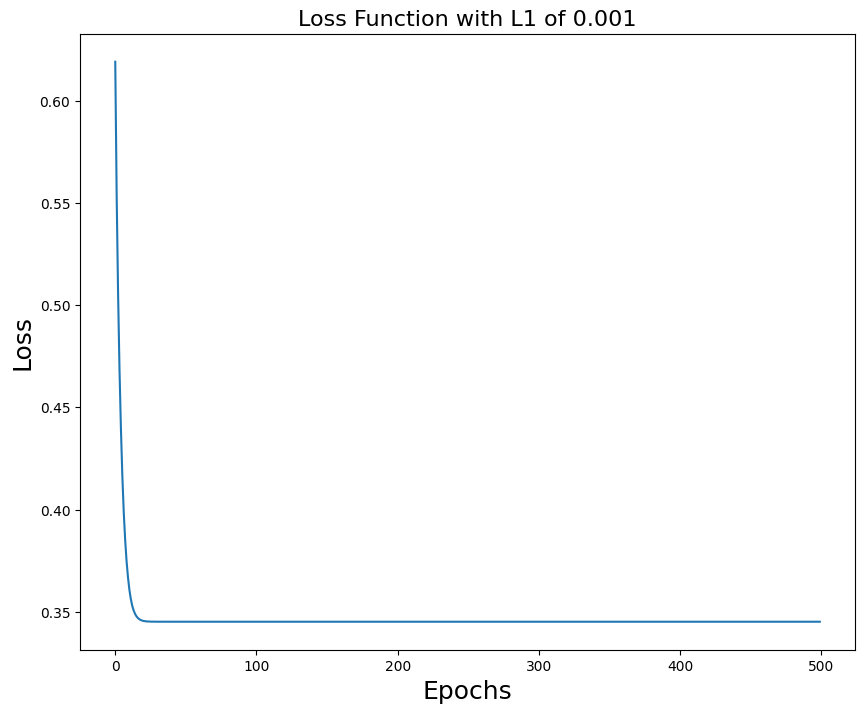

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


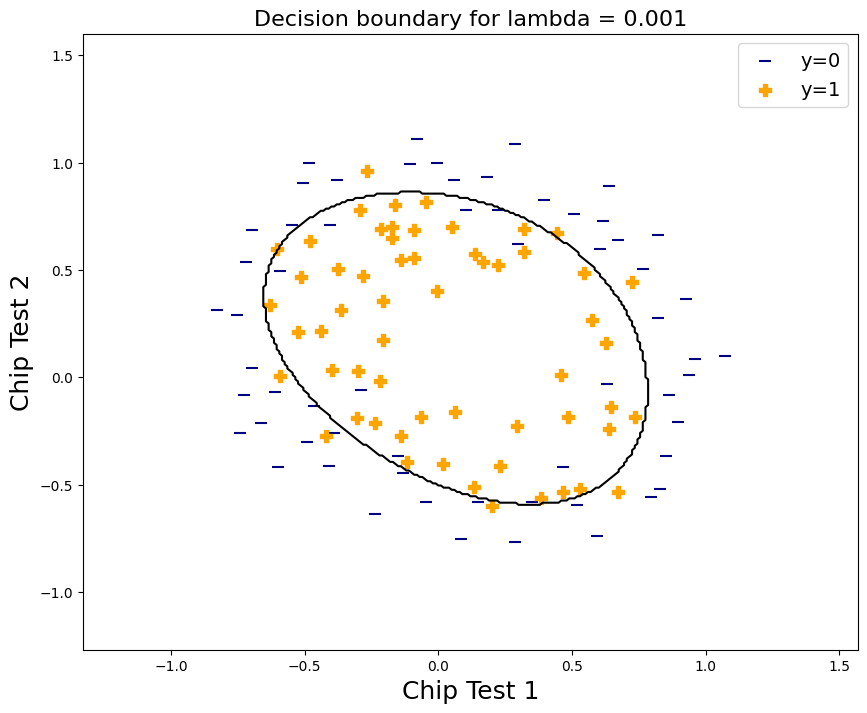

In [36]:
y = y.reshape((-1,1))

lr = 0.01
reg = 0.001
num_epochs = 500

model = L1LogisticRegression(Xpoly.shape[1],lr,reg)
model,train_loss = train_model(model,Xpoly,y,num_epochs)
plt.plot(torch.arange(num_epochs),train_loss)
plt.title(f"Loss Function with L1 of {reg}",fontsize=16)
plt.xlabel("Epochs",fontsize=18)
plt.ylabel("Loss",fontsize=18)
plt.show()
plot_decision_boundary_model_poly(X, y, model, poly,'Chip Test 1', 'Chip Test 2', ['y=0','y=1'])
plt.show()

#### Experimenting with the regularization lambda (wd)

In [37]:
num_lambdas = 6
lambdas = torch.logspace(-3, 2, num_lambdas)
print(lambdas)

tensor([1.0000e-03, 1.0000e-02, 1.0000e-01, 1.0000e+00, 1.0000e+01, 1.0000e+02])


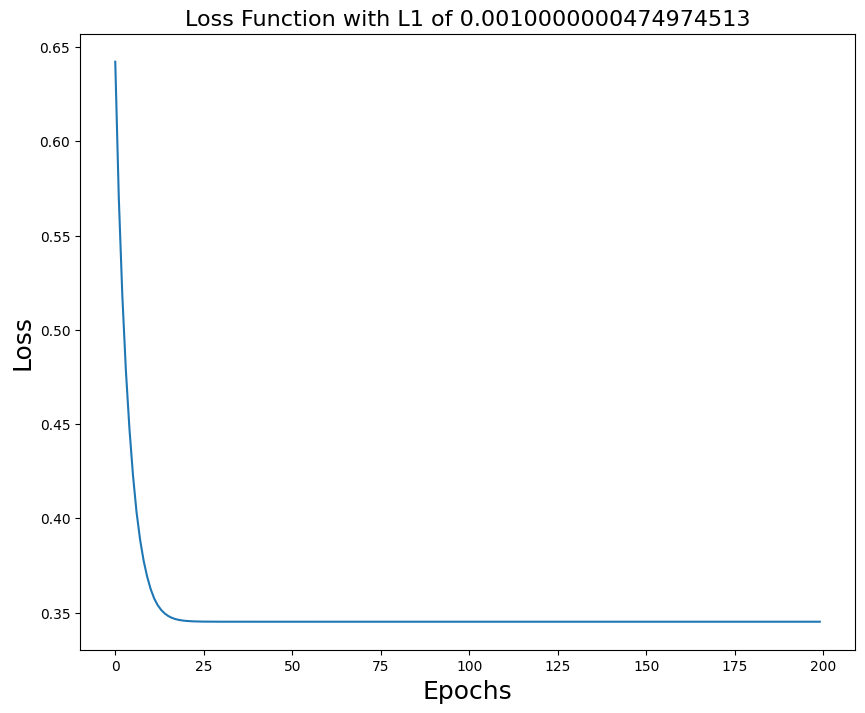

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


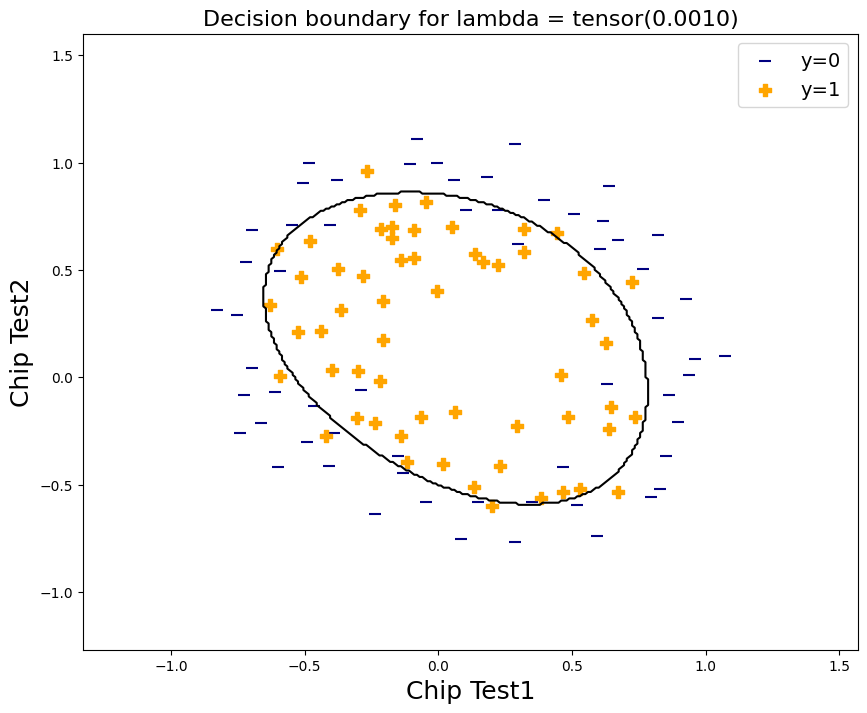

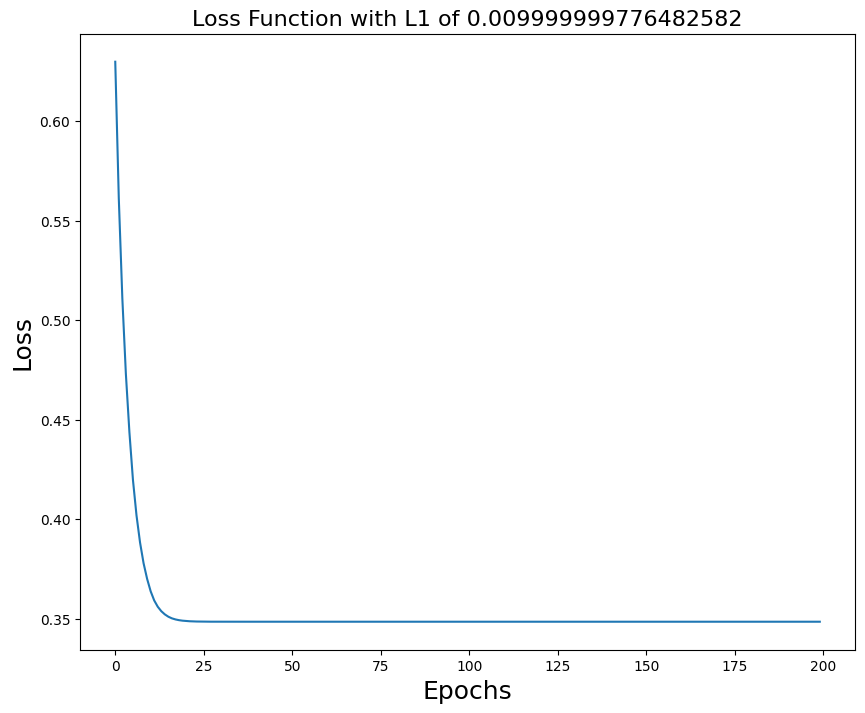

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


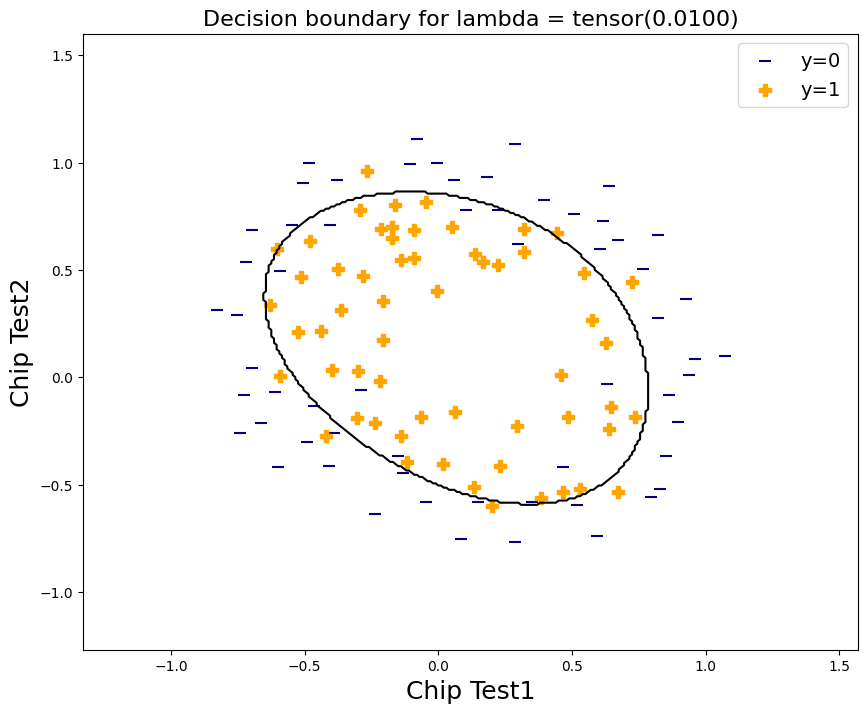

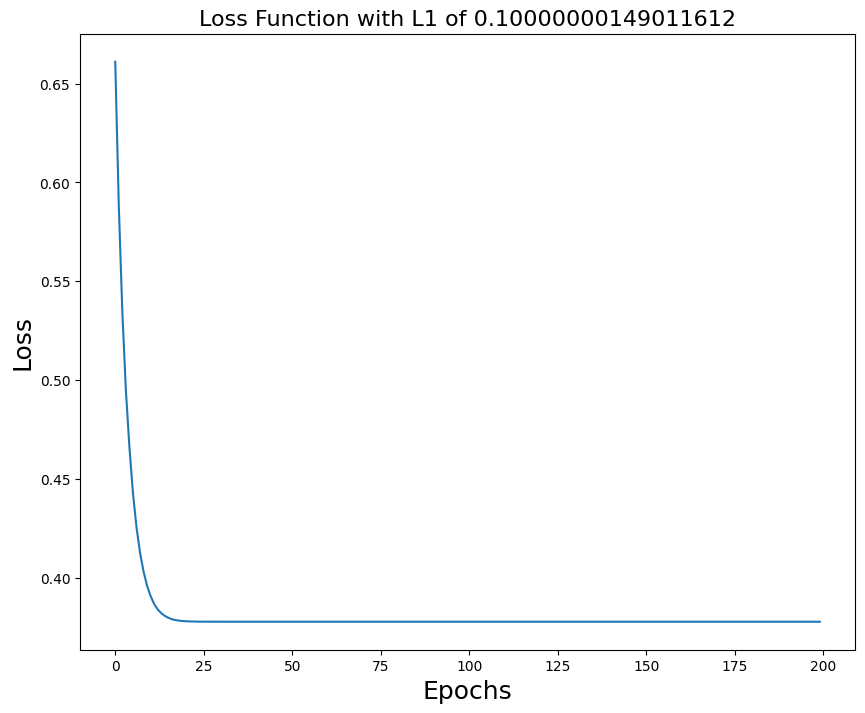

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


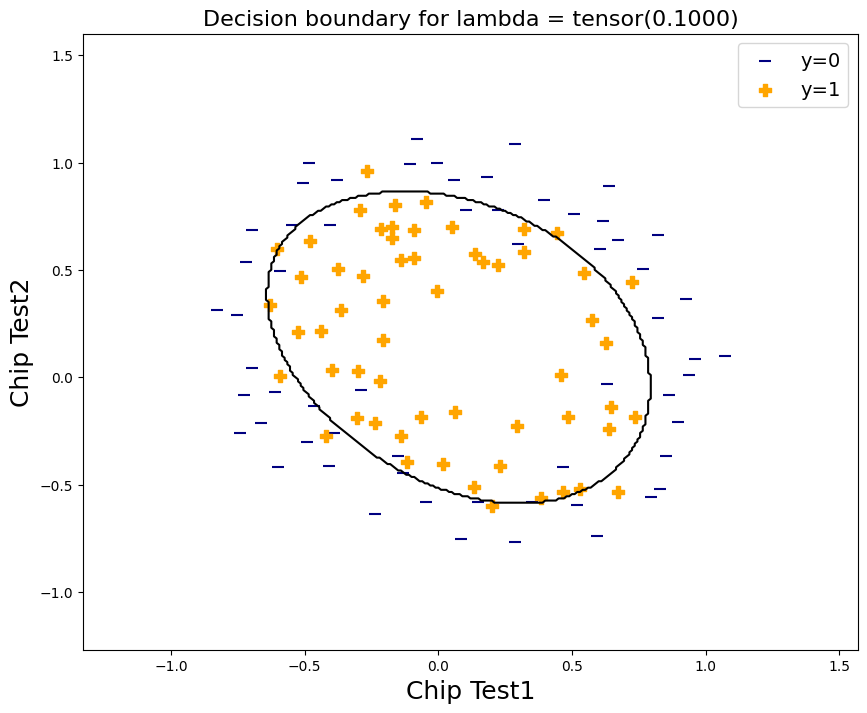

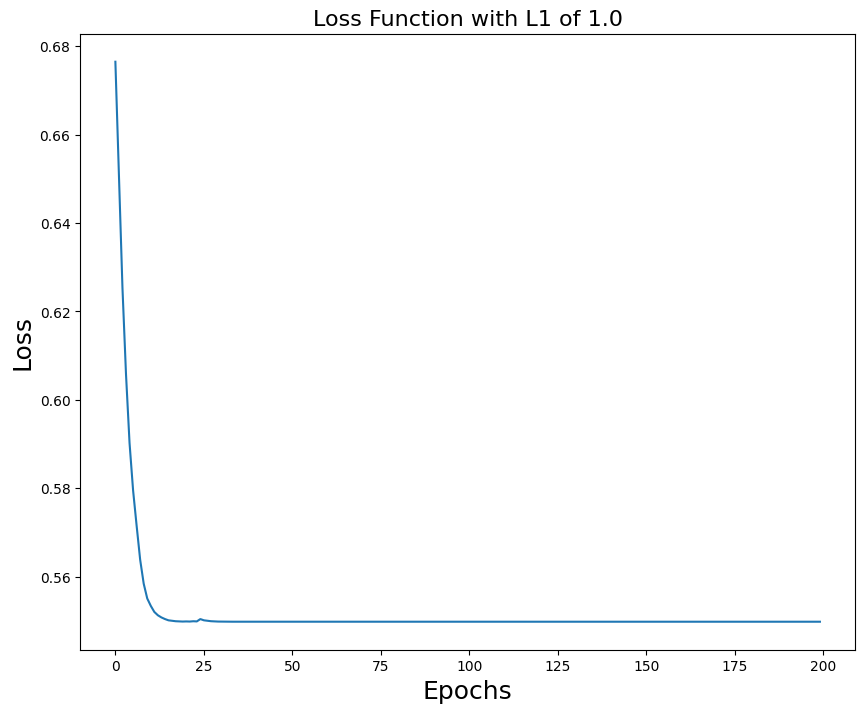

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


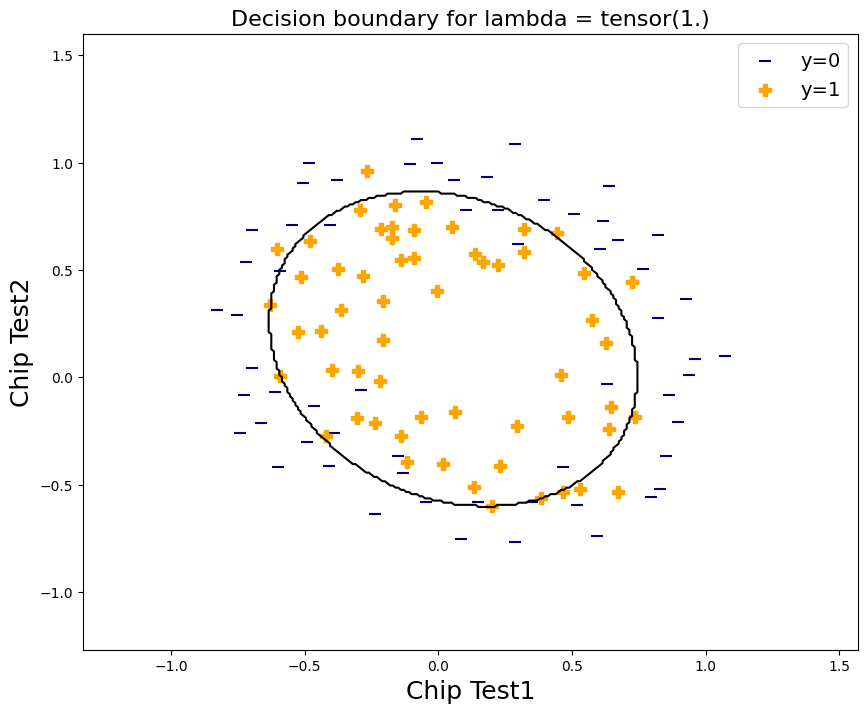

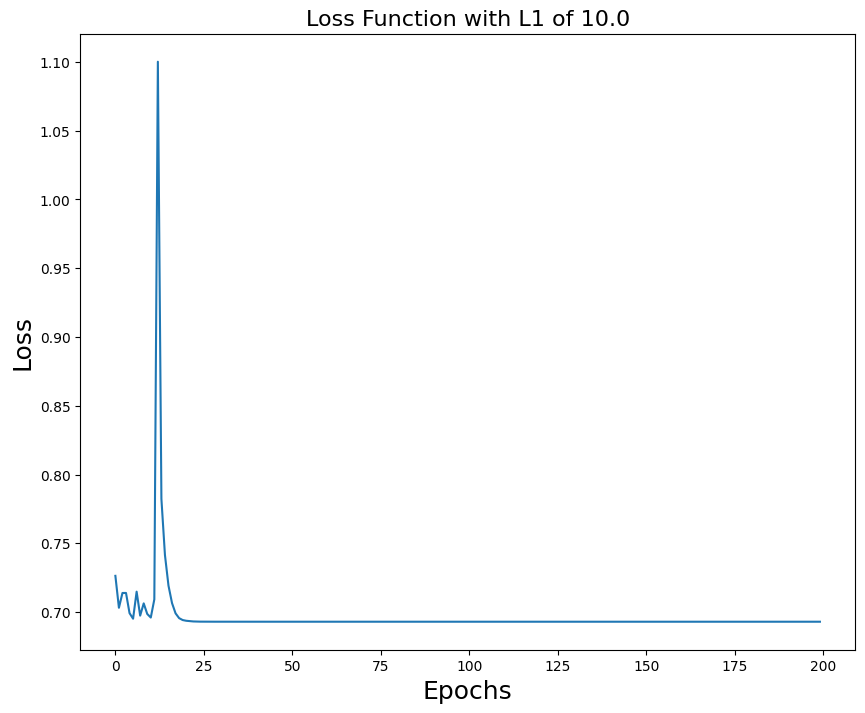

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


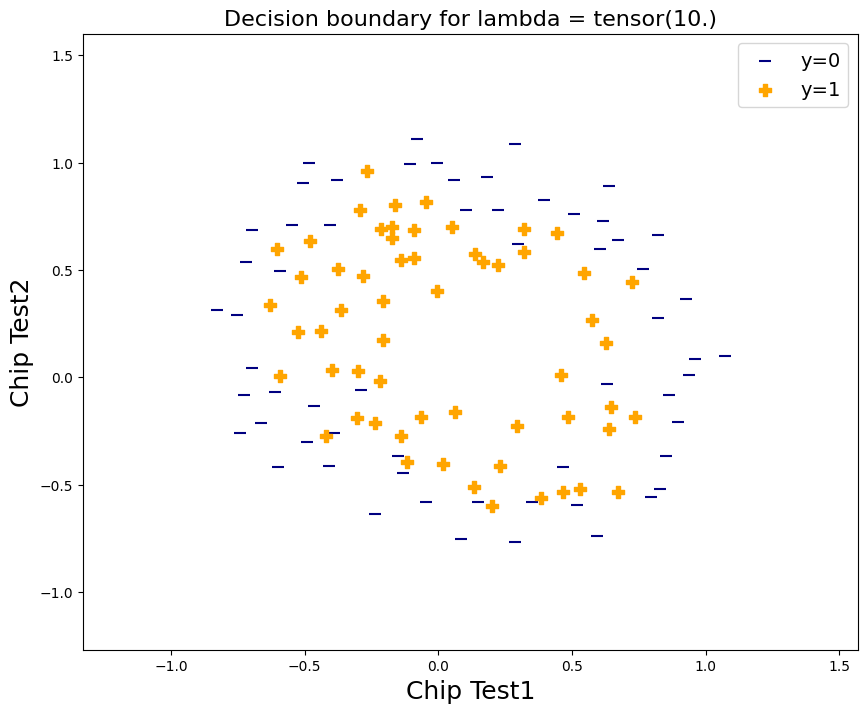

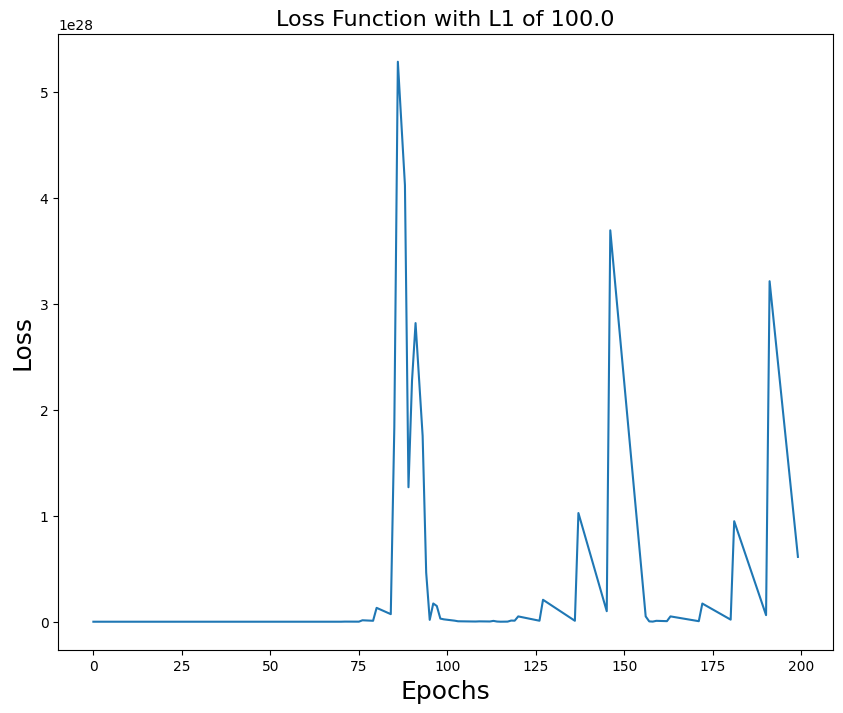

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


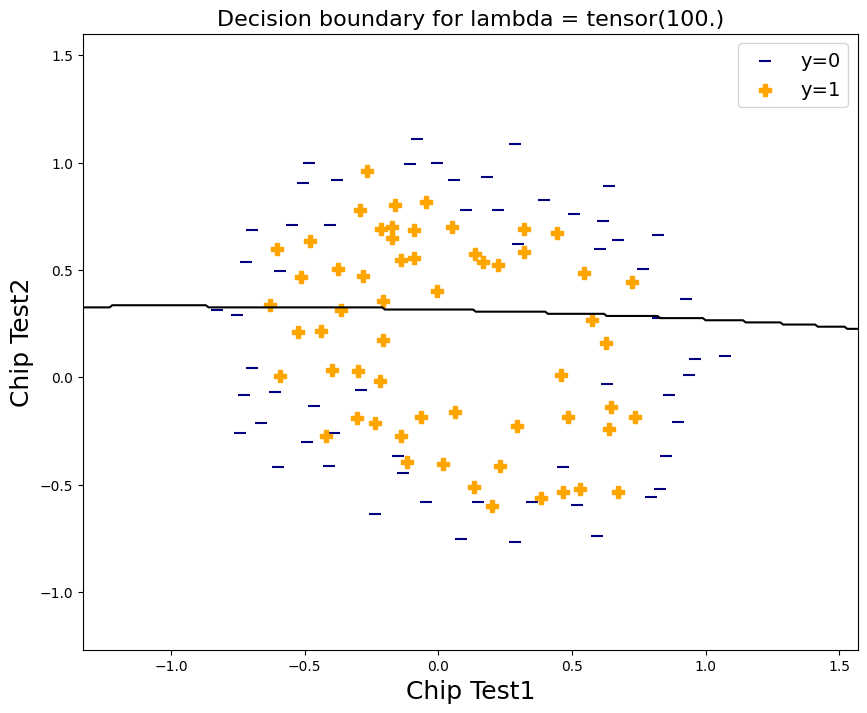

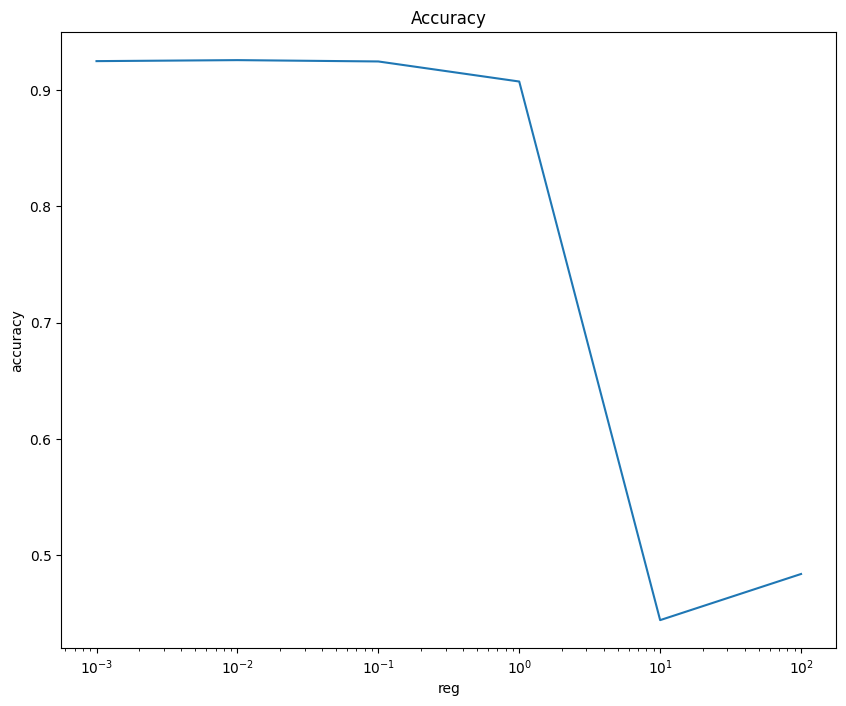

In [38]:
lr = 0.01
num_epochs = 200
scores = []

for reg in lambdas:
  model = L1LogisticRegression(Xpoly.shape[1], lr, reg)
  model,train_loss = train_model(model, Xpoly, y, num_epochs)
  ypred = model.predict_proba(Xpoly).detach().numpy()
  acc = sklearn.metrics.roc_auc_score(y, ypred)
  scores.append(acc)

  plt.plot(torch.arange(num_epochs),train_loss)
  plt.title(f"Loss Function with L1 of {reg}",fontsize=16)
  plt.xlabel("Epochs",fontsize=18)
  plt.ylabel("Loss",fontsize=18)
  plt.show()
  plot_decision_boundary_model_poly(X, y, model,poly, 'Chip Test1', 'Chip Test2', ['y=0','y=1'])
  plt.show()

plt.semilogx(lambdas, scores)
plt.title('Accuracy')
plt.xlabel('reg')
plt.ylabel('accuracy')
plt.show()

#### Best Model

Best L1 is:  tensor(0.0100)


/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


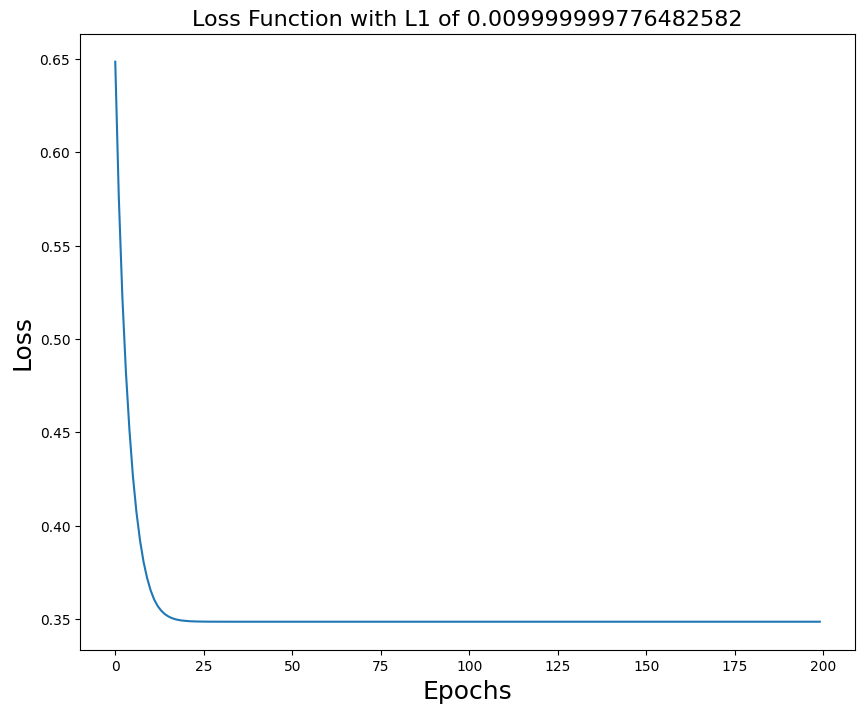

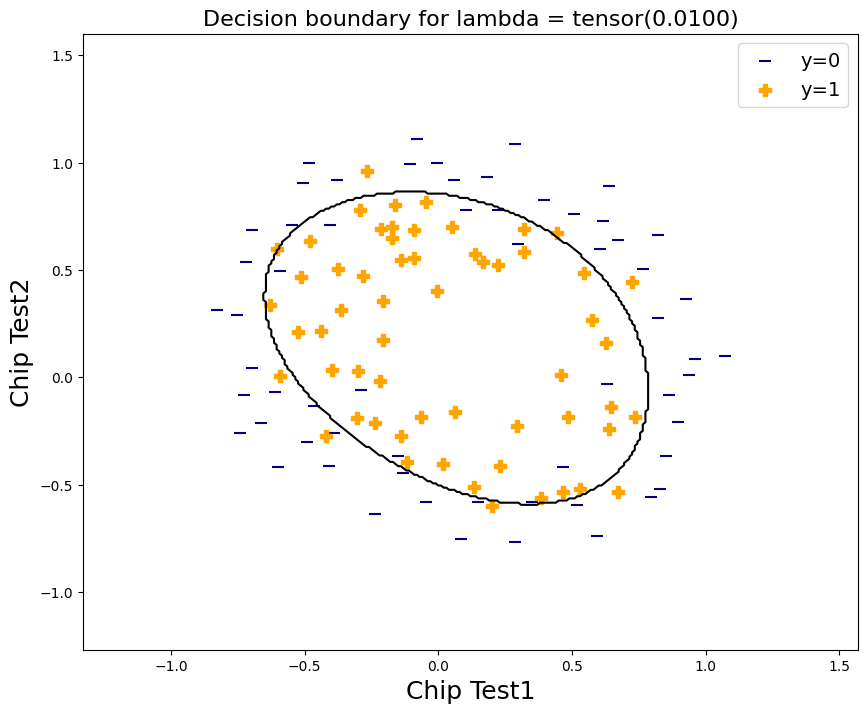

In [39]:
best_l1 = lambdas[scores.index(max(scores))]
print("Best L1 is: ", best_l1)
model = L1LogisticRegression(Xpoly.shape[1], lr, best_l1)
model,train_loss = train_model(model, Xpoly, y, num_epochs)
plt.plot(torch.arange(num_epochs), train_loss)
plt.title(f"Loss Function with L1 of {best_l1}",fontsize=16)
plt.xlabel("Epochs",fontsize=18)
plt.ylabel("Loss",fontsize=18)

plot_decision_boundary_model_poly(X,y,model,poly,'Chip Test1', 'Chip Test2',['y=0','y=1'])


### L1 + L2 Regularized with Bias Function Expansion

In [40]:
class ElasticNetLogisticRegression(nn.Module):
  """
  Logistic Regression with L1 and L2 Regularization
  """
  def __init__(self, num_features, lr, reg=0.0, l1_ratio=0.5):
    super().__init__()
    self.net = nn.Linear(num_features, 1)
    self._lr = lr
    self._reg = reg
    self._l1_ratio = l1_ratio

  def forward(self, X):
    """
    Forward Pass: Returns raw logits (before sigmoid)
    """
    return self.net(X)

  def predict_proba(self, X):
    """
    Return probability for class = 1.
    """
    return torch.sigmoid(self.forward(X))

  def predict(self, X, threshold=0.5):
    """
    Return binary prediction if proba is larger than threshold.
    """
    probs = self.predict_proba(X)
    return (probs >= threshold).long()

  def loss(self, yhat, y):
    """
    Compute BCE loss with Elastic Net penalty.
    yhat: raw logits from forward()
    y: targets (0/1), shape (N,1) or (N,)
    """
    criterion = nn.BCEWithLogitsLoss()
    base_loss = criterion(yhat, y.view(-1, 1).float())

    #L1
    l1_penalty = sum(p.abs().sum() for name, p in self.named_parameters() if 'bias' not in name)

    #L2
    l2_penalty = sum(torch.norm(p, 2).pow(2) for name, p in self.named_parameters() if 'bias' not in name)

    elastic_penalty = self._l1_ratio * l1_penalty + (1 - self._l1_ratio) * l2_penalty
    return base_loss + self._reg * elastic_penalty

  def configure_optimizers(self):
    return torch.optim.LBFGS(self.parameters(), self._lr)


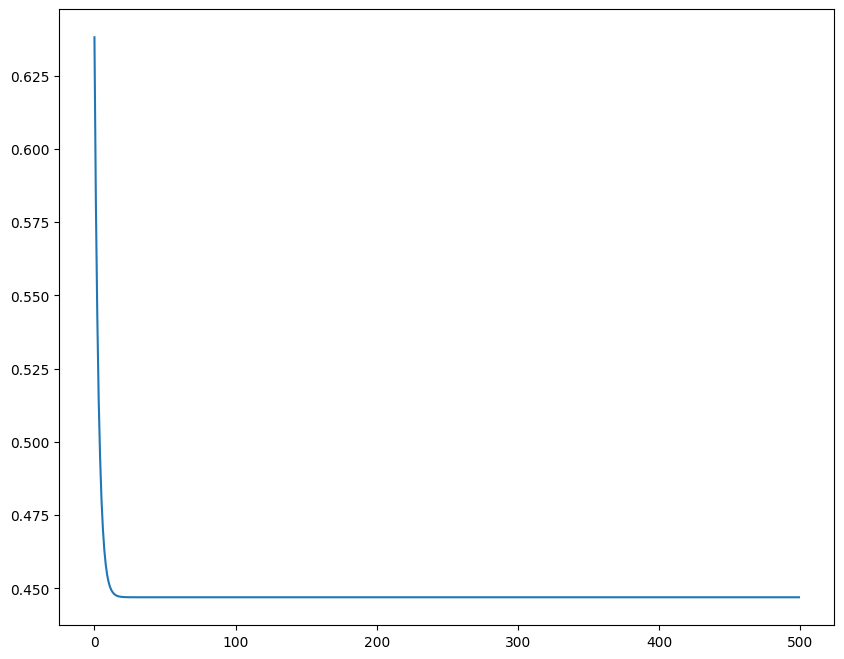

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


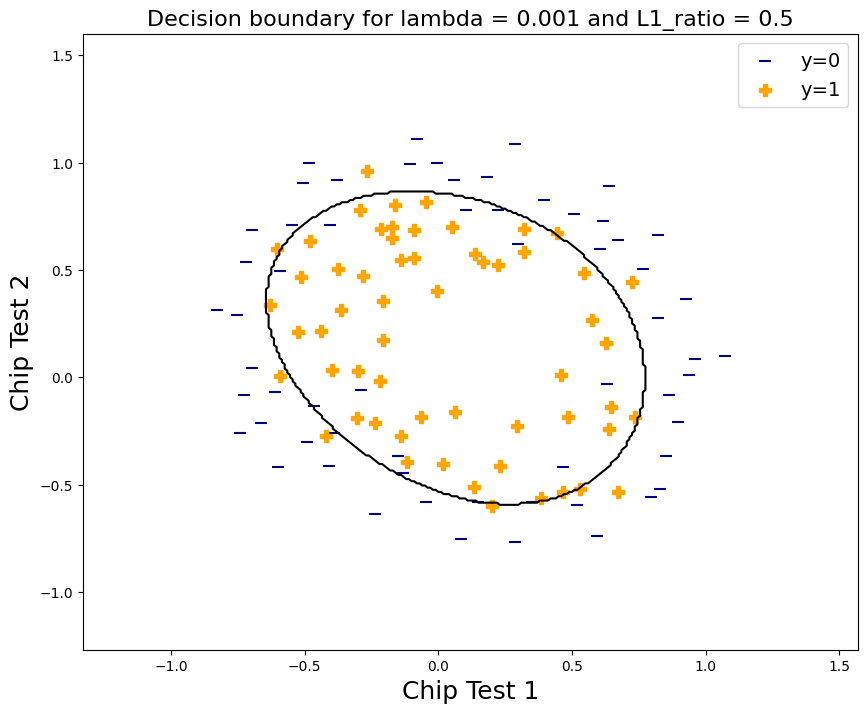

In [41]:
y = y.reshape((-1,1))

lr = 0.01
l1_ratio = 0.5
reg = 0.001
num_epochs = 500

model = ElasticNetLogisticRegression(Xpoly.shape[1], lr, reg, l1_ratio)
model,train_loss = train_model(model, Xpoly, y, num_epochs)
plt.plot(torch.arange(num_epochs),train_loss)
plt.show()
plot_decision_boundary_model_poly(X, y, model, poly,'Chip Test 1', 'Chip Test 2', ['y=0','y=1'], l1_ratio=l1_ratio)
plt.show()

#### Experimenting with the regularization lambda (wd) and L1 ratios

In [42]:
num_lambdas = 3
lambdas = torch.logspace(-3, -1, num_lambdas)
print(lambdas)
l1_ratios = [0.25, 0.5, 0.75]

tensor([0.0010, 0.0100, 0.1000])


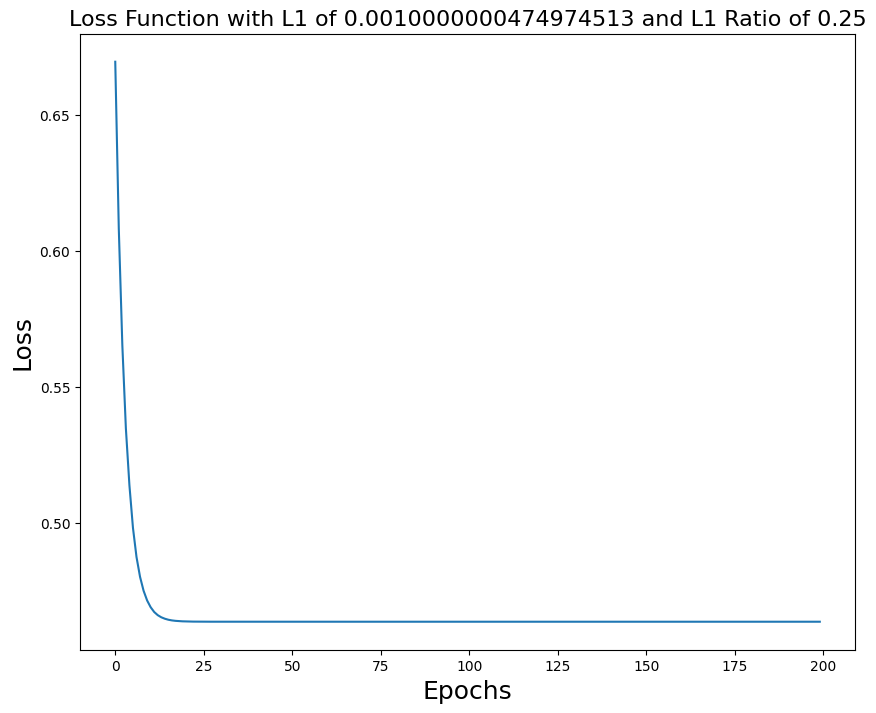

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


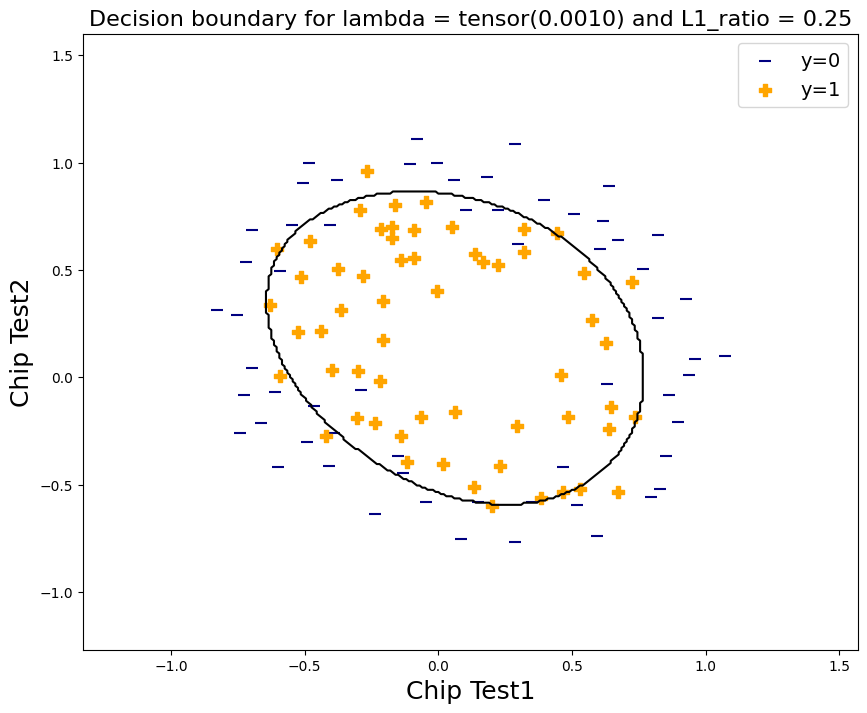

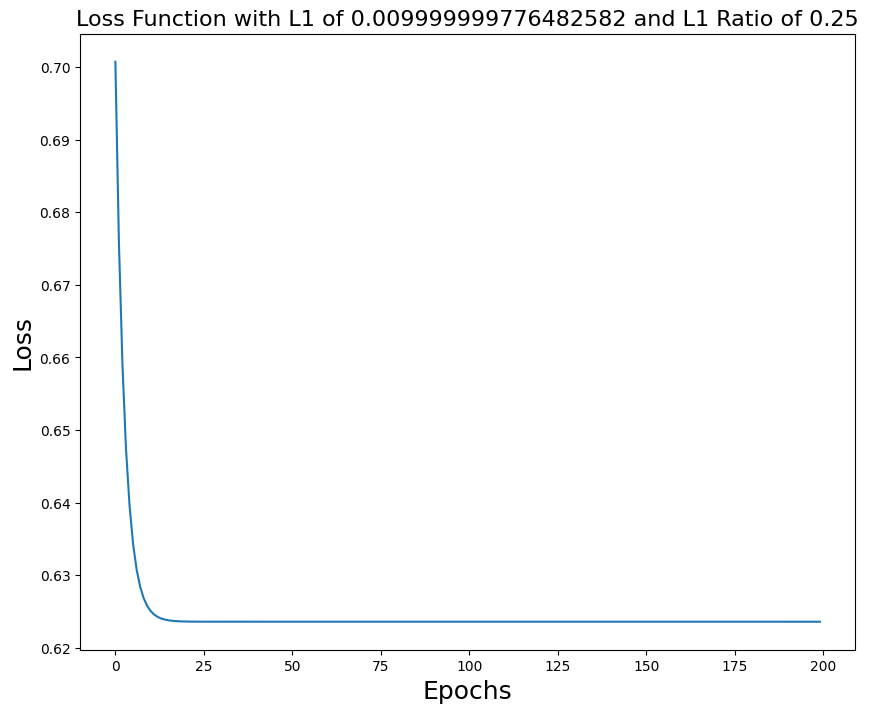

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


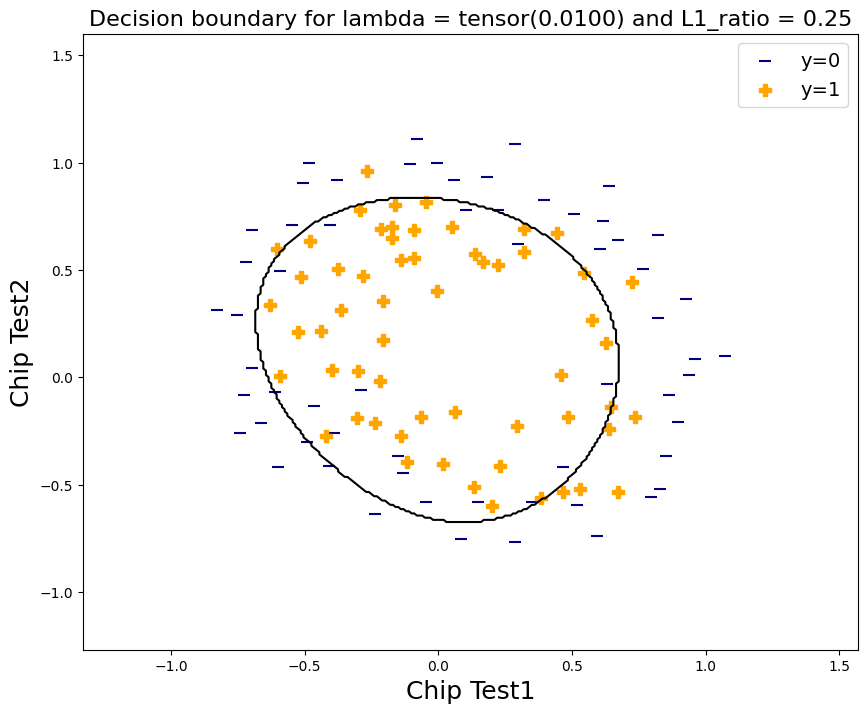

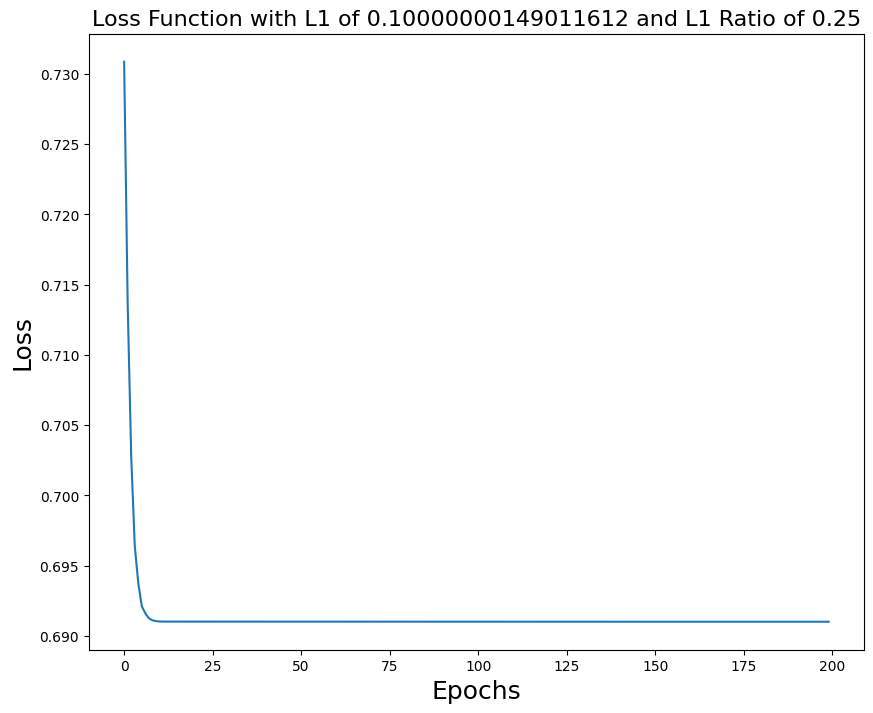

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


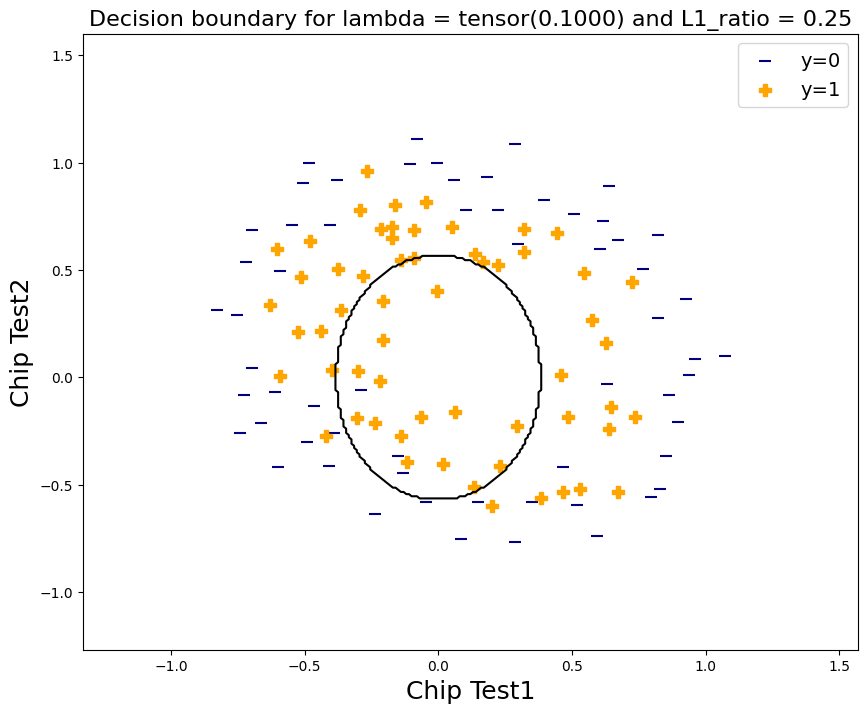

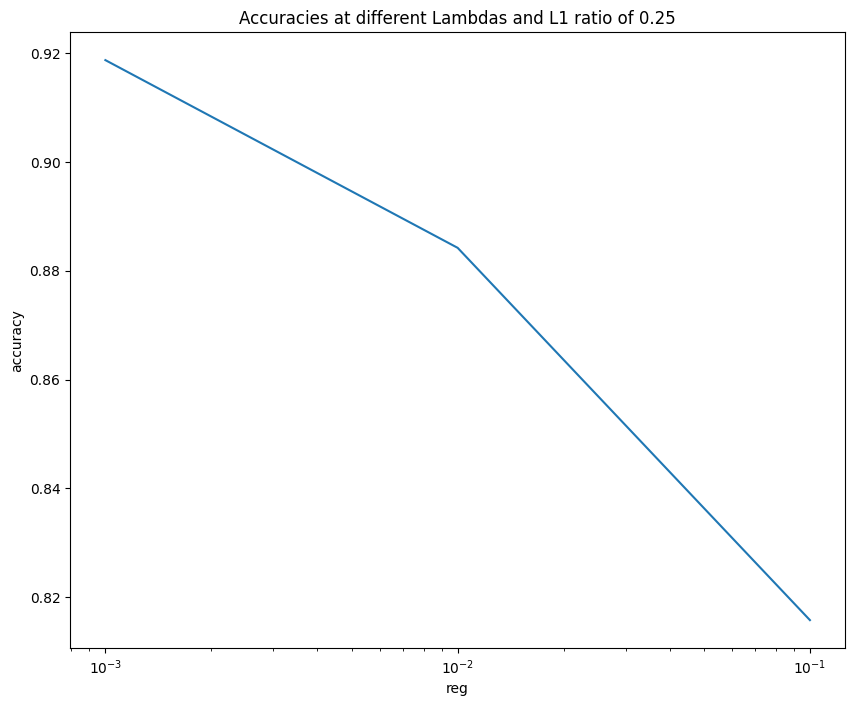

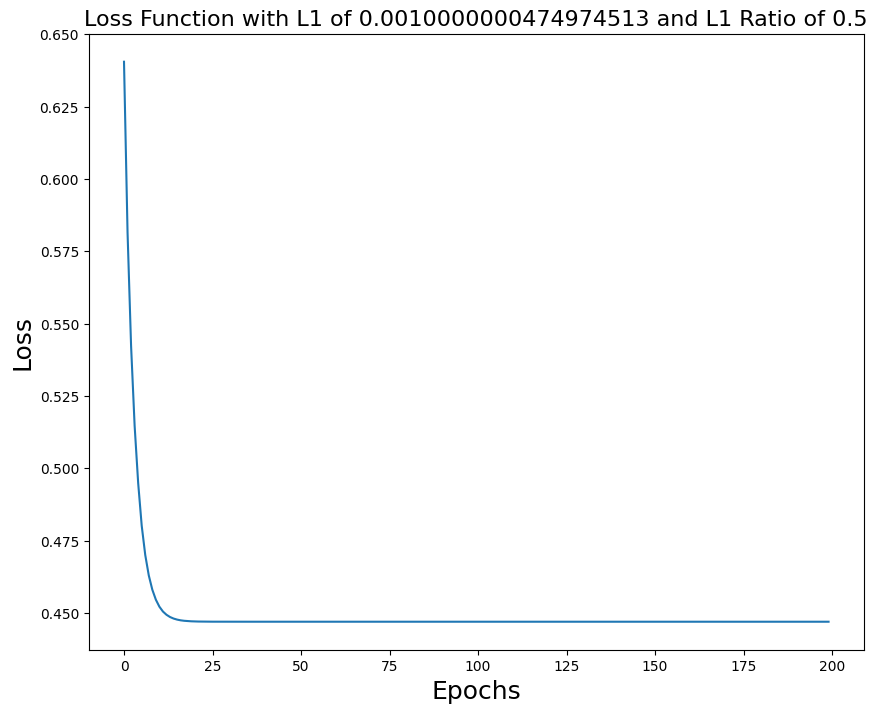

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


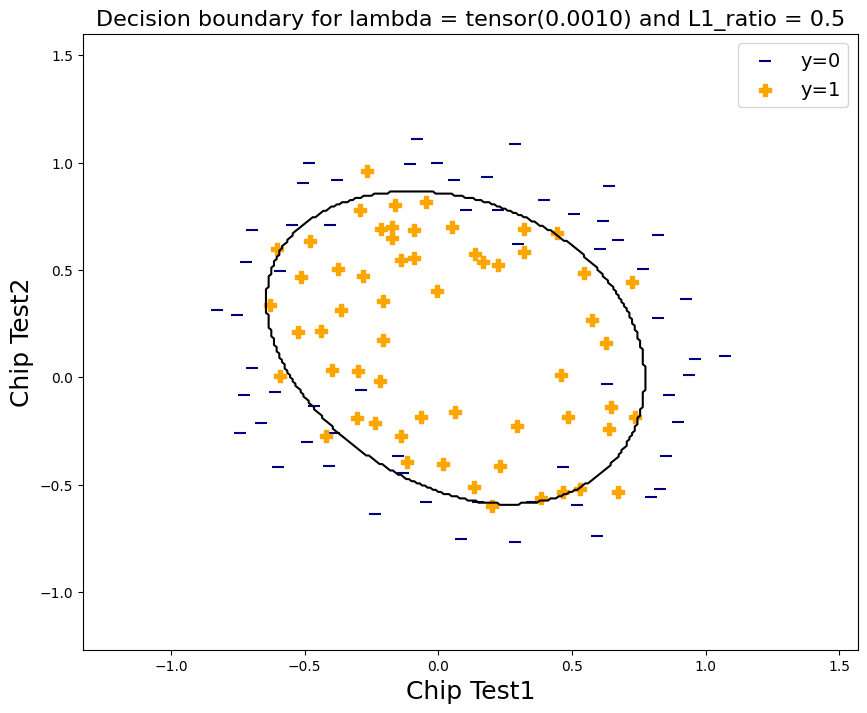

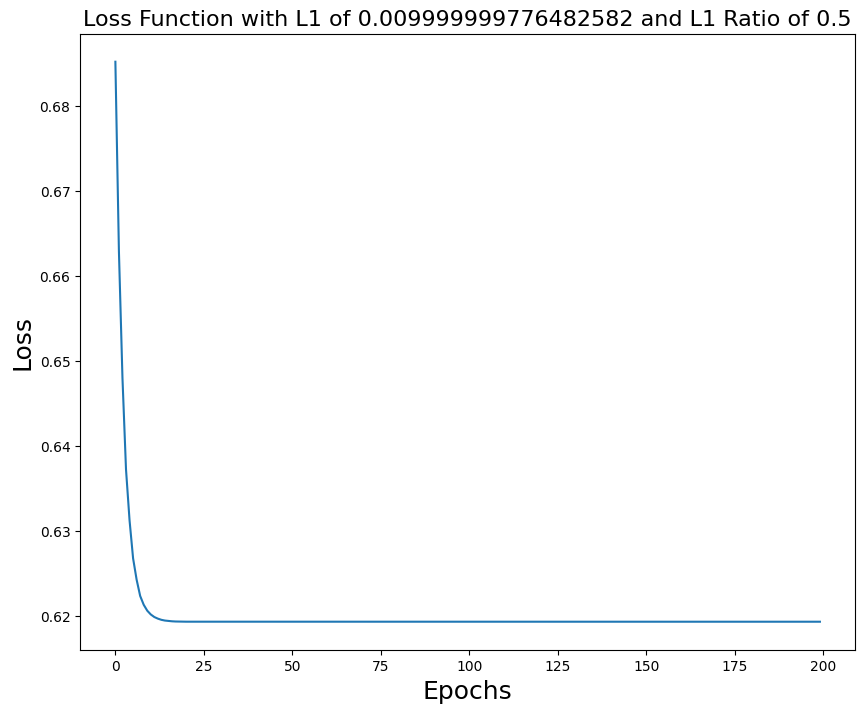

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


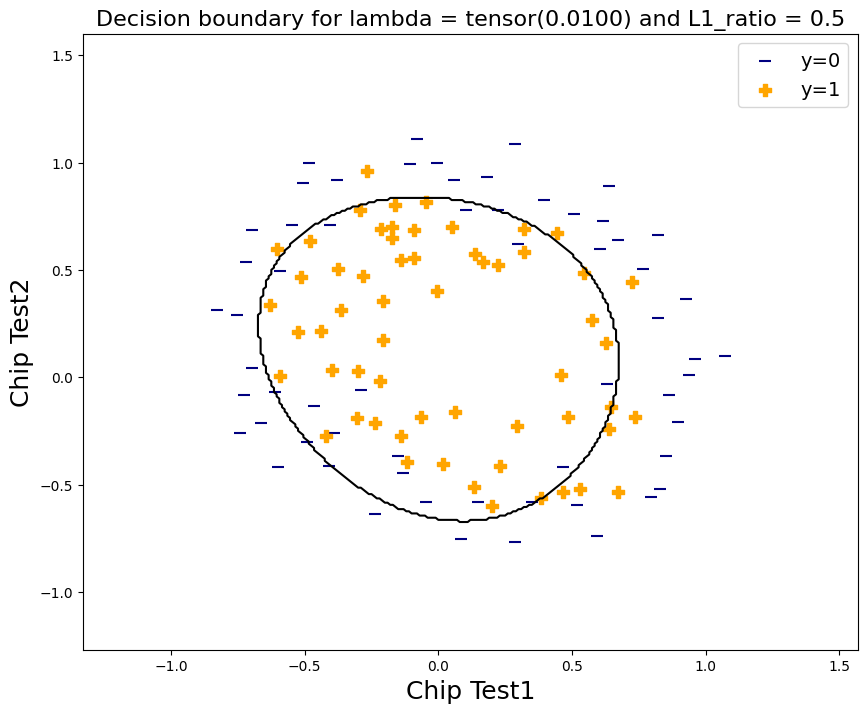

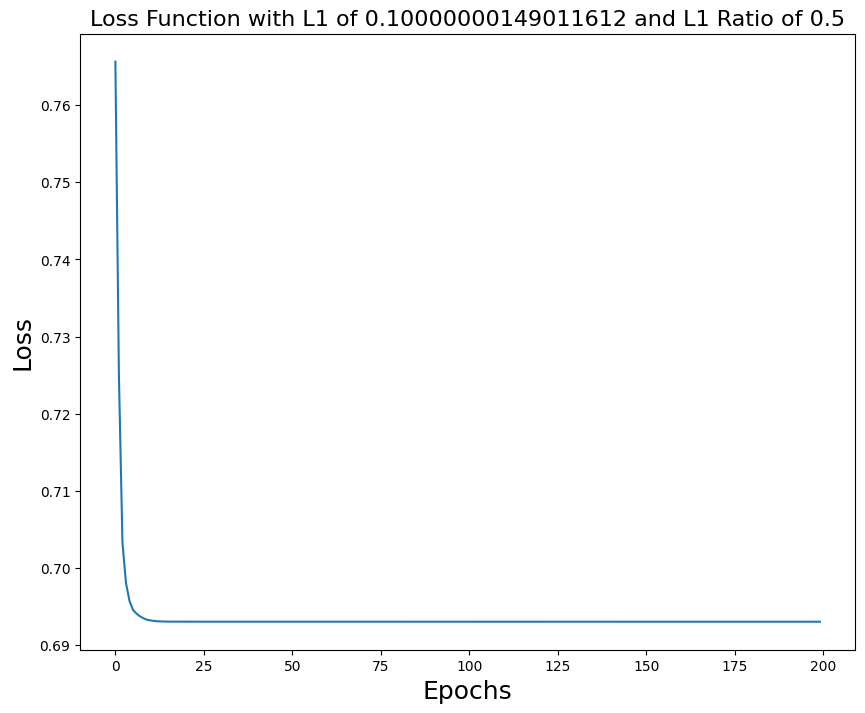

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


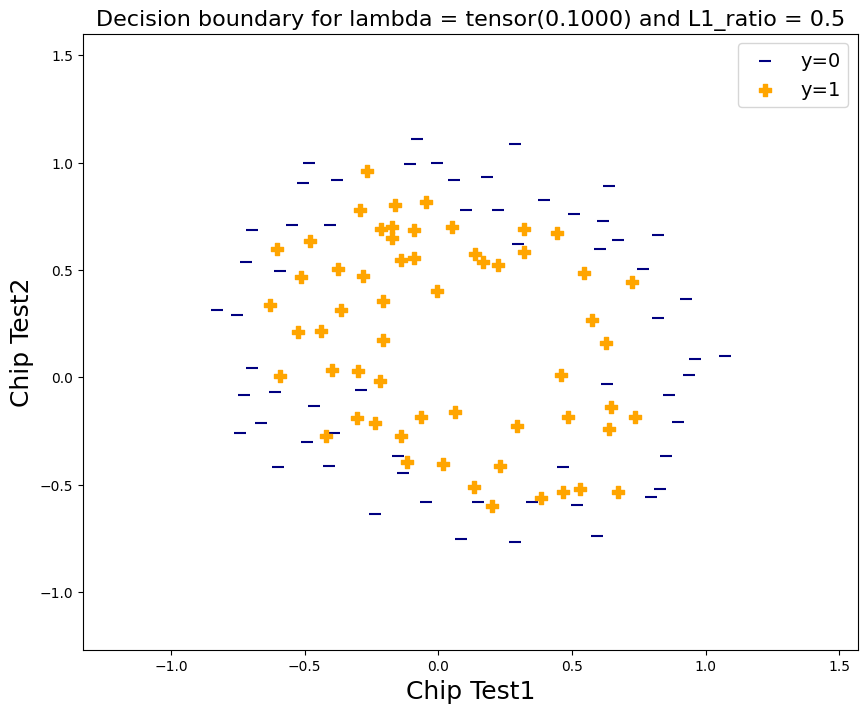

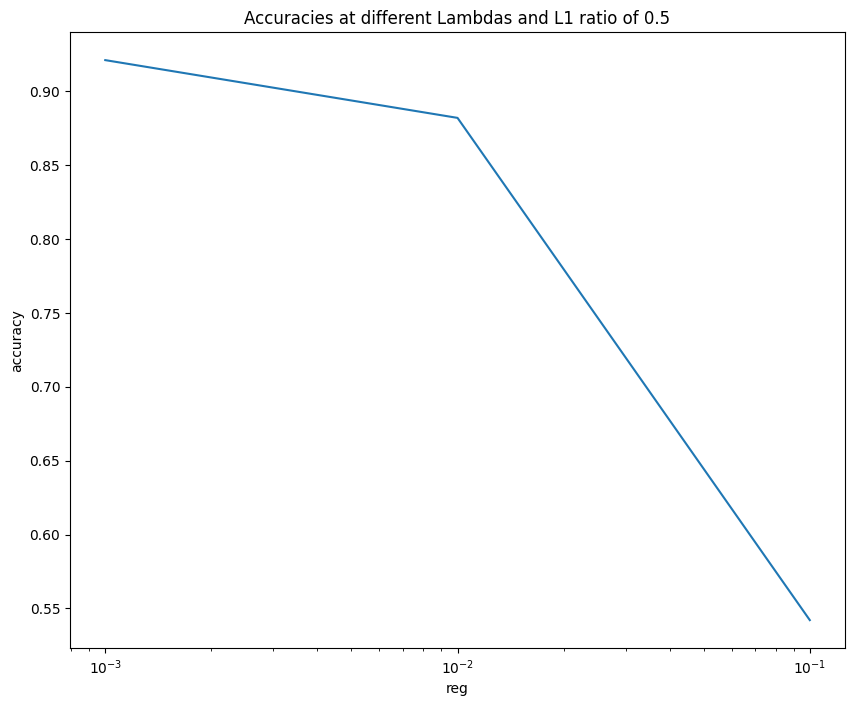

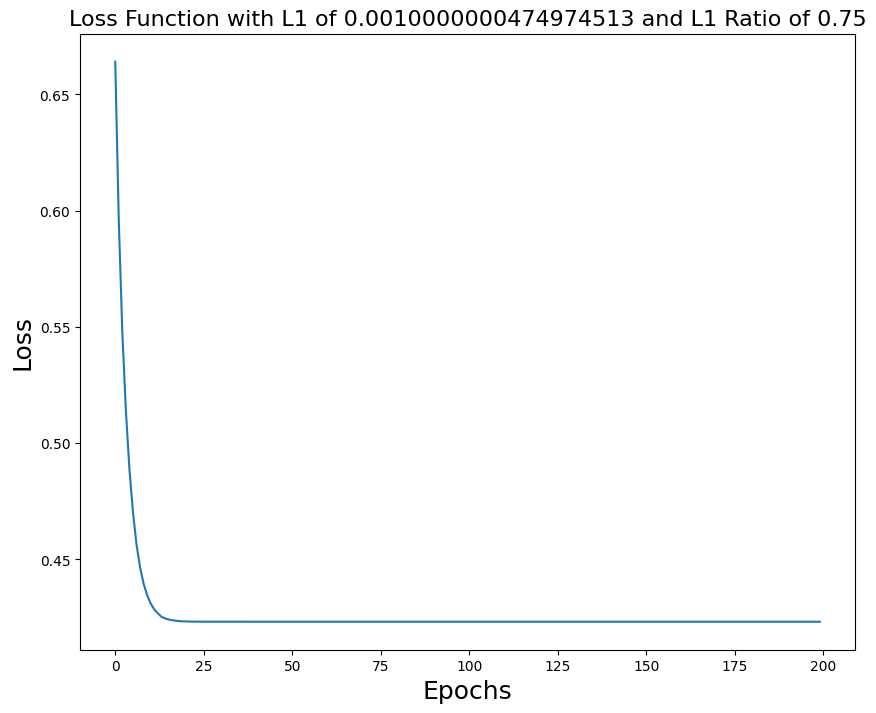

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


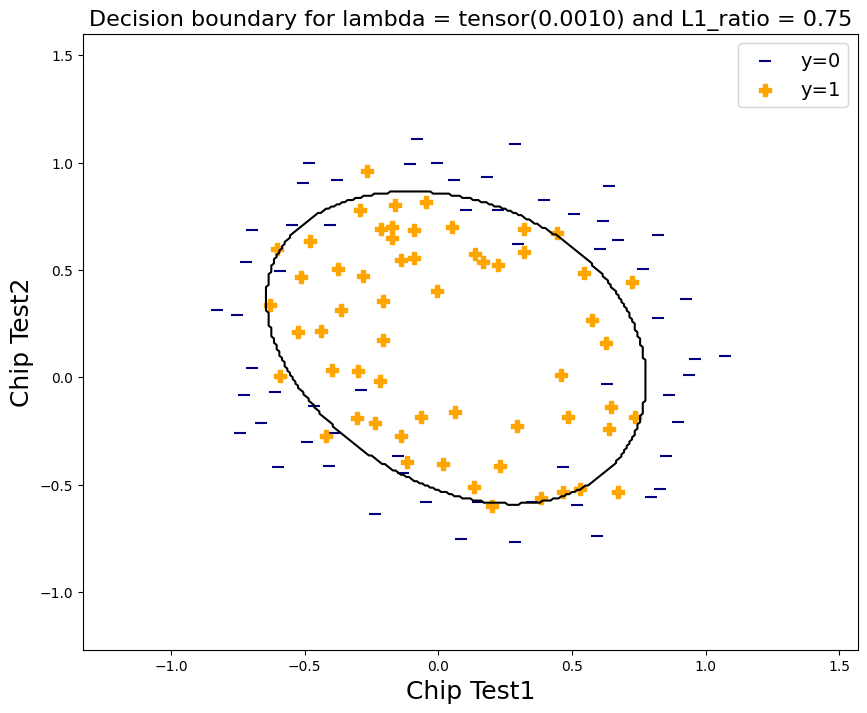

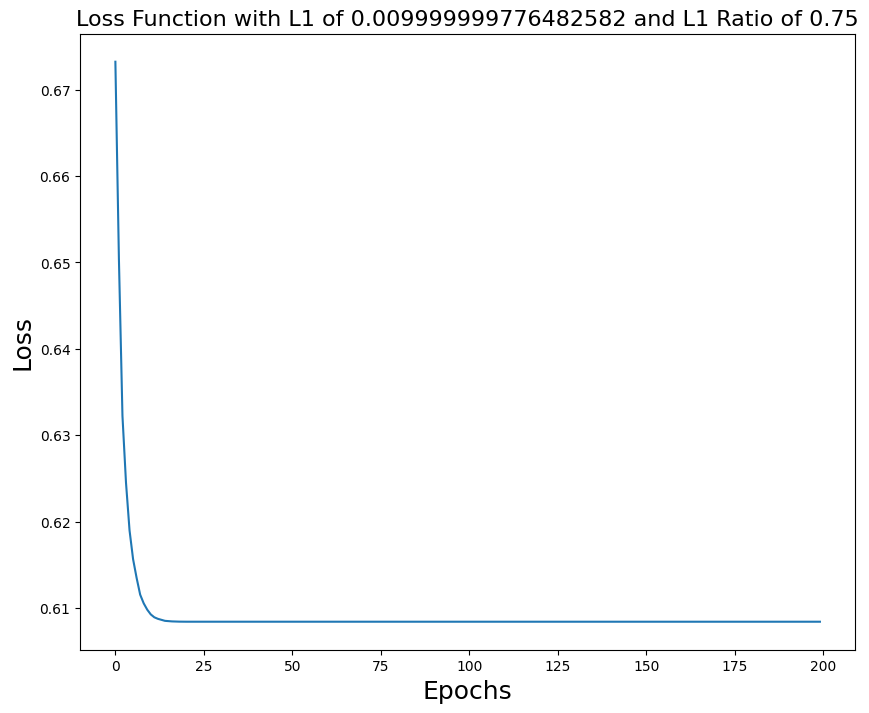

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


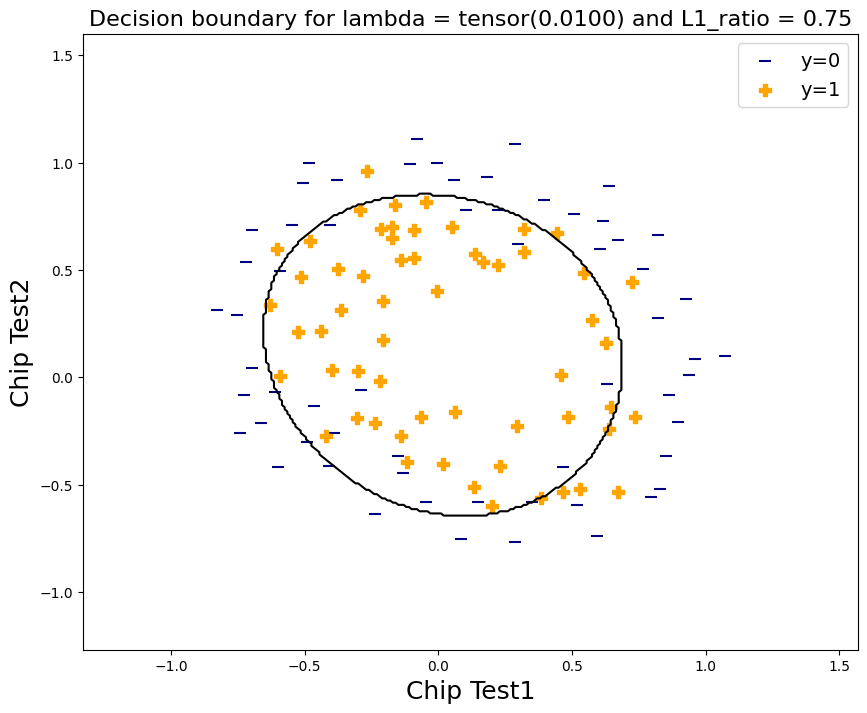

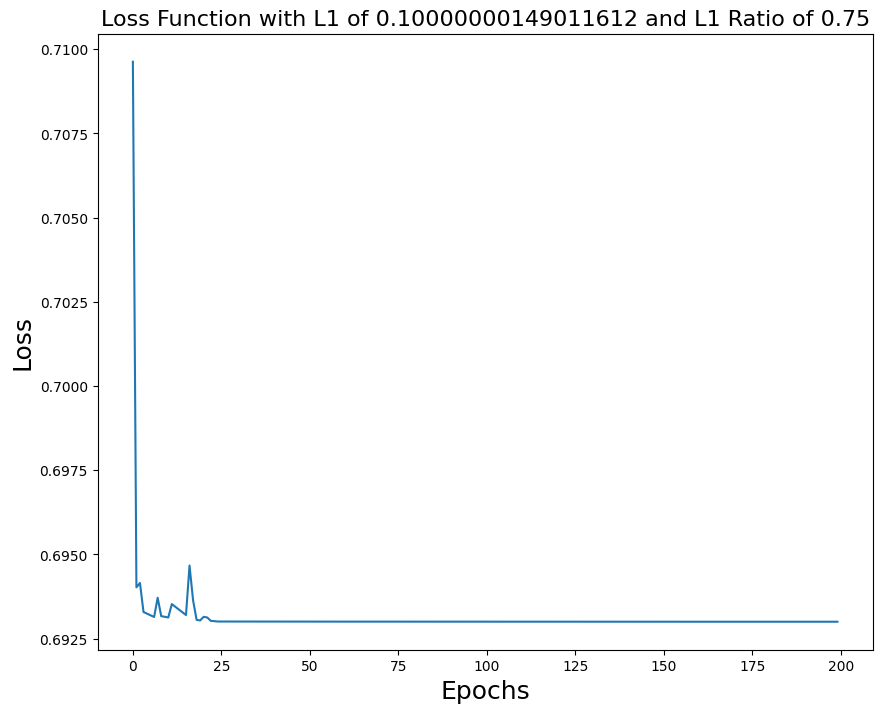

/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


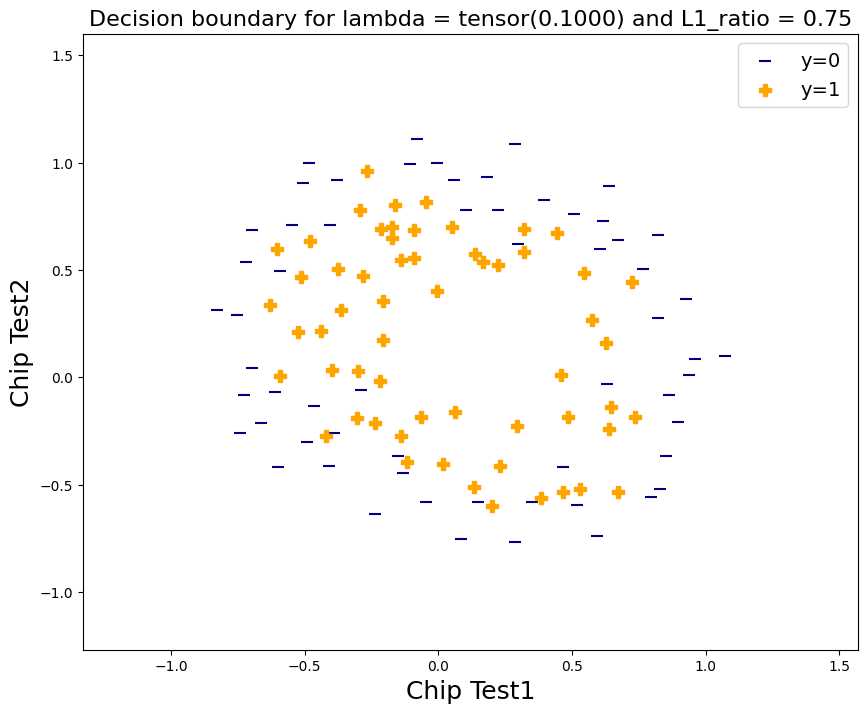

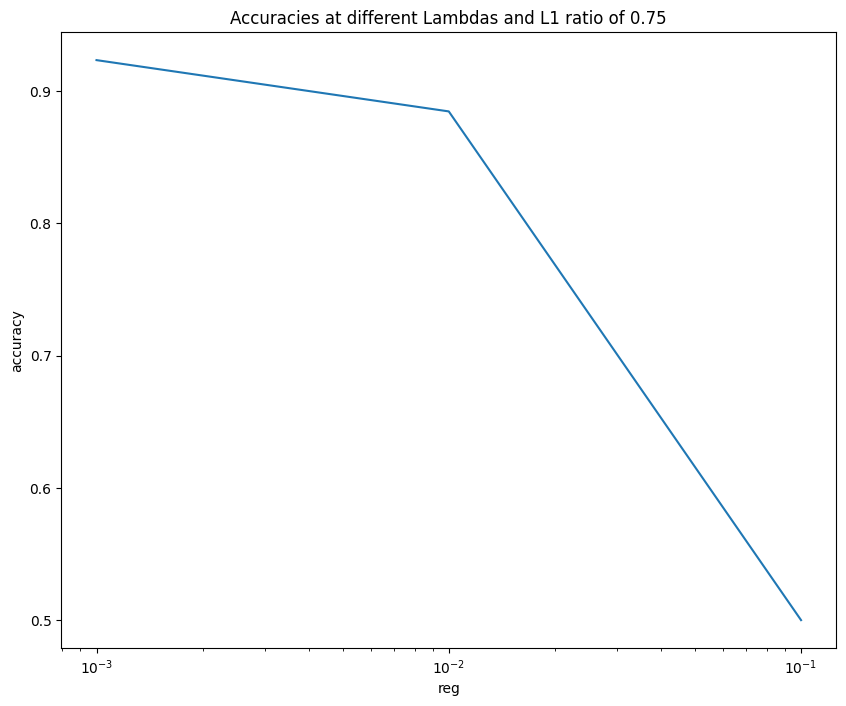

In [43]:
lr = 0.01
num_epochs = 200

best_scores = []
best_scores_lambdas = []

for l1_ratio in l1_ratios:
  scores = []
  for reg in lambdas:
    model = ElasticNetLogisticRegression(Xpoly.shape[1], lr, reg, l1_ratio)
    model,train_loss = train_model(model, Xpoly, y, num_epochs)
    ypred = model.predict_proba(Xpoly).detach().numpy()
    acc = sklearn.metrics.roc_auc_score(y, ypred)
    scores.append(acc)

    plt.plot(torch.arange(num_epochs),train_loss)
    plt.title(f"Loss Function with L1 of {reg} and L1 Ratio of {l1_ratio}" ,fontsize=16)
    plt.xlabel("Epochs",fontsize=18)
    plt.ylabel("Loss",fontsize=18)
    plt.show()
    plot_decision_boundary_model_poly(X, y, model,poly, 'Chip Test1', 'Chip Test2', ['y=0','y=1'], l1_ratio)
    plt.show()

  plt.semilogx(lambdas, scores)
  plt.title('Accuracies at different Lambdas and L1 ratio of ' + str(l1_ratio))
  plt.xlabel('reg')
  plt.ylabel('accuracy')
  plt.show()

  best_scores.append([max(scores)])
  best_scores_lambdas.append(lambdas[scores.index(max(scores))])

#### Best Model

Best L1 ratio:  0.25  Best Lambda:  tensor(0.0010)  With an accuracy of:  [np.float64(0.9186781609195401)]


/tmp/ipython-input-3182596585.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


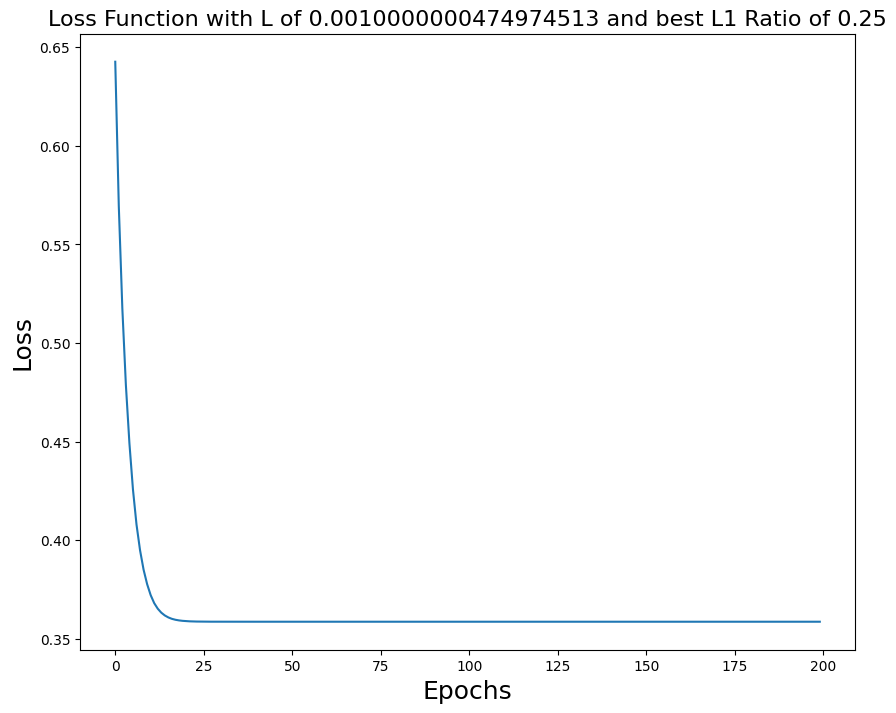

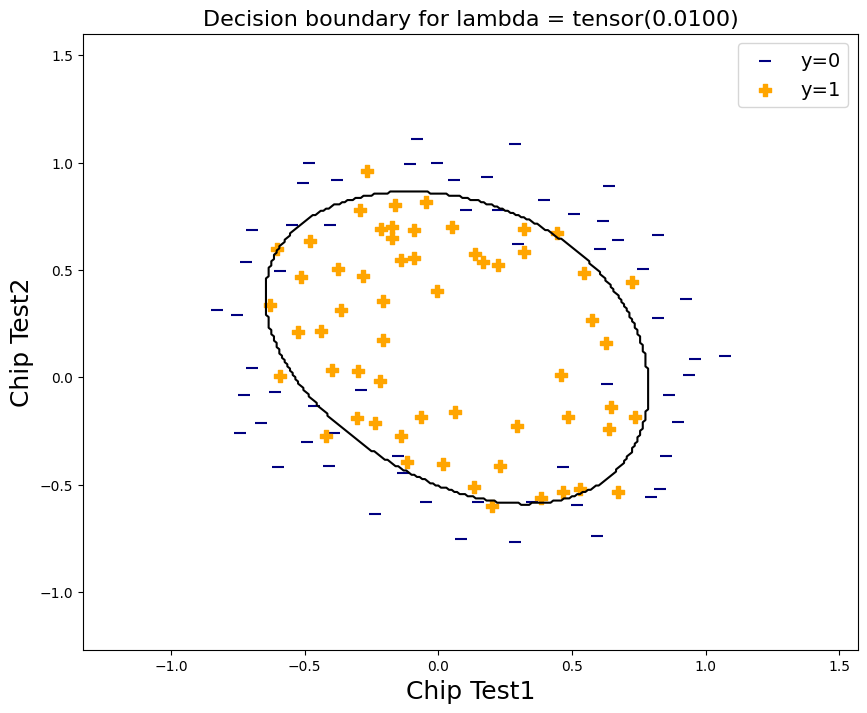

In [44]:
best_idx = scores.index(max(scores))
best_score = best_scores[best_idx]
best_lambda = best_scores_lambdas[best_idx]
best_l1_ratio = l1_ratios[best_idx]

print("Best L1 ratio: ", best_l1_ratio, " Best Lambda: ", best_lambda, " With an accuracy of: ", best_score)
model = L2LogisticRegression(Xpoly.shape[1], lr, best_l2)
model,train_loss = train_model(model, Xpoly, y, num_epochs)
plt.plot(torch.arange(num_epochs), train_loss)
plt.title(f"Loss Function with L of {best_lambda} and best L1 Ratio of {best_l1_ratio}", fontsize=16)
plt.xlabel("Epochs",fontsize=18)
plt.ylabel("Loss",fontsize=18)
plot_decision_boundary_model_poly(X, y, model, poly, 'Chip Test1', 'Chip Test2', ['y=0','y=1'])
